Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=21

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=12 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
242                           NaN                Thailand  15.870032   
243                           NaN             Timor-Leste  -8.874217   
244                           NaN                    Togo   8.619500   
245                           NaN     Trinidad and Tobago  10.691800   
246                           NaN                 Tunisia  33.886917   
247                           NaN                  Turkey  38.963700   
248                           NaN           United States  40.000000   
249                           NaN                  Uganda   1.373333   
250                           NaN                 Ukraine  48.379400   
251                           NaN    United Arab Emirates  23.424076   
252                      Anguilla          United Kingdom  18.220600   
253                       Bermuda          United Kingdom  32.307800   
254        British Virgin Islands          United Kingdom  18.420700   
255                Cayman Islands          United Kingdom  19.313300   
256               Channel Islands          United Kingdom  49.372300   
257   Falkland Islands (Malvinas)          United Kingdom -51.796300   
258                     Gibraltar          United Kingdom  36.140800   
259                   Isle of Man          United Kingdom  54.236100   
260                    Montserrat          United Kingdom  16.742498   
261      Turks and Caicos Islands          United Kingdom  21.694000   
262                           NaN          United Kingdom  55.378100   
263                           NaN                 Uruguay -32.522800   
264                           NaN              Uzbekistan  41.377491   
265                           NaN                 Vanuatu -

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.939110   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -27.469800   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -42.882100   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.025885   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                  Belize  17.189900   
25                            NaN                   Benin   9.307700   
26                            NaN                  Bhutan  27.514200   
27                            NaN                 Bolivia -16.290200   
28                            NaN  Bosnia and Herzegovina  43.915900   
29                            NaN                Botswana -22.328500   
..                            ...                     ...        ...   
248                           NaN                Thailand  15.870032   
249                           NaN             Timor-Leste  -8.874217   
250                           NaN                    Togo   8.619500   
251                           NaN     Trinidad and Tobago  10.691800   
252                           NaN                 Tunisia  33.886917   
253                           NaN                  Turkey  38.963700   
254                           NaN           United States  40.000000   
255                           NaN                  Uganda   1.373333   
256                           NaN                 Ukraine  48.379400   
257                           NaN    United Arab Emirates  23.424076   
258                      Anguilla          United Kingdom  18.220600   
259                       Bermuda          United Kingdom  32.307800   
260        British Virgin Islands          United Kingdom  18.420700   
261                Cayman Islands          United Kingdom  19.313300   
262               Channel Islands          United Kingdom  49.372300   
263   Falkland Islands (Malvinas)          United Kingdom -51.796300   
264                     Gibraltar          United Kingdom  36.140800   
265                   Isle of Man          United Kingdom  54.236100   
266                    Montserrat          United Kingdom  16.742498   
267      Turks and Caicos Islands          United Kingdom  21.694000   
268                           NaN          United Kingdom  55.378100   
269                           NaN                 Uruguay -32.522800   
270                           NaN              Uzbekistan  41.377491   
271                           NaN                 Vanuatu -

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN        Moldova  47.411600   28.369900        0        0   
189            NaN         Monaco  43.733300    7.416700        0        0   
190            NaN       Mongolia  46.862500  103.846700        0        0   
191            NaN     Montenegro  42.708678   19.374390        0        0   
192            NaN        Morocco  31.791700   -7.092600        0        0   
193            NaN     Mozambique -18.665695   35.529562        0        0   
194            NaN        Namibia -22.957600   18.490400        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  1/7/21  1/8/21  1/9/21  1/10/21  \
185        0        0        0        0  ...     378     382     383      384   
186        0        0        0        0  ...      10      10      10       10   
187        0        0        0        0  ...  131031  132069  133204   133706   
188        0        0        0        0  ...    3106    3122    3130     3139   
189        0        0        0        0  ...       3       4       4        4   
190        0        0        0        0  ...       2       2       2        2   
191        0        0        0        0  ...     712     718     721      725   
192        0        0        0        0  ...    7645    7685    7709     7743   
193        0        0        0        0  ...     176     181     187      192   
194        0        0        0        0  ...     240     245     251      254   

     1/11/21  1/12/21  1/13/21  1/14/21   Population           region  
185      387      392      395      396     4,649,658  Mauritania_nan  
186       10       10       10       10           NaN   Mauritius_nan  
187   134368   135682   136917   137916   128,640,794      Mexico_nan  
188     3156     3176     3193     3211     4,035,942     Moldova_nan  
189        4        7        7        7        39,183      Monaco_nan  
190        2        2        2        2           NaN    Mongolia_nan  
191      729      730      737      740       622 500  Montenegro_nan  
192     7767     7784     7810     7854    36,817,128     Morocco_nan  
193      197      201      205      211    31,542,919  Mozambique_nan  
194      261      264      271      275     2,540,905     Namibia_nan  

[10 rows x 365 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region      Lat      Long  \
175                               NaN        Morocco  31.7917   -7.0926   
176                               NaN     Mozambique -18.6657   35.5296   
177                               NaN        Namibia -22.9576   18.4904   
178                               NaN          Nepal  28.1667   84.2500   
179                             Aruba    Netherlands  12.5211  -69.9683   
180  Bonaire, Sint Eustatius and Saba    Netherlands  12.1784  -68.2385   
181                           Curacao    Netherlands  12.1696  -68.9900   
182                      Sint Maarten    Netherlands  18.0425  -63.0548   
183                               NaN    Netherlands  52.1326    5.2913   
184                               NaN    New Zealand -40.9006  174.8860   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  1/7/21  \
175        0        0        0        0        0        0  ...  420569   
176        0        0        0        0        0        0  ...   17455   
177        0        0        0        0        0        0  ...   22666   
178        0        0        0        0        0        0  ...  256644   
179        0        0        0        0        0        0  ...    5323   
180        0        0        0        0        0        0  ...     180   
181        0        0        0        0        0        0  ...    3479   
182        0        0        0        0        0        0  ...    1394   
183        0        0        0        0        0        0  ...       0   
184        0        0        0        0        0        0  ...    2101   

     1/8/21  1/9/21  1/10/21  1/11/21  1/12/21  1/13/21  1/14/21  \
175  422072  423541   424896   426006   427351   429278   431167   
176   17479   17521    17535    17623    18170    18282    18352   
177   23177   23912    24292    24462    24938    25408    25845   
178  257229  257928   258441   258968   259358   259772   260177   
179    5389    5436     5456     5479     5511     5552     5662   
180     180     180      180      180      180      180      180   
181    3520    3668     3882     3985     4023     4096     4208   
182    1425    1432     1434     1445     1460     1469     1478   
183       0       0        0        0        0        0        0   
184    2101    2119     2120     2120     2141     2141     2145   

      Population                                         region  
175    36,817,128                                   Morocco_nan  
176    31,542,919                                Mozambique_nan  
177     2,540,905                                   Namibia_nan  
178    29,300,000                                     Nepal_nan  
179       116,600                             Netherlands_Aruba  
180           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
181       158,665                           Netherlands_Curacao  
182           NaN                      Netherlands_Sint Maarten  
183    17,180,000                               Netherlands_nan  
184     4,813,844                               New Zealand_nan  

[10 rows x 365 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN     Mauritania  21.007900  -10.940800        0        0   
186            NaN      Mauritius -20.348404   57.552152        0        0   
187            NaN         Mexico  23.634500 -102.552800        0        0   
188            NaN        Moldova  47.411600   28.369900        0        0   
189            NaN         Monaco  43.733300    7.416700        0        0   
190            NaN       Mongolia  46.862500  103.846700        0        0   
191            NaN     Montenegro  42.708678   19.374390        0        0   
192            NaN        Morocco  31.791700   -7.092600        0        0   
193            NaN     Mozambique -18.665695   35.529562        0        0   
194            NaN        Namibia -22.957600   18.490400        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   1/7/21   1/8/21   1/9/21  \
185        0        0        0        0  ...    15214    15352    15429   
186        0        0        0        0  ...      539      539      539   
187        0        0        0        0  ...  1493569  1507931  1524036   
188        0        0        0        0  ...   148294   148669   149093   
189        0        0        0        0  ...     1018     1041     1053   
190        0        0        0        0  ...     1395     1408     1429   
191        0        0        0        0  ...    51160    51596    51999   
192        0        0        0        0  ...   448678   450221   451637   
193        0        0        0        0  ...    19961    20482    21361   
194        0        0        0        0  ...    26682    27255    27723   

     1/10/21  1/11/21  1/12/21  1/13/21  1/14/21   Population           region  
185    15512    15611    15707    15794    15893     4,649,658  Mauritania_nan  
186      539      545      546      547      547           NaN   Mauritius_nan  
187  1534039  1541633  1556028  1571901  1588369   128,640,794      Mexico_nan  
188   149391   149662   150138   150946   151687     4,035,942     Moldova_nan  
189     1057     1070     1092     1128     1145        39,183      Monaco_nan  
190     1442     1456     1469     1479     1491           NaN    Mongolia_nan  
191    52431    52819    53338    53840    54316       622 500  Montenegro_nan  
192   452532   452988   453789   455055   456334    36,817,128     Morocco_nan  
193    21939    22334    22996    23726    24269    31,542,919  Mozambique_nan  
194    28259    28602    28871    29183    29570     2,540,905     Namibia_nan  

[10 rows x 365 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
221            NaN                       Saint Lucia  13.909400  -60.978900   
222            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
223            NaN                             Samoa -13.759000 -172.104600   
224            NaN                        San Marino  43.942400   12.457800   
225            NaN             Sao Tome and Principe   0.186400    6.613100   
226            NaN                      Saudi Arabia  23.885942   45.079162   
227            NaN                           Senegal  14.497400  -14.452400   
228            NaN                            Serbia  44.016500   21.005900   
229            NaN                        Seychelles  -4.679600   55.492000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  1/7/21  \
220        0        0        0        0        0        0  ...      33   
221        0        0        0        0        0        0  ...     383   
222        0        0        0        0        0        0  ...     149   
223        0        0        0        0        0        0  ...       2   
224        0        0        0        0        0        0  ...    2583   
225        0        0        0        0        0        0  ...    1035   
226        0        0        0        0        0        0  ...  363485   
227        0        0        0        0        0        0  ...   20376   
228        0        0        0        0        0        0  ...  353907   
229        0        0        0        0        0        0  ...     373   

     1/8/21  1/9/21  1/10/21  1/11/21  1/12/21  1/13/21  1/14/21  \
220      34      34       34       34       34       34       34   
221     395     438      438      462      490      502      543   
222     149     225      249      249      284      284      340   
223       2       2        2        2        2        2        2   
224    2628    2628     2628     2667     2706     2723     2737   
225    1054    1066     1066     1066     1090     1105     1119   
226  363582  363692   363809   363949   364096   364271   364440   
227   20672   21000    21245    21533    21685    21883    22178   
228  356125  356125   359689   361782   363924   366191   368072   
229     451     508      531      583      601      612      627   

      Population                                 region  
220           NaN             Saint Kitts and Nevis_nan  
221           NaN                       Saint Lucia_nan  
222           NaN  Saint Vincent and the Grenadines_nan  
223           NaN                             Samoa_nan  
224        33,916                        San Marino_nan  
225           NaN             Sao Tome and Principe_nan  
226    34,695,447                      Saudi Arabia_nan  
227    16,743,927                           Senegal_nan  
228     8,744,671                            Serbia_nan  
229           NaN                        Seychelles_nan  

[10 rows x 365 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

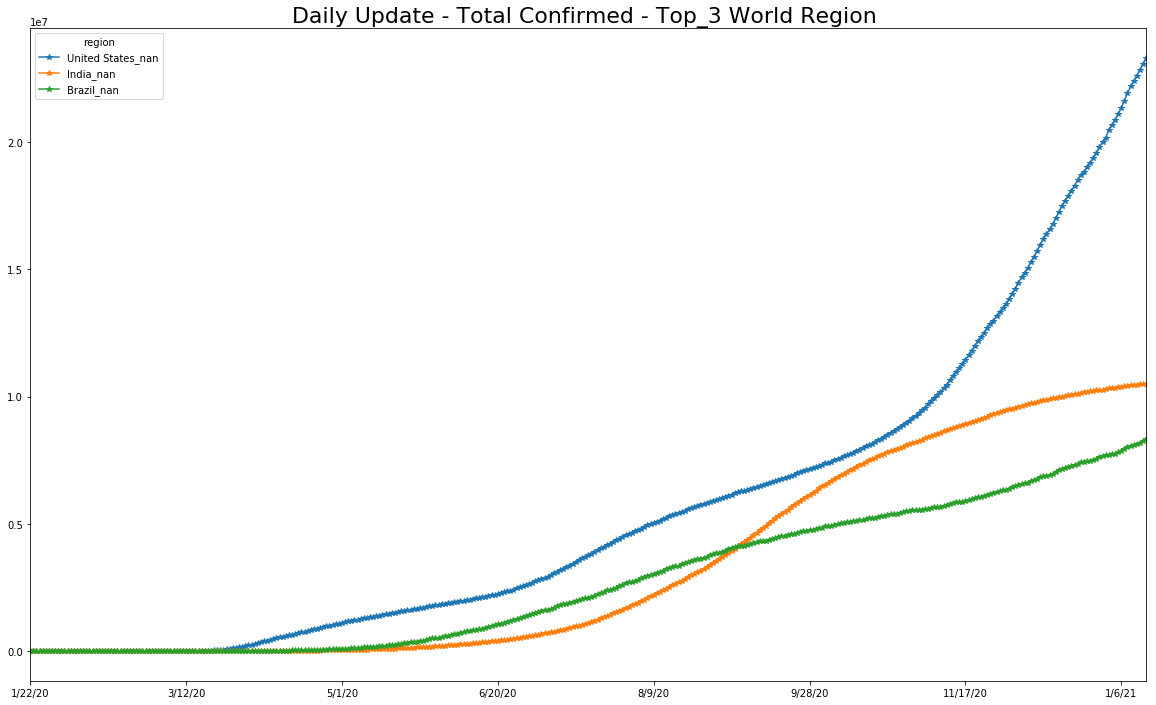

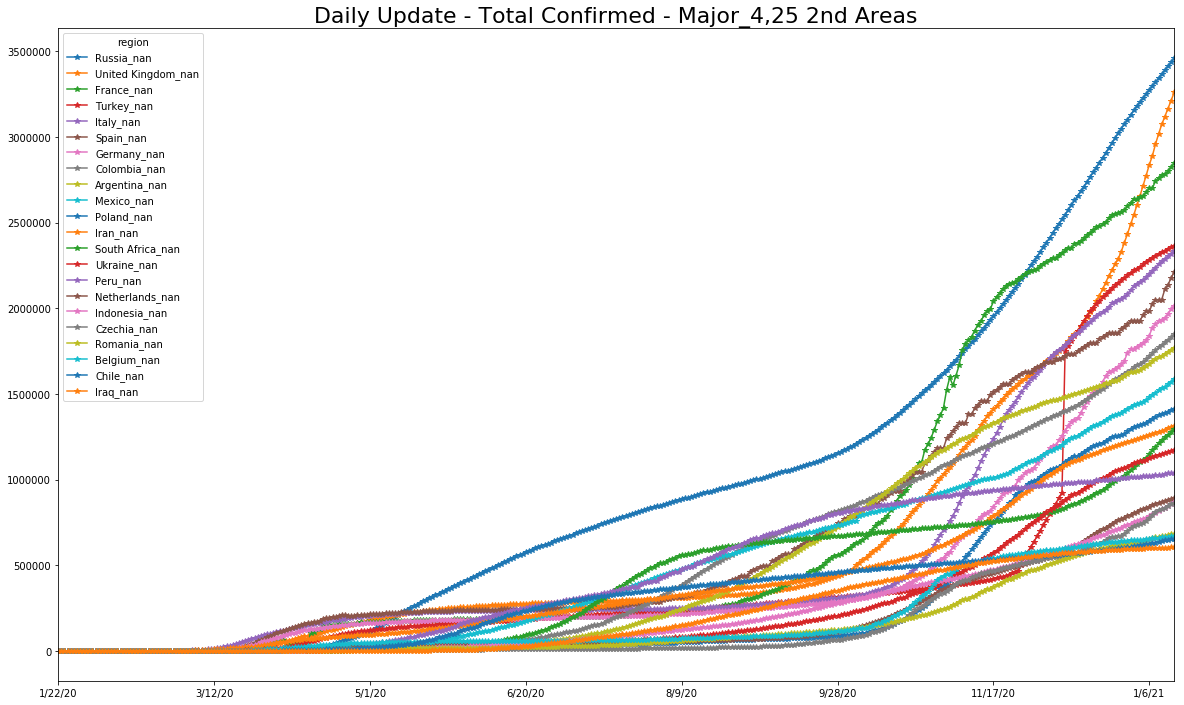

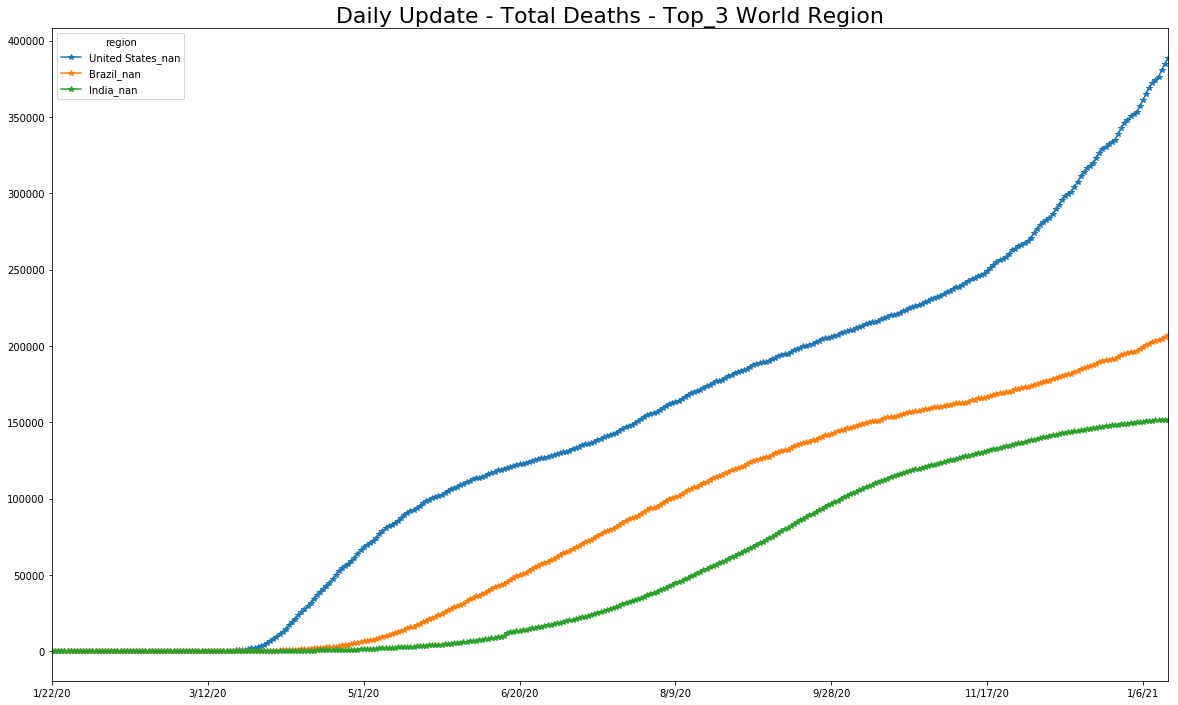

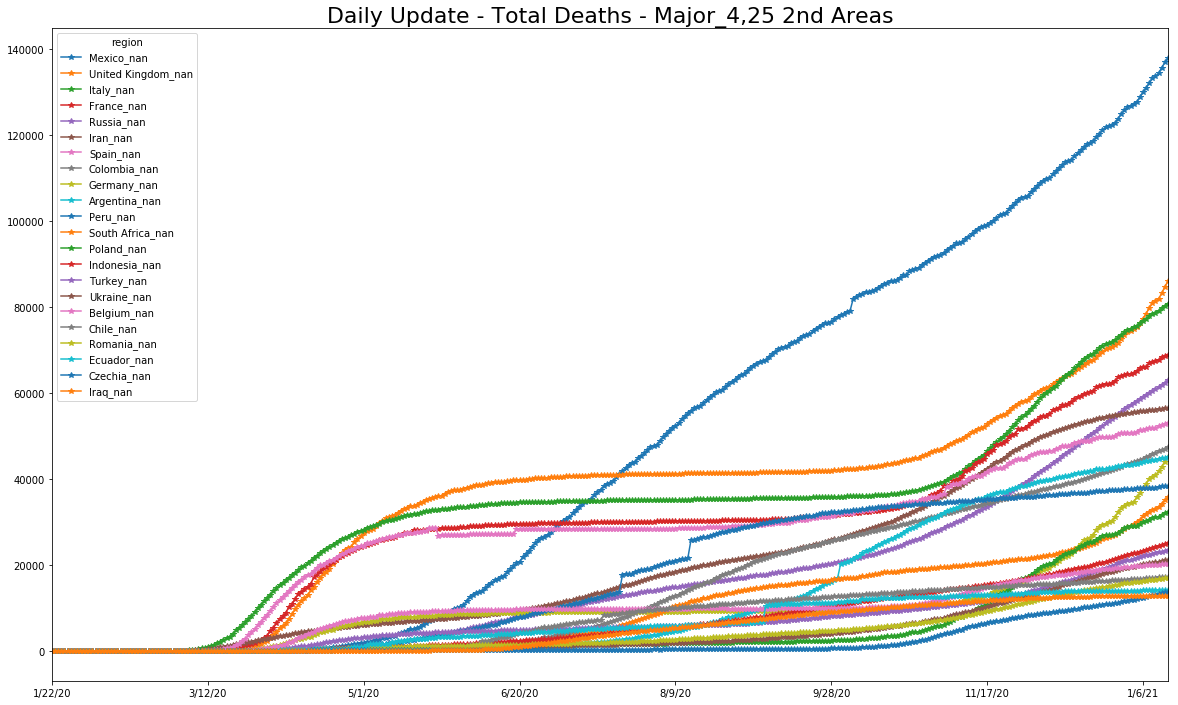

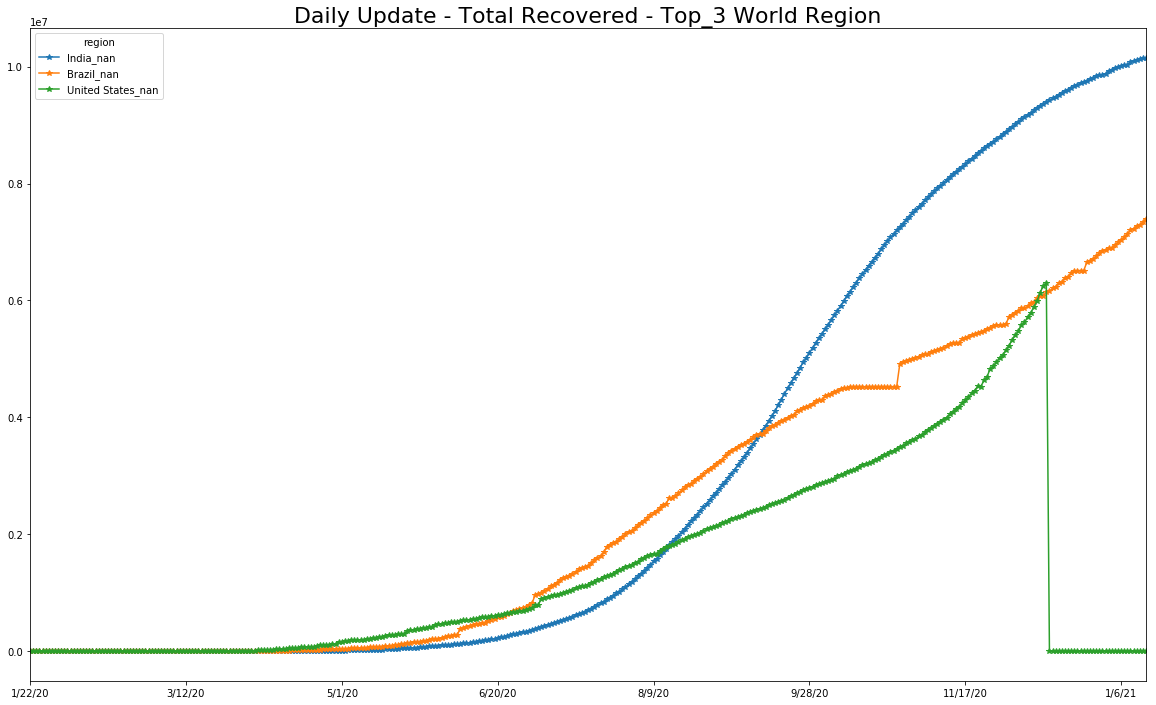

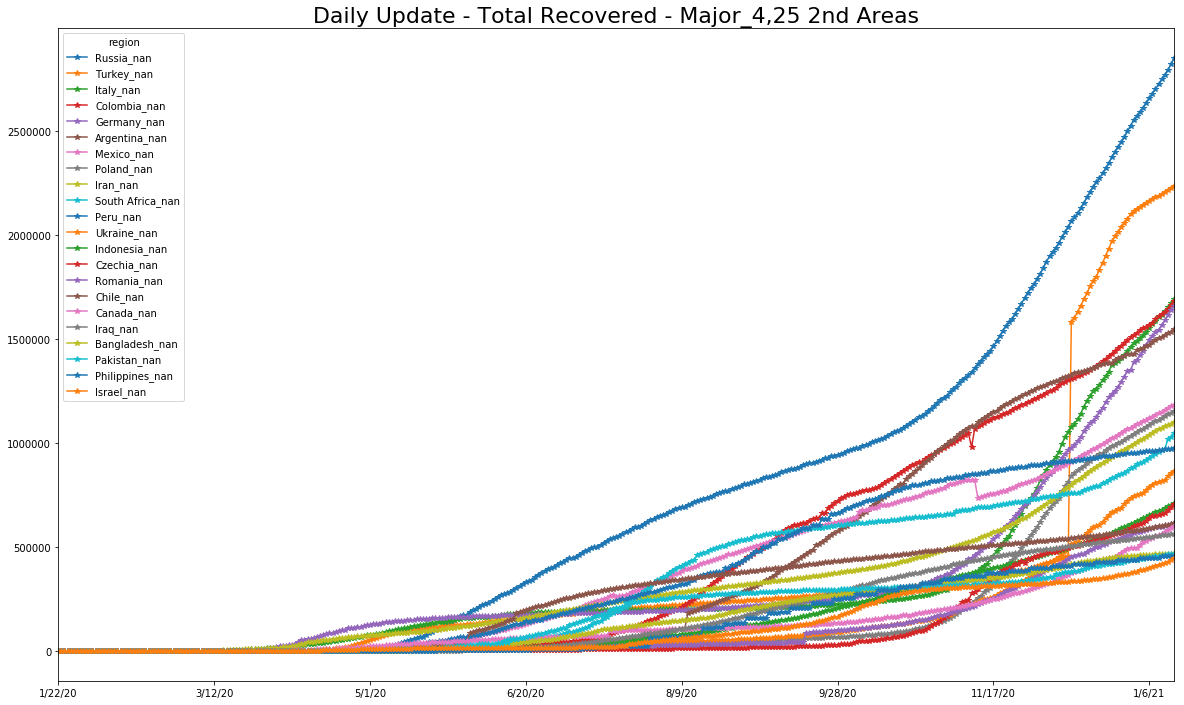

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/01/15


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6518730         1808           47287            0   
9/14/20  ...            6552892         1812           47836            0   
9/15/20  ...            6592297         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 272 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
1/11/21            53538        63971       102369         8586       18254   
1/12/21            53584        64627       102641         8682       18343   
1/13/21            53584        65334       102860         8818       18425   
1/14/21            53775        65994       103127         8868       18613   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
1/11/21                      176        1730921       162288   
1/12/21                      176        1744704       162643   
1/13/21                      176        1757429       163128   
1/14/21                      184        1770715       163576   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
1/11/21                                     118                       5034   
1/12/21                                     118                       5041   
1/13/21                                     118                       5043   
1/14/21                                     118                       5045   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
1/11/21  ...           22622305        26901           77611            1   
1/12/21  ...           22847637        27846           77663            1   
1/13/21  ...           23077846        28475           77716            1   
1/14/21  ...           23307232        29989           77777            1   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
1/11/21         116983         1515                  148171       2105   
1/12/21         117299         1520                  148968       2107   
1/13/21         117811         1521                  149769       2109   
1/14/21         118415         1531                  150505       2110   

region   Zambia_nan  Zimbabwe_nan  
1/11/21       28596         22297  
1/12/21       29757         23239  
1/13/21       31100         24256  
1/14/21       32800         25368  

[4 rows x 272 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
34720 2020-12-17     Zimbabwe_nan      11866           227           503   
34721 2020-12-18     Zimbabwe_nan      12047           117           508   
34722 2020-12-19     Zimbabwe_nan      12151           181           525   
34723 2020-12-20     Zimbabwe_nan      12325           104           402   
34724 2020-12-21     Zimbabwe_nan      12422           174           459   
34725 2020-12-22     Zimbabwe_nan      12544            97           375   
34726 2020-12-23     Zimbabwe_nan      12656           122           393   
34727 2020-12-24     Zimbabwe_nan      12786           112           331   
34728 2020-12-25     Zimbabwe_nan      12880           130           364   
34729 2020-12-26     Zimbabwe_nan      12963            94           336   
34730 2020-12-27     Zimbabwe_nan      13077            83           307   
34731 2020-12-28     Zimbabwe_nan      13148           114           291   
34732 2020-12-29     Zimbabwe_nan      13325            71           268   
34733 2020-12-30     Zimbabwe_nan      13625           177           362   
34734 2020-12-31     Zimbabwe_nan      13867           300           548   
34735 2021-01-01     Zimbabwe_nan      14084           242           719   
34736 2021-01-02     Zimbabwe_nan      14491           217           759   
34737 2021-01-03     Zimbabwe_nan      15265           407           866   
34738 2021-01-04     Zimbabwe_nan      15829           774          1398   
34739 2021-01-05     Zimbabwe_nan      17194           564          1745   
34740 2021-01-06     Zimbabwe_nan      17804          1365  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
34749 2021-01-15  Zimbabwe_nan          0          1112          3071   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
34749          6693         104.584474         113.773198         135.839411   

       last_day  kalman_prediction  population  infected_rate  min  max  
34749     25368            26223.0    14862924       0.000017  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
34749 2021-01-15  Zimbabwe_nan          0          1112          3071   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
34749          6693         104.584474         113.773198         135.839411   

       last_day  kalman_prediction  population  infected_rate  min  max  
34749     25368            26223.0    14862924       0.000017  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=ratiod['infected_rate']*1000
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
33997  2021-01-13  Zimbabwe_nan      24256           942          2740   
33998  2021-01-14  Zimbabwe_nan      25368          1017          2779   
33999  2021-01-15  Zimbabwe_nan          0          1112          3071   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
33997          6045         104.224828         113.366554         135.157671   
33998          6452         104.376307         112.939470         136.239104   
33999          6693         104.584474         113.773198         135.839411   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
33997                23239  ...    14862924       0.000016  NaN  NaN   
33998                24256  ...    14862924       0.000016  NaN  NaN   
33999                25368  ...    14862924       0.000017  NaN  NaN   

       population_percentage : infected_rate confirmed  \
33997                                         0.001564   
33998                                         0.001632   
33999                                         0.001707   

       population_percentage : factor 9/10 infected_rate confirmed  \
33997                                           0.015636             
33998                                           0.016320             
33999                                           0.017069             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
33997                   913.0                          61.428020   
33998                   886.0                          59.611420   
33999                   855.0                          57.525693   

       delta : roling 7day AVG  \
33997               863.571429   
33998               921.714286   
33999               956.142857   

       delta : aprox 14-day case notification rate per 100k hab  
33997                                          81.343348         
33998                                          86.820063         
33999                                          90.063032         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
262  United States_nan  4.484572e+12  2.117681e+06  225588.064516


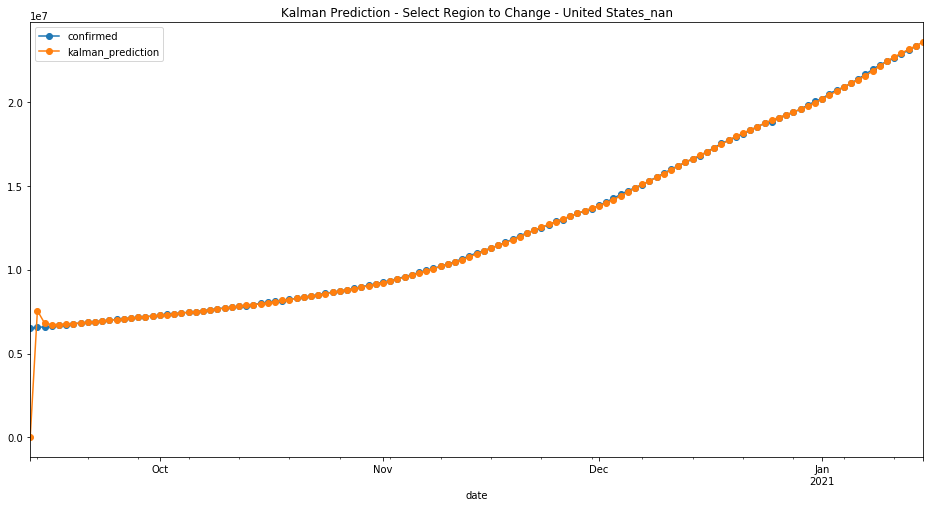

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse          mae
212  Russia_nan  9.798099e+10  313019.152093  31713.91129


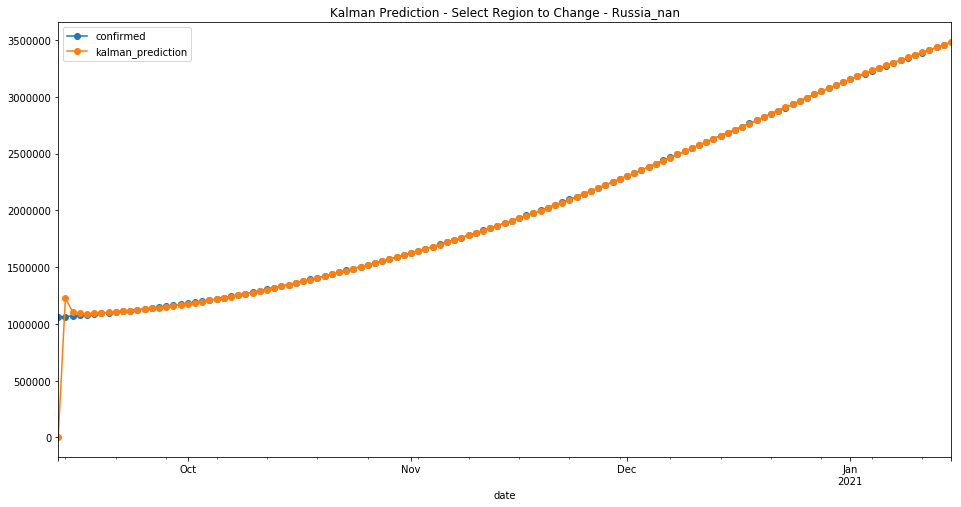

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  5.688554e+11  754225.000513  90533.403226


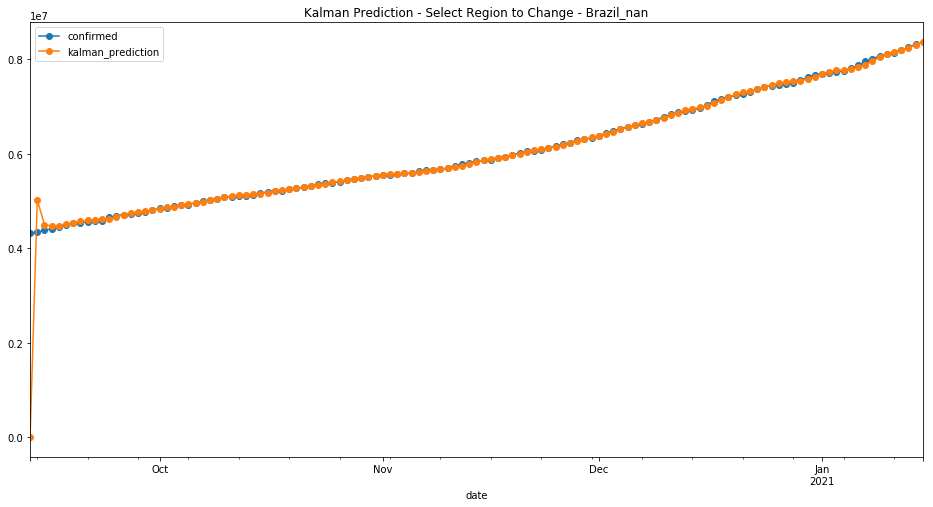

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
261  United Kingdom_nan  8.884753e+10  298073.024385  32963.604839


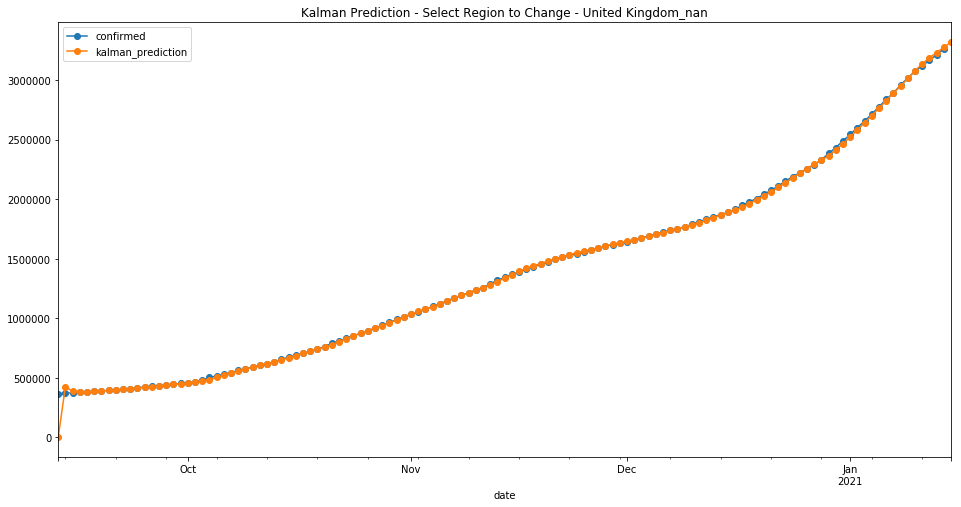

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsk0gyb01
  JVM stdout: /tmp/tmpsk0gyb01/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsk0gyb01/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.30.1.3
H2O_cluster_version_age:    3 months and 17 days !!!
H2O_cluster_name:           H2O_from_python_unknownUser_emyjxc
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.541 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.7 final
--------------------------  ------------------------------------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-01-03
last_train_date= 2021-01-14
first_bootstrap_date= 2021-01-06
boost_bootstrap_date= 2021-01-11
first_test_date= 2021-01-05
last_test_date= 2021-01-15
first_valid_date= 2021-01-13


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    53389.0      53105 2021-01-06  Afghanistan_nan
1    53666.0      53207 2021-01-07  Afghanistan_nan
2    53720.0      53332 2021-01-08  Afghanistan_nan
3    53826.0      53400 2021-01-09  Afghanistan_nan
4    53877.0      53489 2021-01-10  Afghanistan_nan
5    53902.0      53538 2021-01-11  Afghanistan_nan
6    53978.0      53584 2021-01-12  Afghanistan_nan
7    53976.0      53584 2021-01-13  Afghanistan_nan
8    53941.0      53775 2021-01-14  Afghanistan_nan
9    54028.0          0 2021-01-15  Afghanistan_nan
10   60738.0      61008 2021-01-06      Albania_nan
11   61411.0      61705 2021-01-07      Albania_nan
12   62172.0      62378 2021-01-08      Albania_nan
13   62883.0      63033 2021-01-09      Albania_nan
14   63612.0      63595 2021-01-10      Albania_nan
15   64250.0      63971 2021-01-11      Albania_nan
16   64697.0      64627 2021-01-12      Albania_nan
17   65279.0      65334 2021-01-13      Albania_nan
18   65943.0      65994 2021-01-14      Albania_nan
19   66630.0          0 2021-01-15      Albania_nan
20  101346.0     101120 2021-01-06      Algeria_nan
21  101571.0     101382 2021-01-07      Algeria_nan
22  101813.0     101657 2021-01-08      Algeria_nan
23  102078.0     101913 2021-01-09      Algeria_nan
24  102335.0     102144 2021-01-10      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  225395.0     224827 2021-01-11  Azerbaijan_nan
176  225560.0     225346 2021-01-12  Azerbaijan_nan
177  226089.0     225820 2021-01-13  Azerbaijan_nan
178  226496.0     226200 2021-01-14  Azerbaijan_nan
179  226856.0          0 2021-01-15  Azerbaijan_nan
180    8171.0       7945 2021-01-06     Bahamas_nan
181    8141.0       7959 2021-01-07     Bahamas_nan
182    8165.0       7969 2021-01-08     Bahamas_nan
183    8190.0       7969 2021-01-09     Bahamas_nan
184    8219.0       7969 2021-01-10     Bahamas_nan
185    8215.0       8004 2021-01-11     Bahamas_nan
186    8137.0       8004 2021-01-12     Bahamas_nan
187    8252.0       8011 2021-01-13     Bahamas_nan
188    8240.0       8011 2021-01-14     Bahamas_nan
189    8254.0          0 2021-01-15     Bahamas_nan
190   94375.0      94284 2021-01-06     Bahrain_nan
191   94663.0      94633 2021-01-07     Bahrain_nan
192   95000.0      95030 2021-01-08     Bahrain_nan
193   95395.0      95317 2021-01-09     Bahrain_nan
194   95715.0      95558 2021-01-10     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  205023.0     204958 2021-01-06  Belarus_nan
221  206870.0     206796 2021-01-07  Belarus_nan
222  208601.0     208601 2021-01-08  Belarus_nan
223  210394.0     210368 2021-01-09  Belarus_nan
224  212154.0     212201 2021-01-10  Belarus_nan
225  213992.0     213993 2021-01-11  Belarus_nan
226  215794.0     215724 2021-01-12  Belarus_nan
227  217513.0     217696 2021-01-13  Belarus_nan
228  219498.0     219663 2021-01-14  Belarus_nan
229  221467.0          0 2021-01-15  Belarus_nan
230  654332.0     655732 2021-01-06  Belgium_nan
231  657290.0     658655 2021-01-07  Belgium_nan
232  660225.0     660703 2021-01-08  Belgium_nan
233  662462.0     662694 2021-01-09  Belgium_nan
234  664711.0     664263 2021-01-10  Belgium_nan
235  666364.0     665223 2021-01-11  Belgium_nan
236  667320.0     667322 2021-01-12  Belgium_nan
237  669459.0     670249 2021-01-13  Belgium_nan
238  672296.0     672886 2021-01-14  Belgium_nan
239  674912.0          0 2021-01-15  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  9607891516.278214
# MSE on the validation data =  6805911203607.635
# R^2 on the training data =  0.9988265572997788
# R^2 on the validation data =  0.4488673750508102


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1610691866752_1


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0              500.0                     500.0           16286212.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0       21.0       23.0       22.87      2335.0      2644.0     2547.186



ModelMetricsRegression: drf
** Reported on train data. **

MSE: 9607891516.278214
RMSE: 98019.85266403033
MAE: 8776.480139964633
RMSLE: 0.26004523962110704
Mean Residual Deviance: 9607891516.278214

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 6805911203607.635
RMSE: 2608814.137420992
MAE: 655267.8173899637
RMSLE: 7.4081802532346925
Mean Residual Deviance: 6805911203607.635

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2021-01-15 06:24:35   0.131 sec              0.0            NaN   
1     2021-01-15 06:24:36   0.578 sec              1.0   70093.411778   
2     2021-01-15 06:24:36   0.791 sec              2.0   94015.448532   
3     2021-01-15 06:24:36   0.915 sec              3.0   69458.994803   
4     2021-01-15 06:24:36   1.126 sec              4.0   83994.132899   
5     2021-01-15 06:24:37   1.479 sec              5.0  137332.734023   
6     2021-01-15 06:24:37   1.662 sec              6.0  136234.801593   
7     2021-01-15 06:24:37   1.748 sec              7.0  114539.561989   
8     2021-01-15 06:24:37   1.831 sec              8.0  118378.141567   
9     2021-01-15 06:24:37   1.900 sec              9.0  120386.819776   
10    2021-01-15 06:24:37   1.996 sec             10.0  124604.185326   
11    2021-01-15 06:24:37   2.100 sec             11.0  123223.520977   
12    2021-01-15 06:24:37   2.181 sec             12.0  124048.661648   
13    2021-01-15 06:24:37   2.264 sec             13.0  126243.791807   
14    2021-01-15 06:24:37   2.354 sec             14.0  124754.080447   
15    2021-01-15 06:24:38   2.446 sec             15.0  121867.611259   
16    2021-01-15 06:24:38   2.530 sec             16.0  113048.232693   
17    2021-01-15 06:24:38   2.612 sec             17.0  108975.892181   
18    2021-01-15 06:24:38   2.699 sec             18.0  109487.164629   
19    2021-01-15 06:24:38   2.783 sec             19.0  108784.775980   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0            NaN                NaN              NaN             NaN   
1   17466.081320       4.913086e+09     2.607242e+06   643405.933603   
2   19141.658014       8.838905e+09     2.550868e+06   637942.583690   
3   16528.242798       4.824552e+09     2.573781e+06   640664.798652   
4   17741.259801       7.055014e+09     2.589045e+06   643036.697553   
5   20790.892960       1.886028e+10     2.593195e+06   644235.605340   
6   20723.100612       1.855992e+10     2.578770e+06   644898.596381   
7   19174.006747       1.311931e+10     2.584247e+06   645191.563018   
8   18812.653696       1.401338e+10     2.569052e+06   642812.342481   
9   19317.482466       1.449299e+10     2.575746e+06   643163.147529   
10  18640.660485       1.552620e+10     2.581228e+06   643665.984942   
11  18444.868752       1.518404e+10     2.602465e+06   662900.675897   
12  17922.099945       1.538807e+10     2.604858e+06   661772.840948   
13  17532.066270       1.593749e+10     2.594856e+06   659089.715986   
14  16858.434584       1.556358e+10     2.597473e+06   658169.723398   
15  16247.369483       1.485171e+10     2.600249e+06   657432.673426   
16  15617.030117       1.277990e+10     2.602009e+06   656669.197561   
17  15030.531658       1.187575e+10     2.603940e+06   655981.354604   
18  14854.198695       1.198744e+10     2.605630e+06   655352.217100   
19  14972.362508       1.183413e+10     2.606683e+06   654809.388031   

    validation_deviance  
0                   NaN  
1          6.797713e+12  
2          6.506927e+12  
3          6.624351e+12  
4          6.703154e+12  
5          6.724659e+12  
6          6.650056e+12  
7          6.678334e+12  
8          6.600028e+12  
9          6.634467e+12  
10         6.662740e+12  
11         6.772822e+12  
12         6.785287e+12  
13         6.733277e+12  
14         6.746868e+12  
15         6.761293e+12  
16         6.770451e+12  
17         6.780504e+12  
18         6.789308e+12  
19         6.794797e+12


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         6.111871e+18           1.000000    0.333133
1            last_day         5.410648e+18           0.885269    0.294912
2              region         2.644023e+18           0.432604    0.144115
3        7_day_change         1.881926e+18           0.307913    0.102576
4        3_day_change         7.956964e+17           0.130189    0.043370
5        1_day_change         6.459393e+17           0.105686    0.035208
6       infected_rate         5.684266e+17           0.093004    0.030983
7                 max         1.101966e+17           0.018030    0.006006
8                 min         1.030586e+17           0.016862    0.005617
9   7_day_change_rate         4.777239e+16           0.007816    0.002604
10  3_day_change_rate         1.779659e+16           0.002912    0.000970
11  1_day_change_rate         9.268876e+15           0.001517    0.000505

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         6.111871e+18           1.000000    0.333133
1            last_day         5.410648e+18           0.885269    0.294912
2              region         2.644023e+18           0.432604    0.144115
3        7_day_change         1.881926e+18           0.307913    0.102576
4        3_day_change         7.956964e+17           0.130189    0.043370
5        1_day_change         6.459393e+17           0.105686    0.035208
6       infected_rate         5.684266e+17           0.093004    0.030983
7                 max         1.101966e+17           0.018030    0.006006
8                 min         1.030586e+17           0.016862    0.005617
9   7_day_change_rate         4.777239e+16           0.007816    0.002604
10  3_day_change_rate         1.779659e+16           0.002912    0.000970
11  1_day_change_rate         9.268876e+15           0.001517    0.000505

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


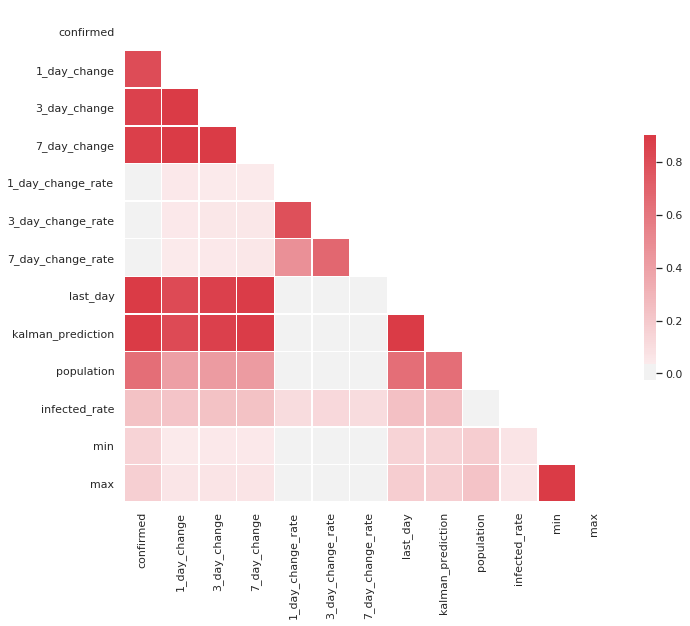

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.811642
3_day_change         0.861173
7_day_change         0.876556
1_day_change_rate    0.025827
3_day_change_rate    0.026674
7_day_change_rate    0.021725
last_day             0.987186
kalman_prediction    0.988372
population           0.644490
infected_rate        0.236503
min                  0.153860
max                  0.176275
Name: confirmed, dtype: float64


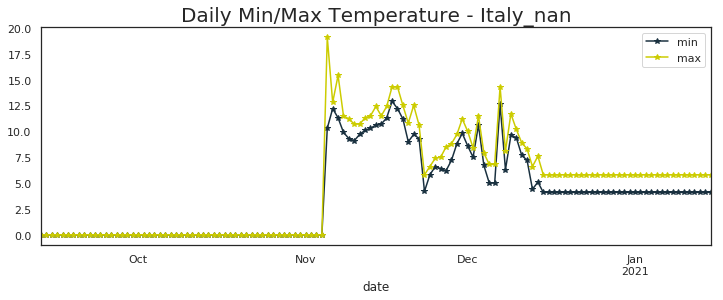

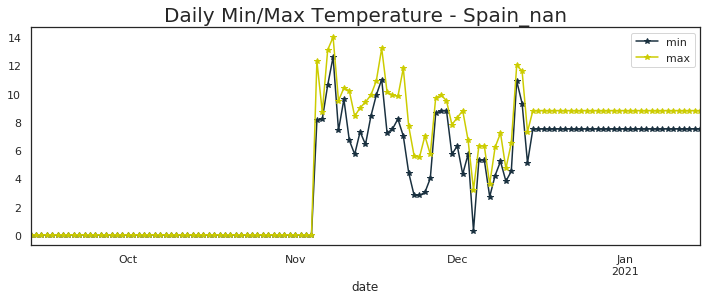

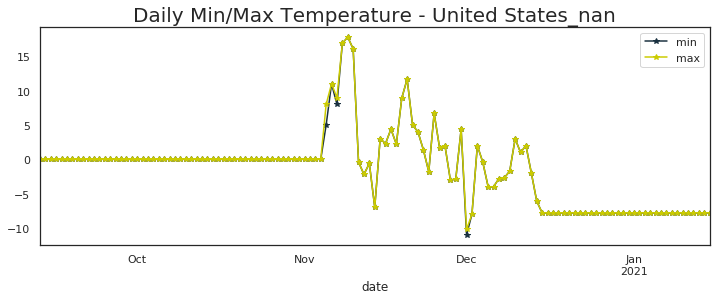

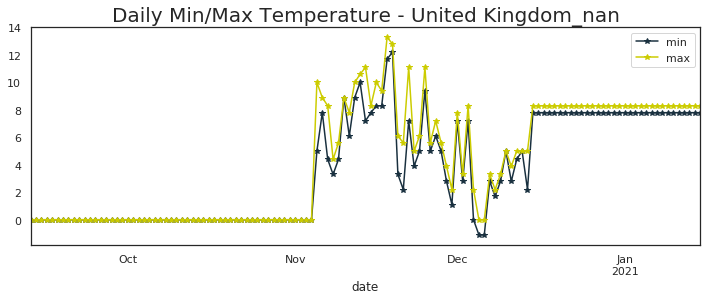

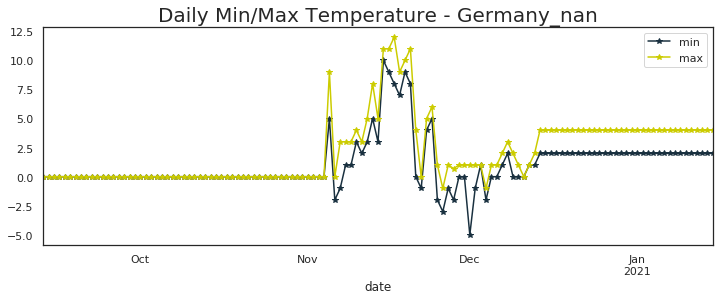

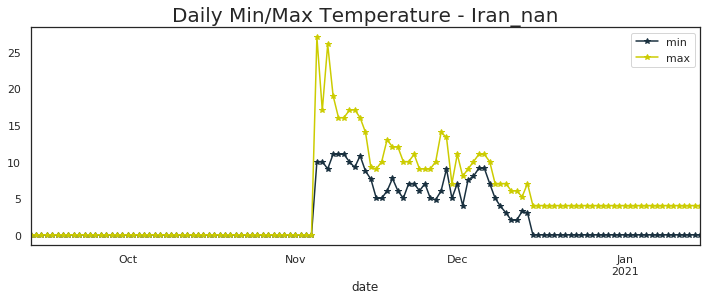

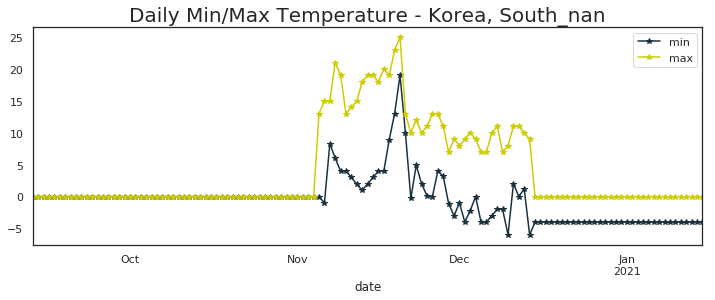

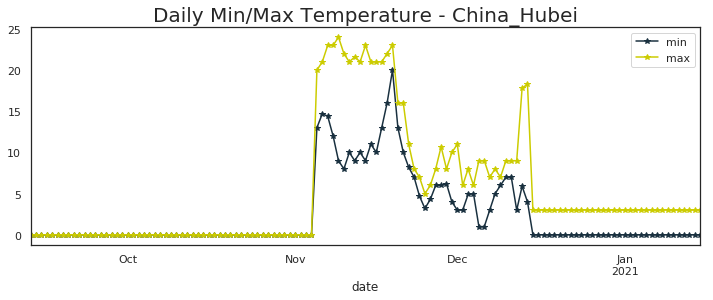

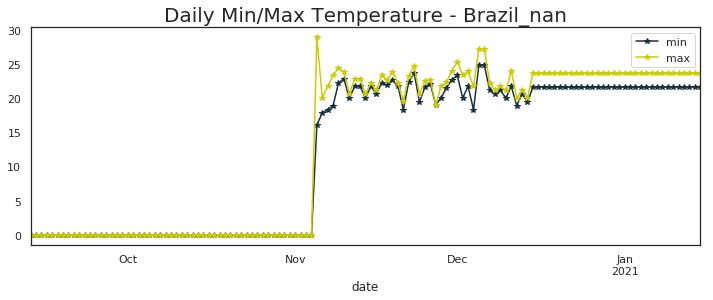

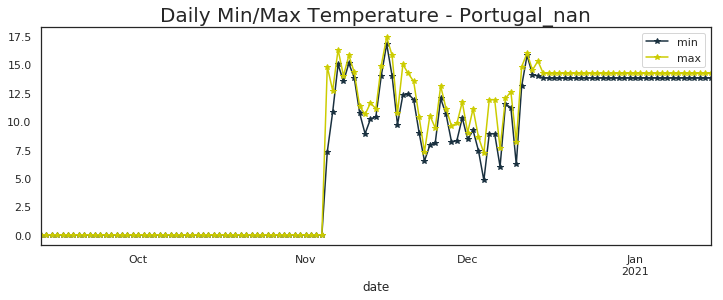

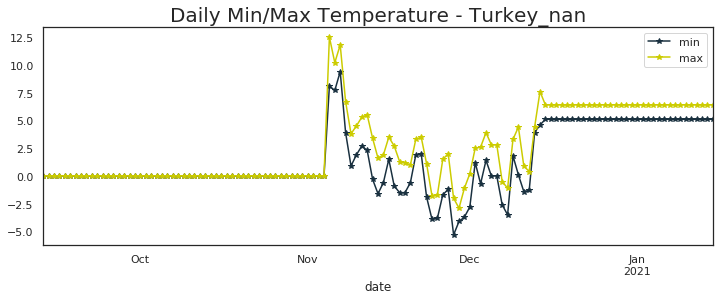

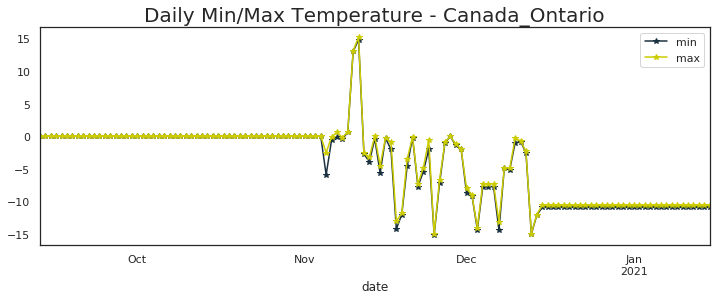

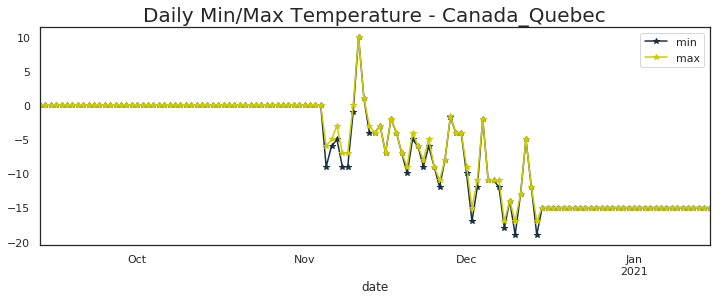

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
France_nan                  12.1  13.3
Turkey_nan                   9.4  12.5
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Colombia_nan                 0.0   0.0
Argentina_nan                0.0   0.0
Mexico_nan                  15.1  15.1
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
South Africa_nan             0.0   0.0
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Netherlands_nan             14.4  16.1
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
Romania_nan                  0.0   0.0
Belgium_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

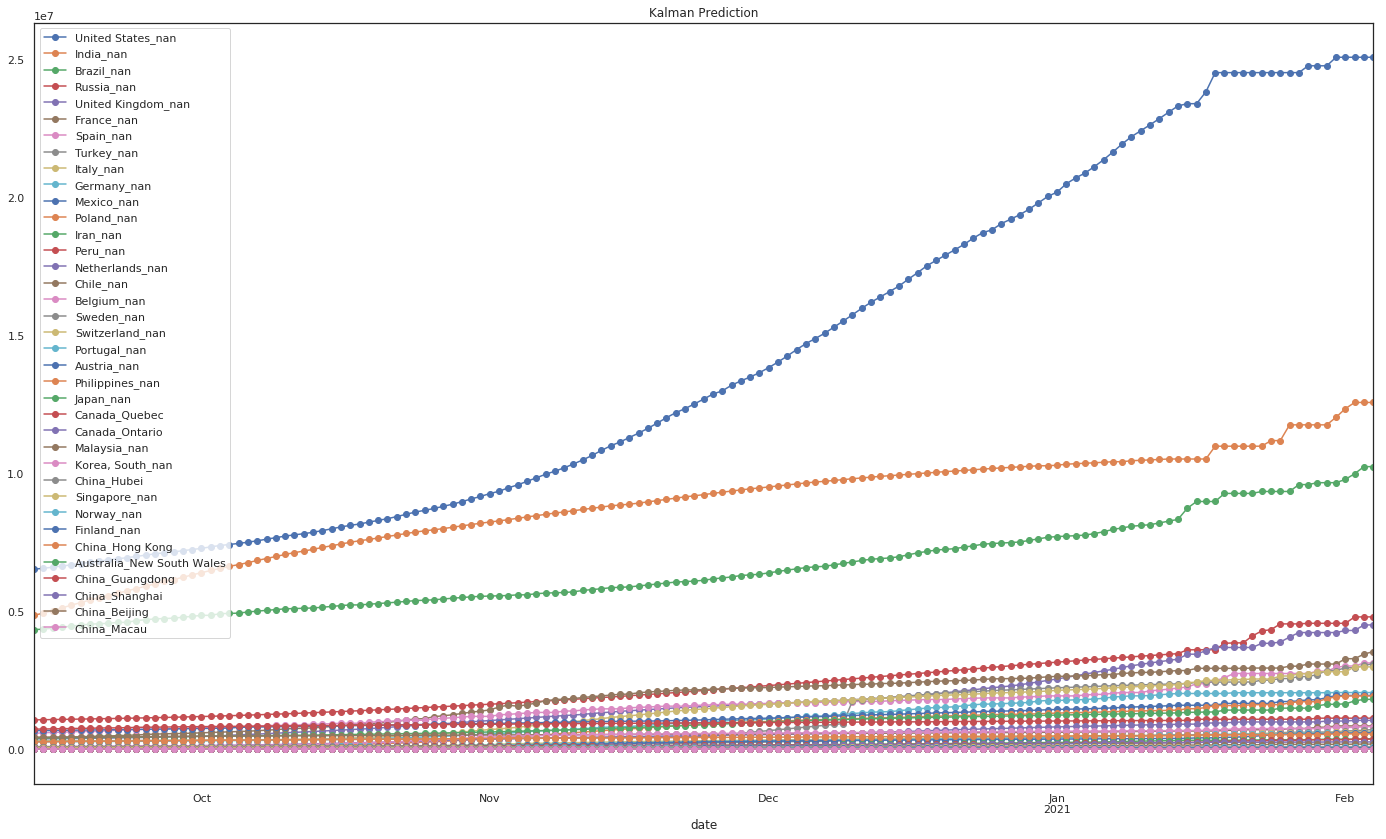

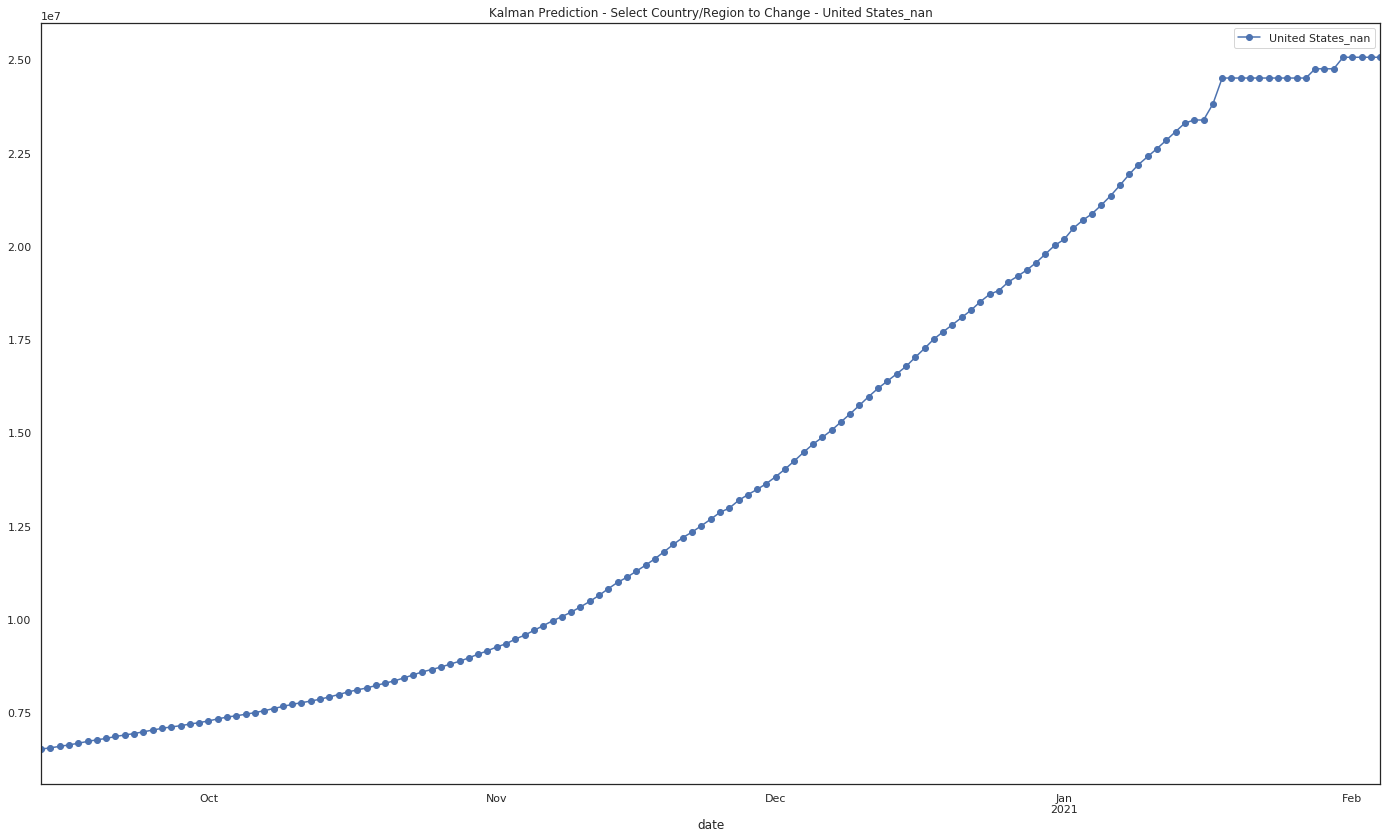

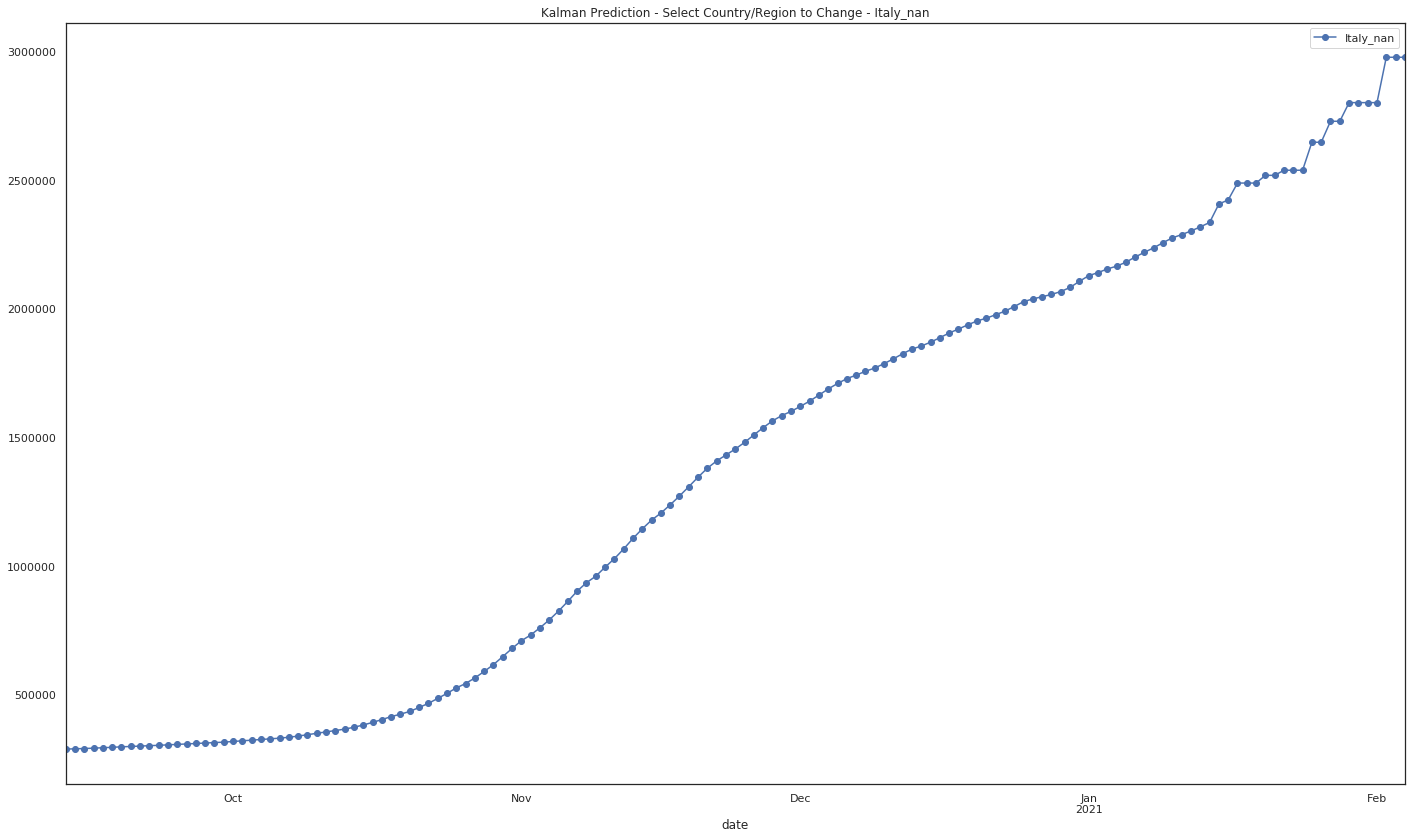

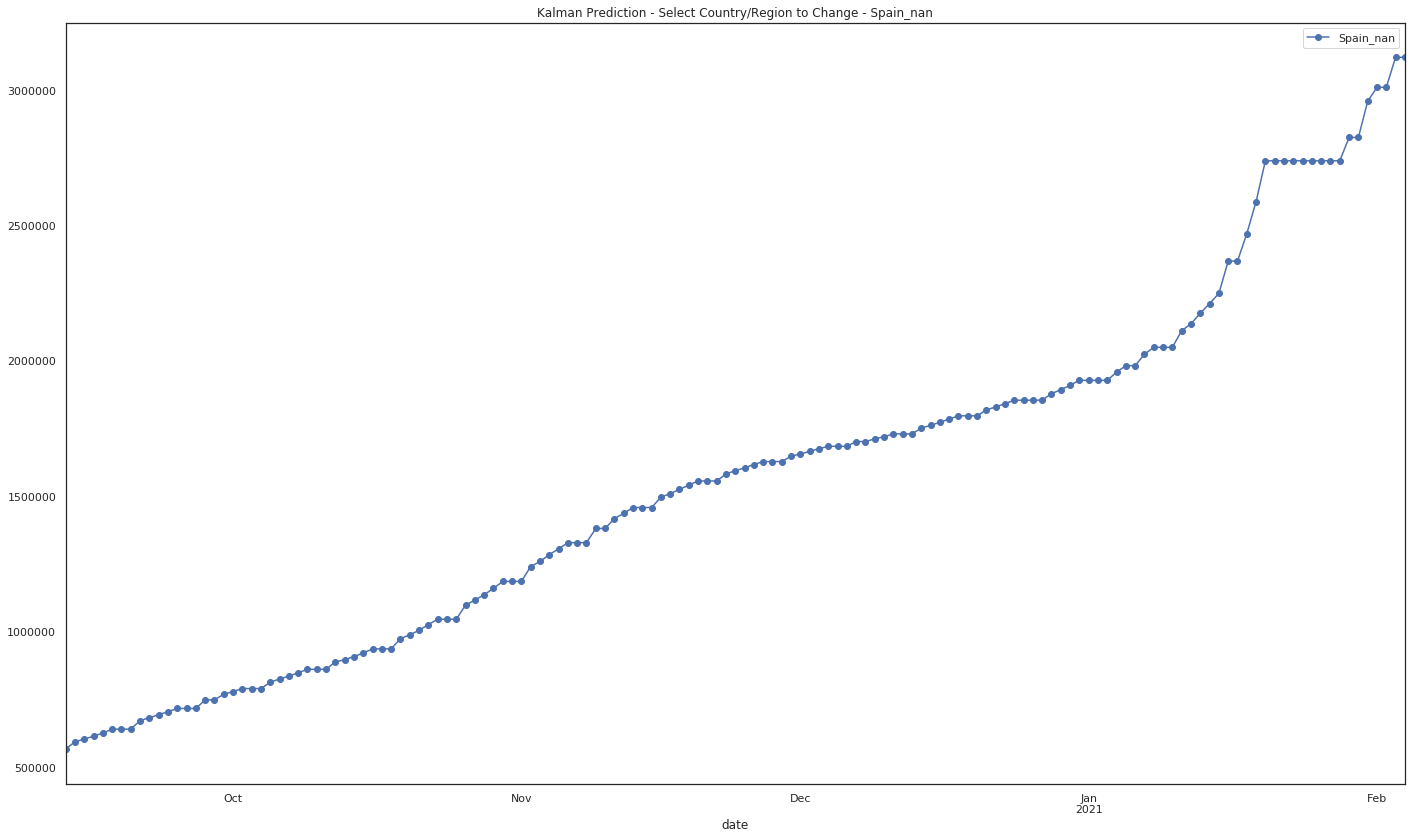

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


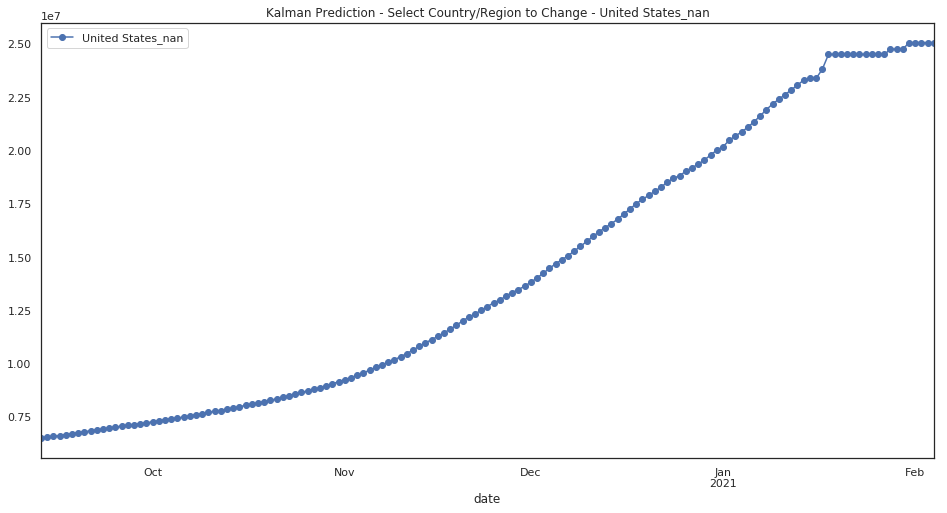

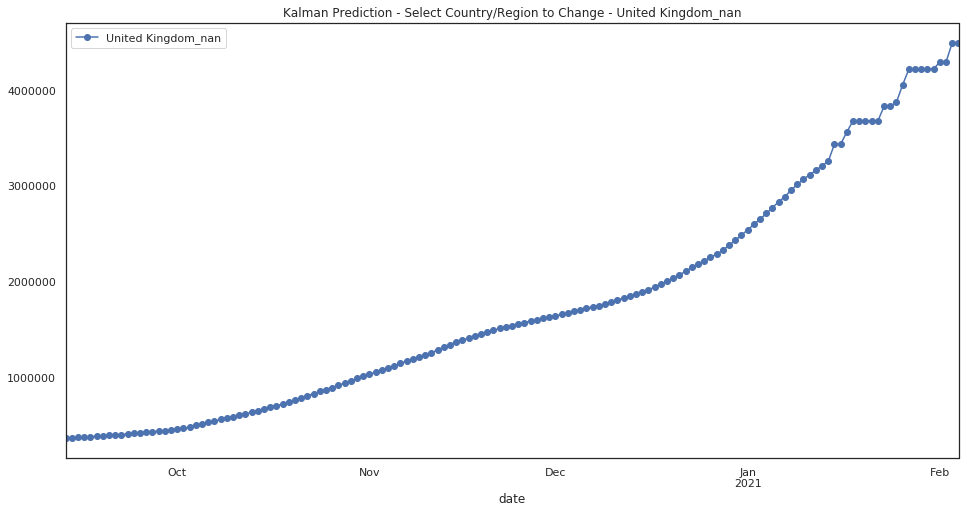

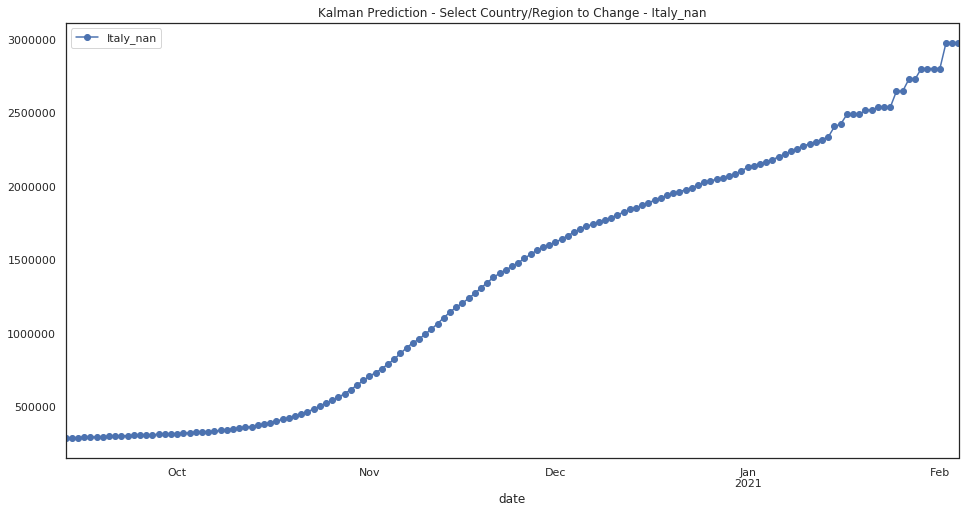

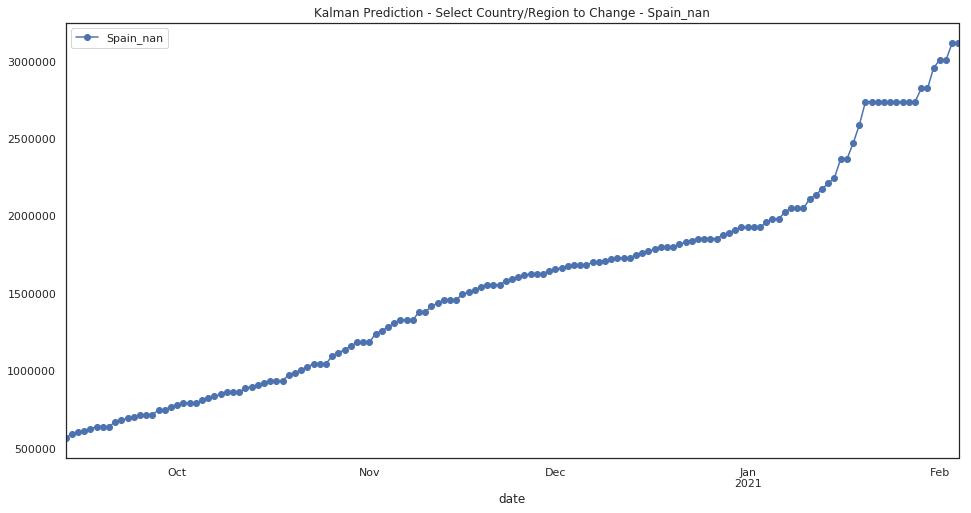

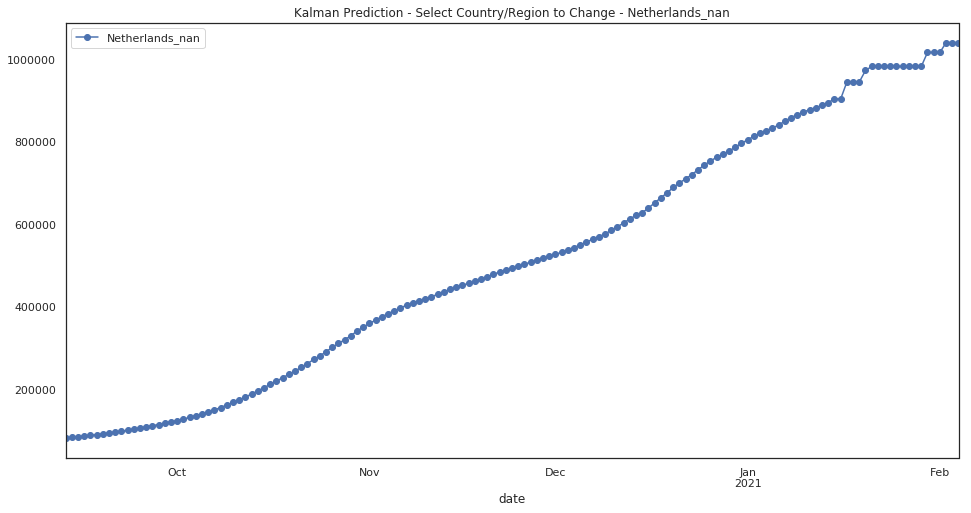

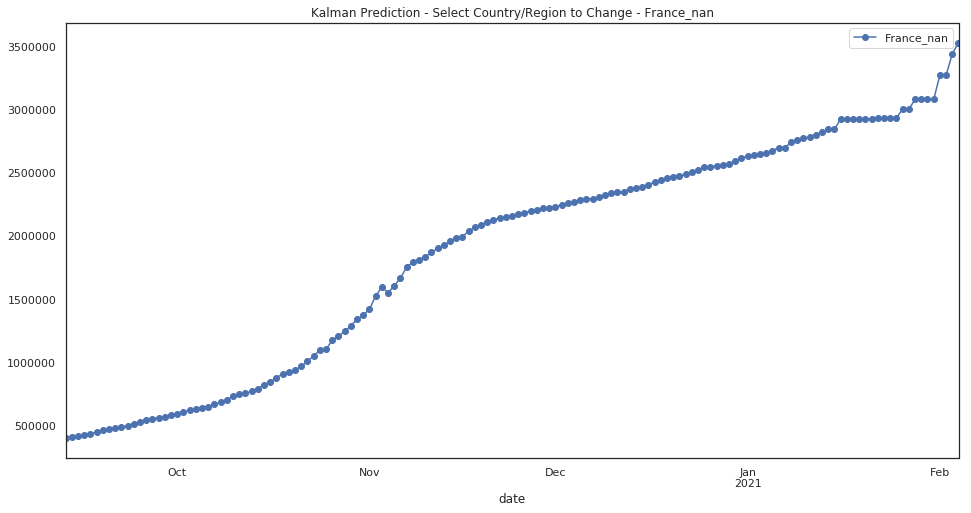

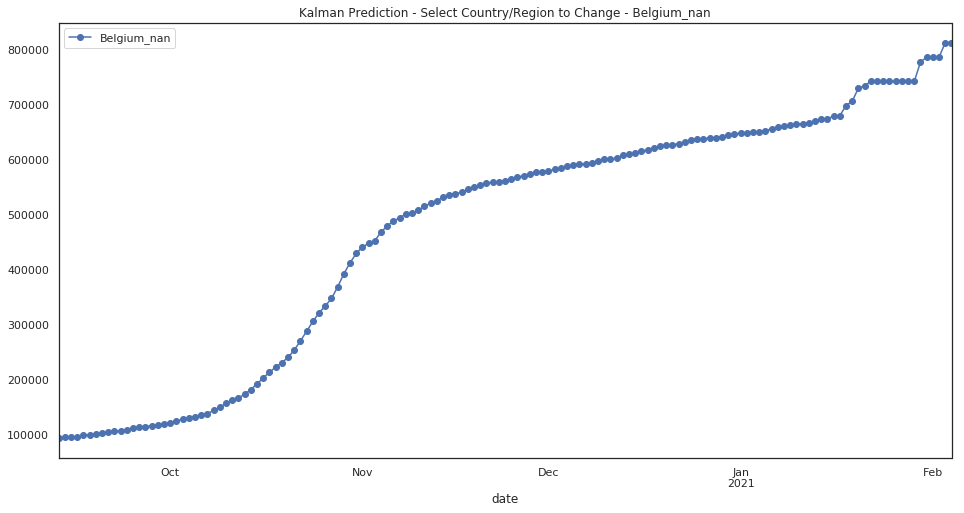

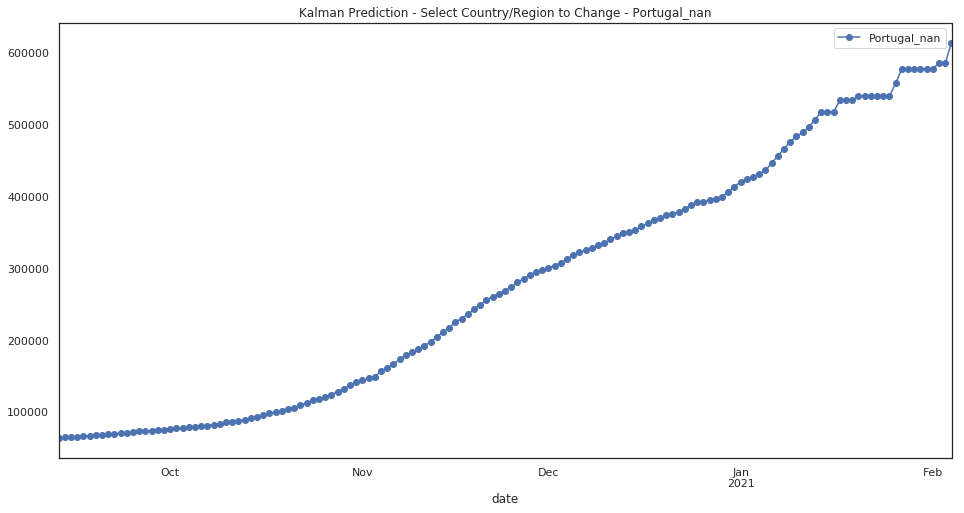

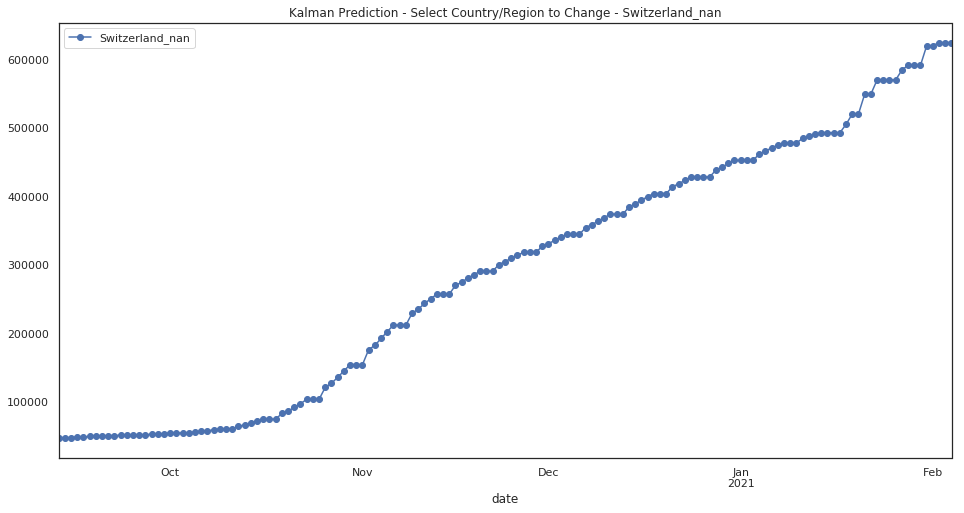

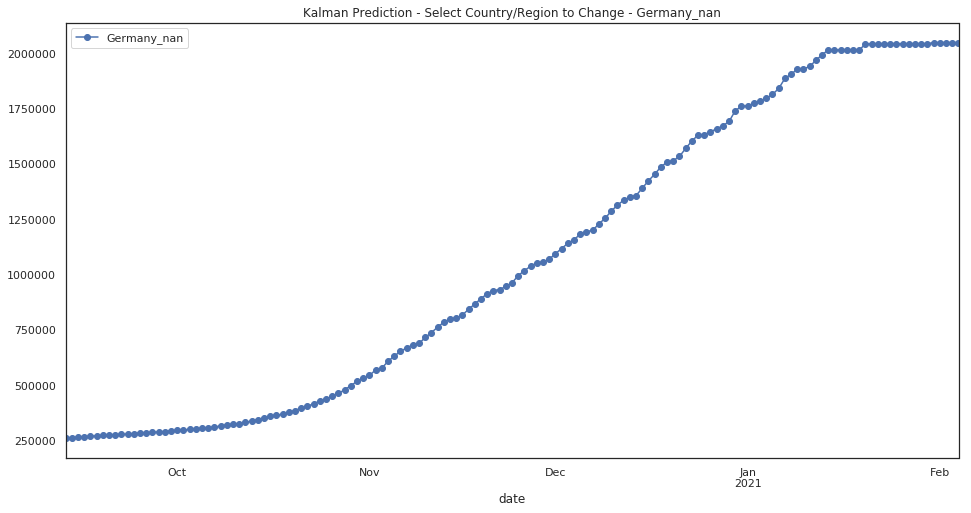

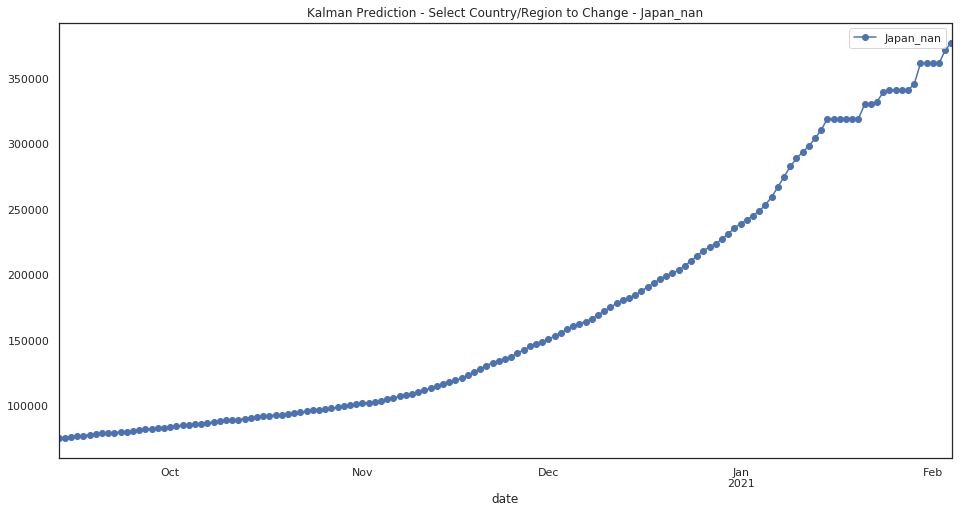

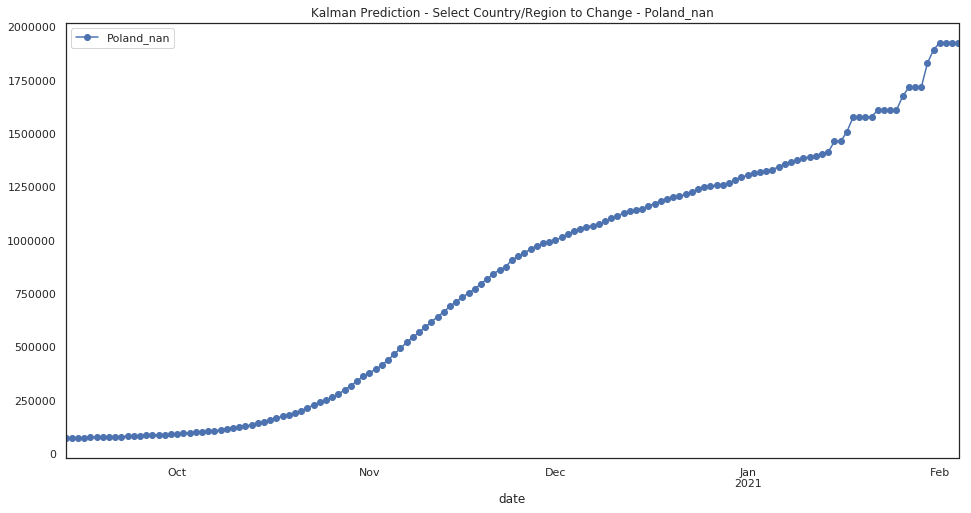

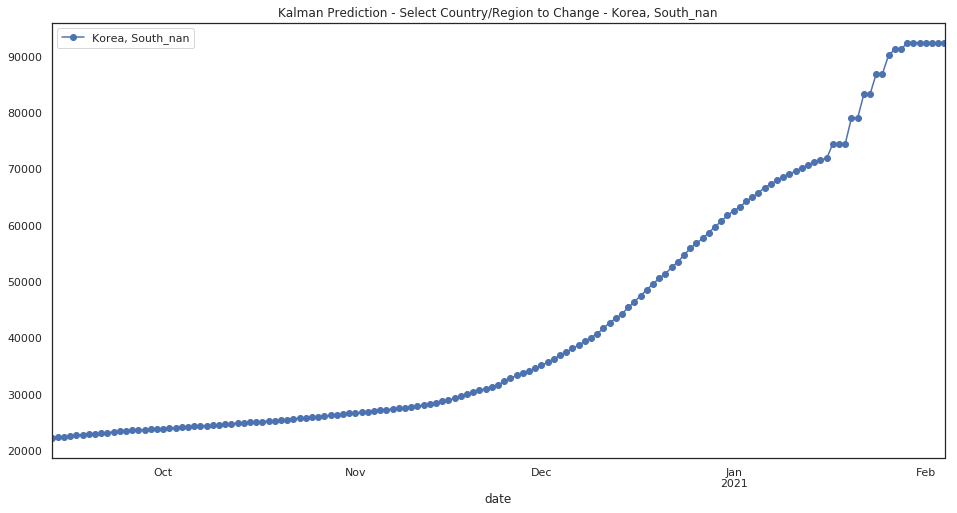

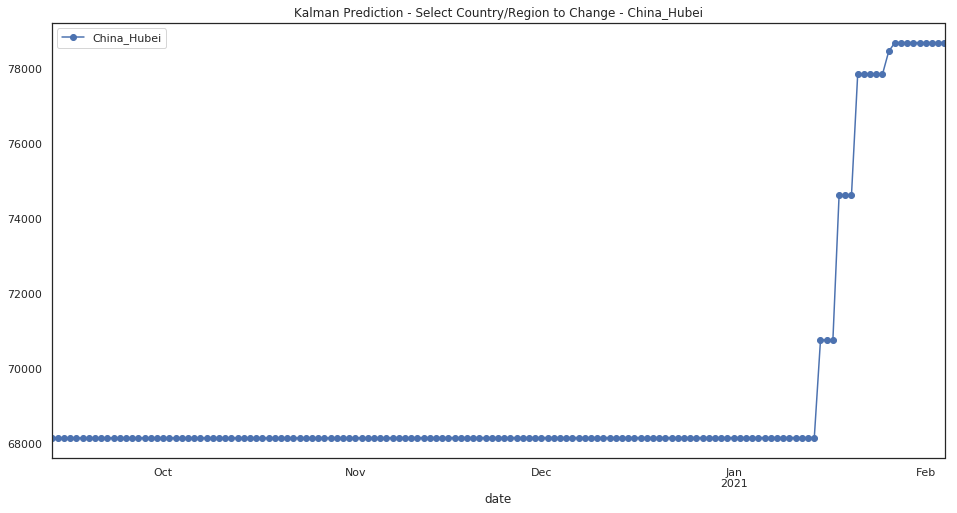

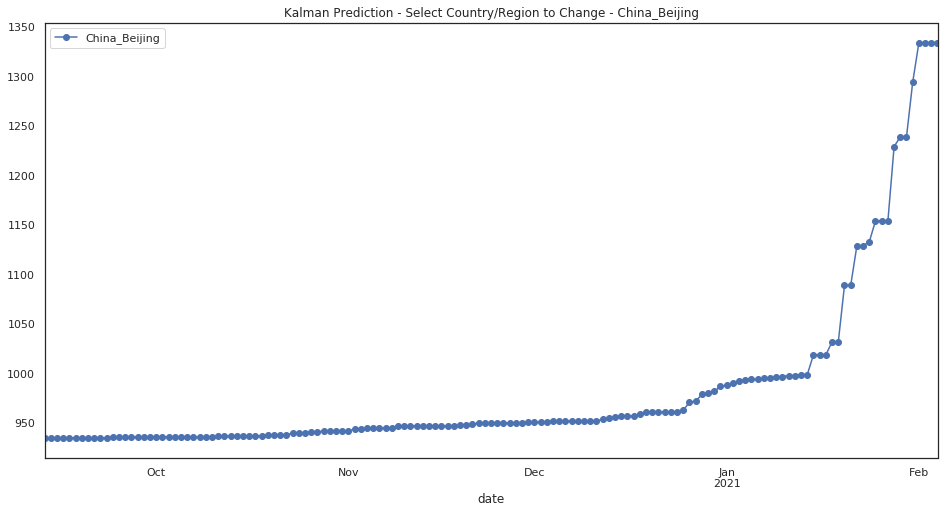

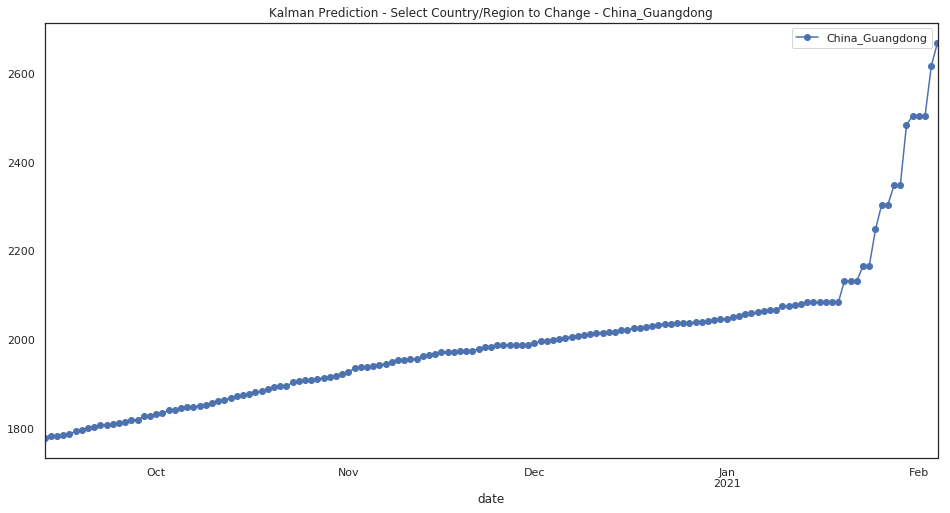

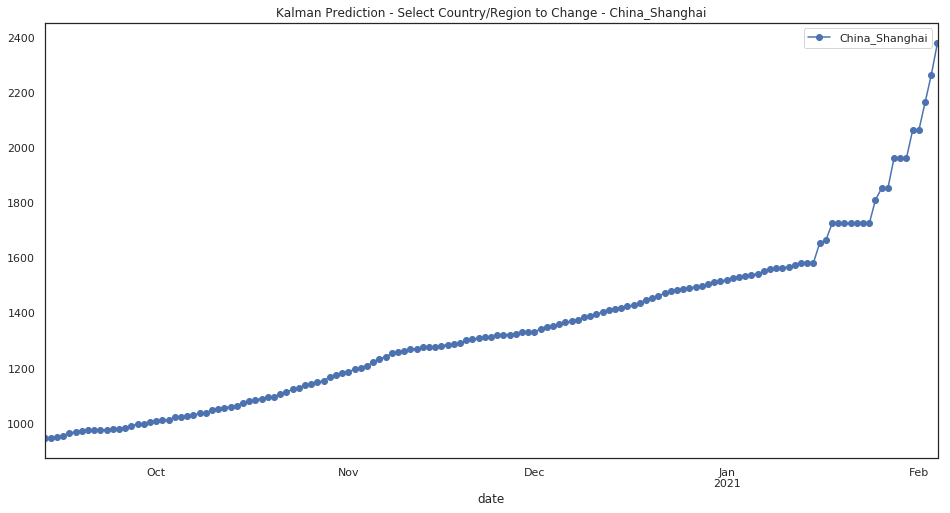

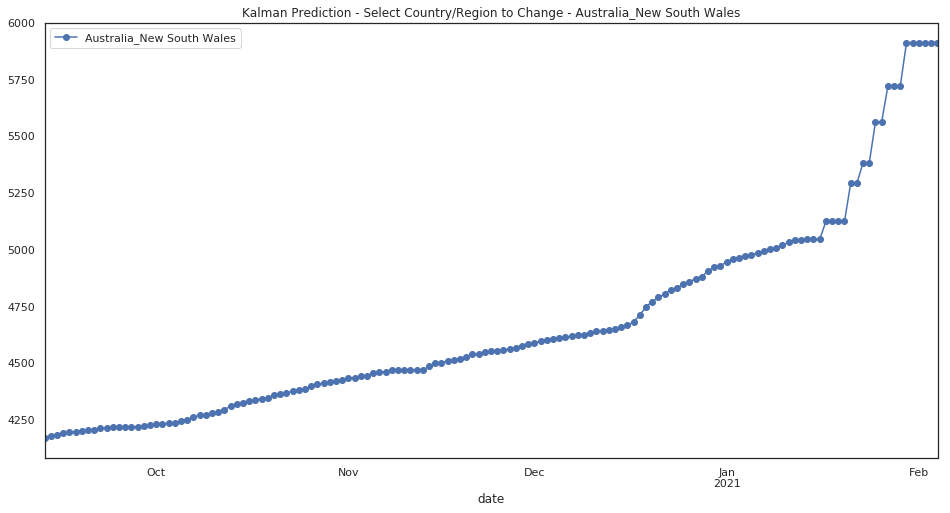

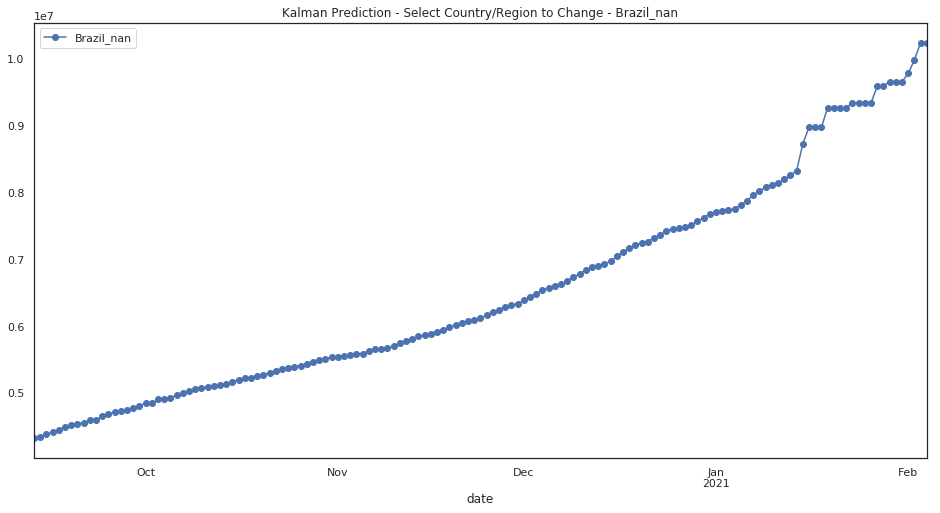

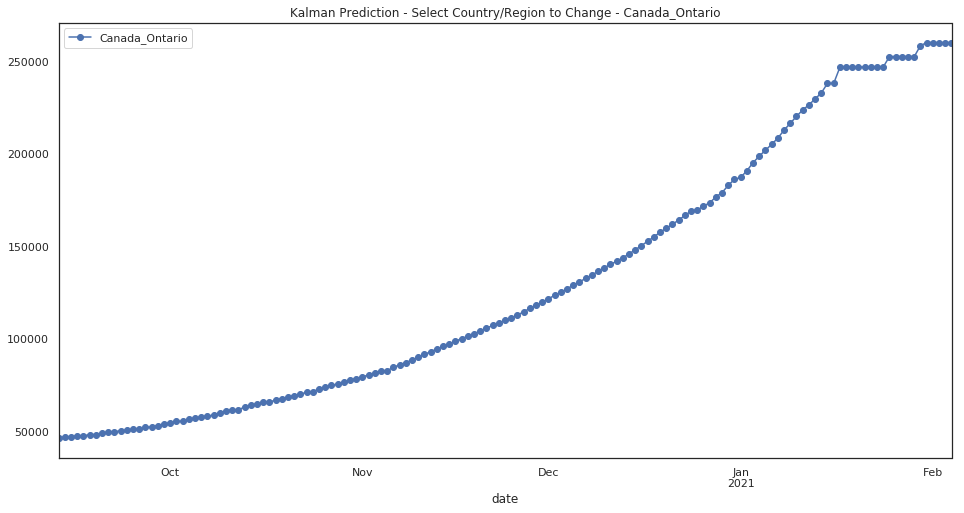

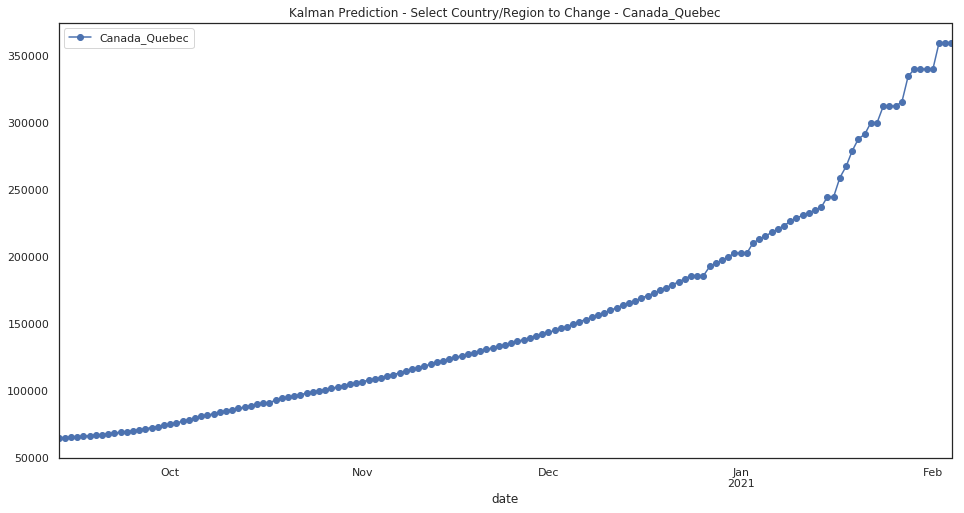

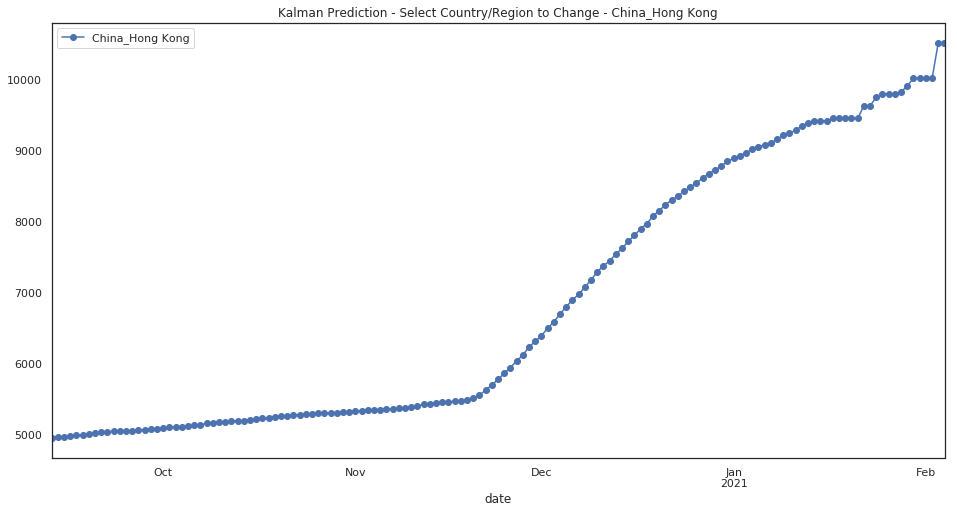

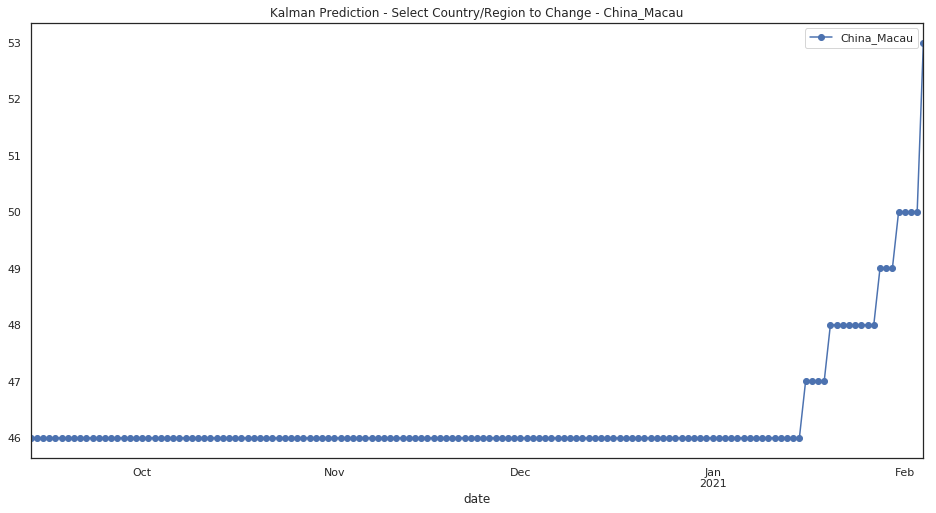

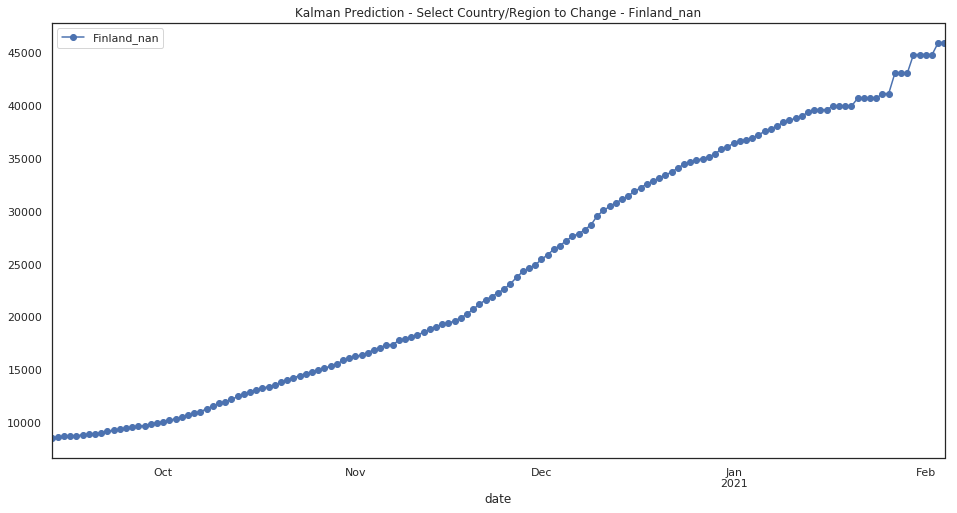

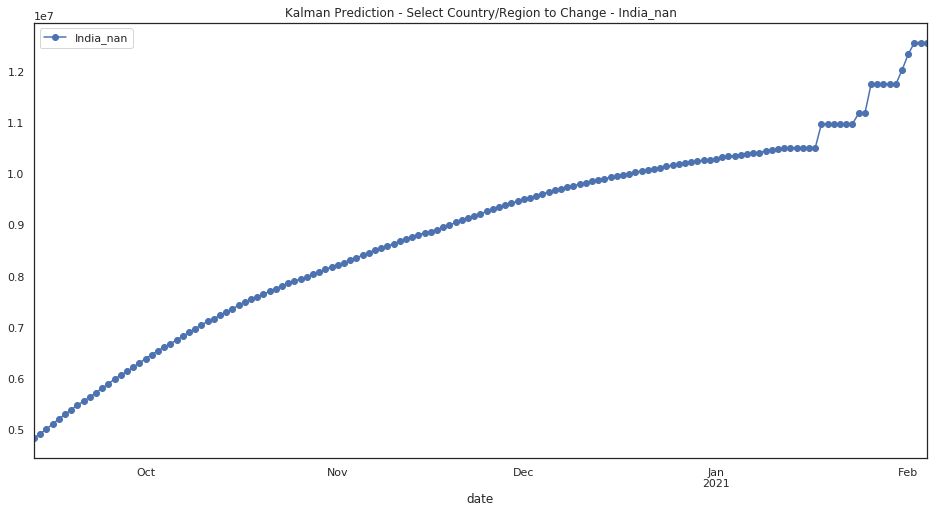

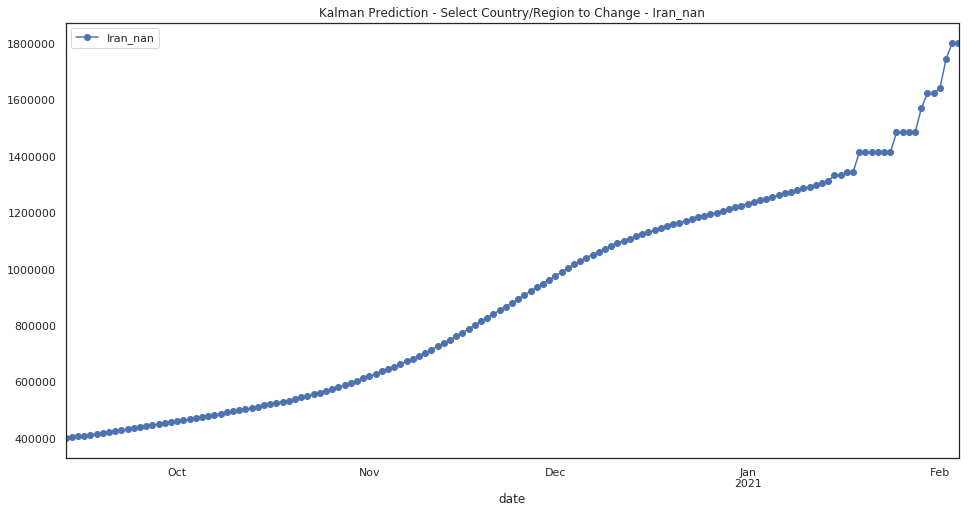

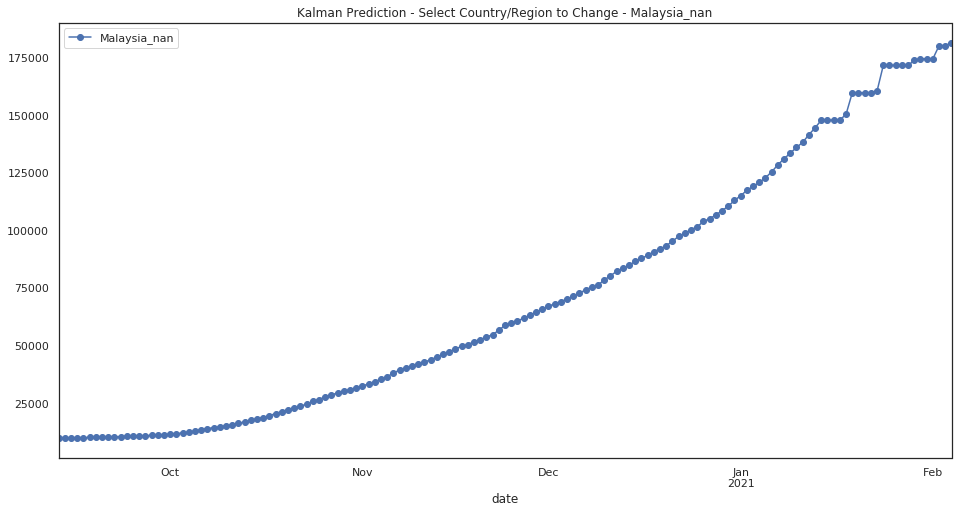

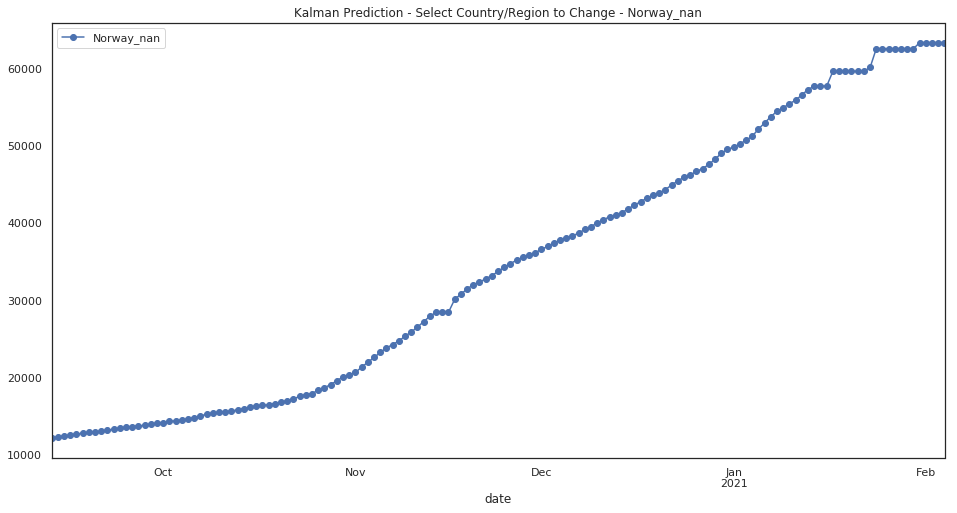

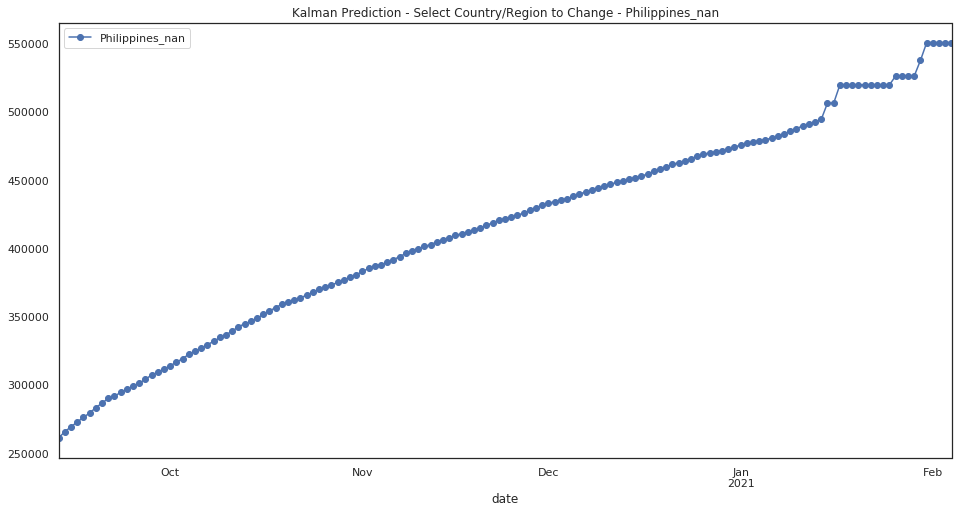

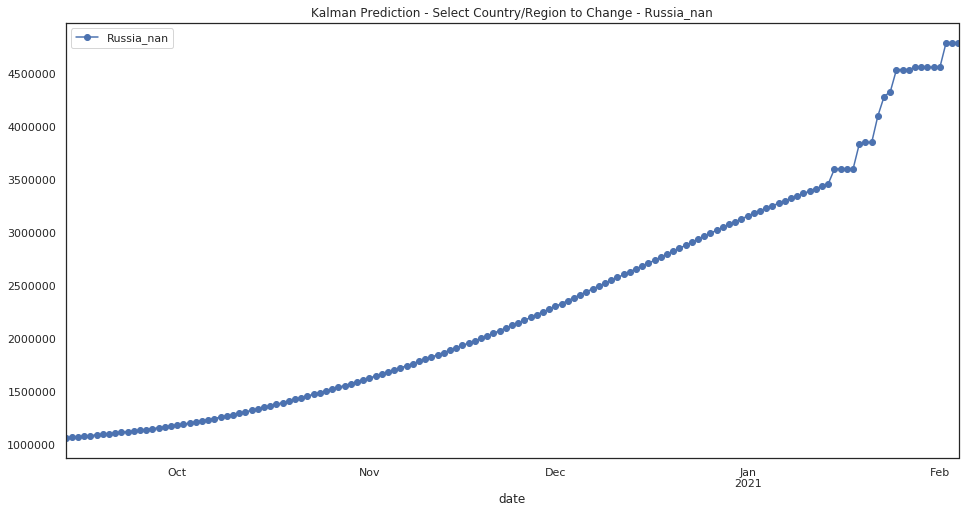

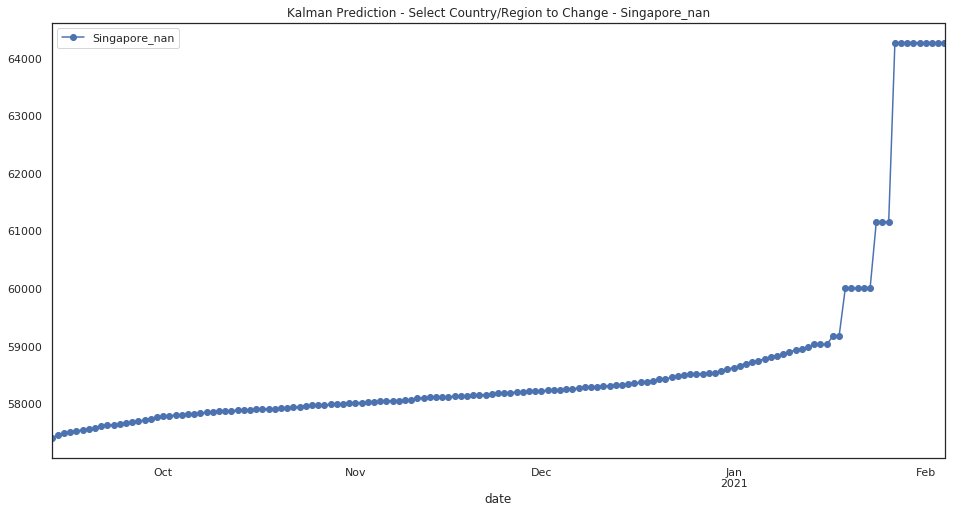

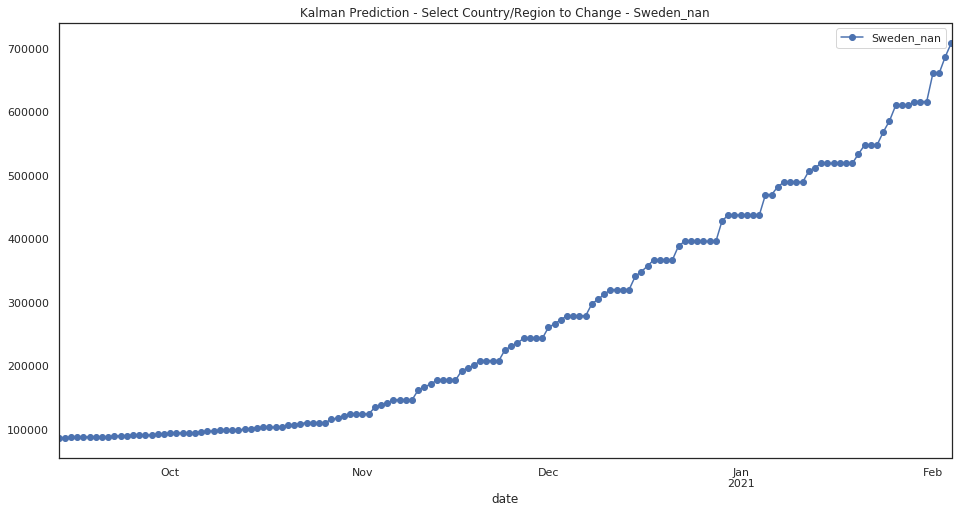

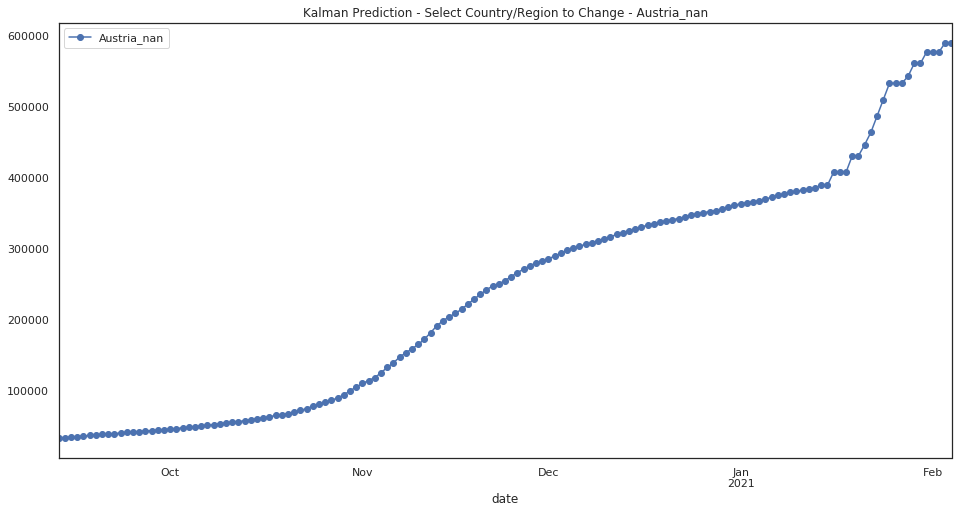

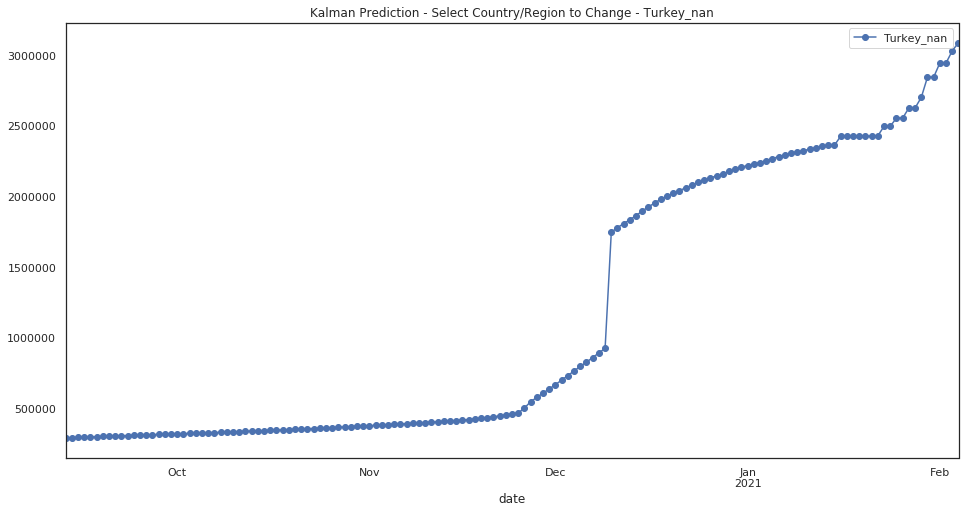

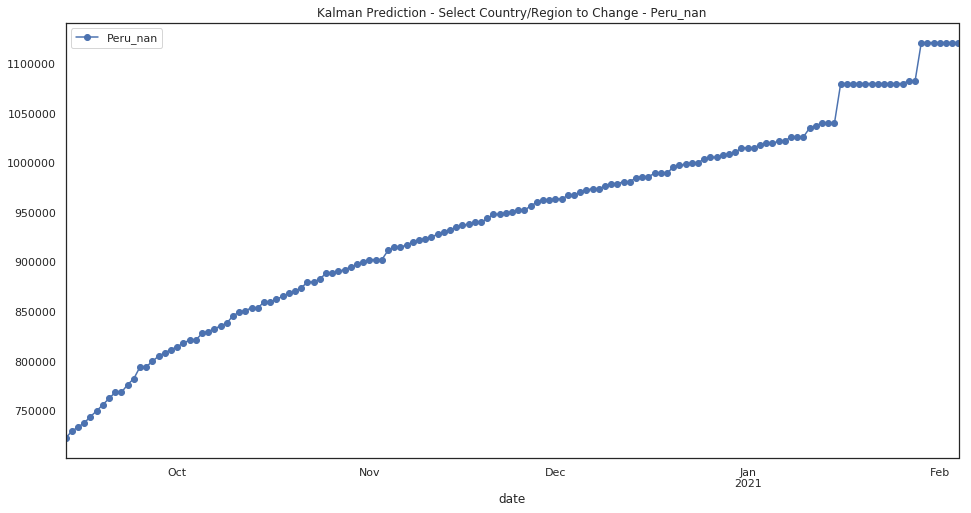

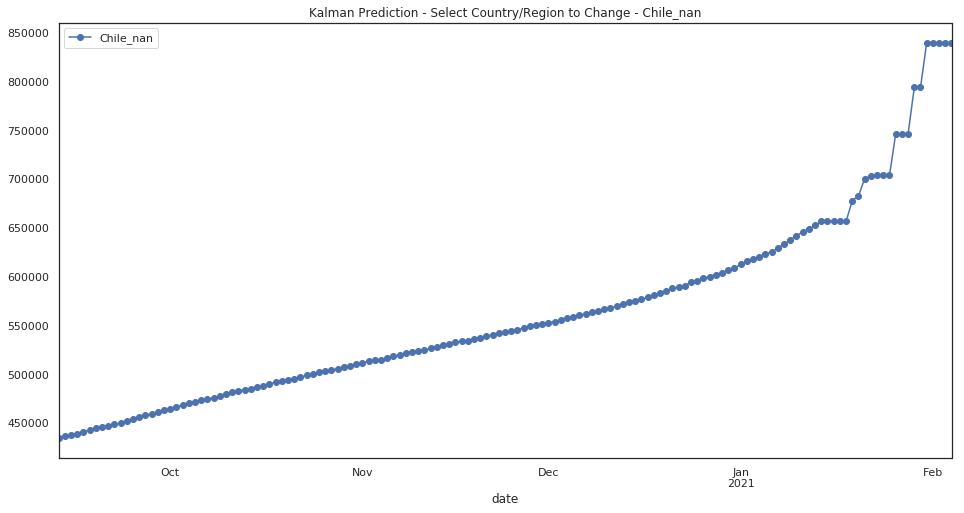

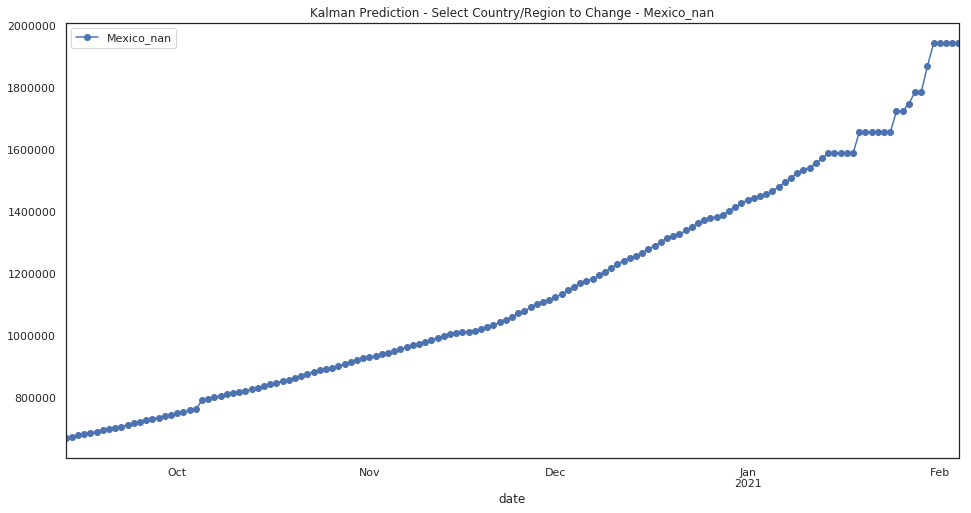

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-02-04 00:00:00
dtype: object


0  pred_confirmed
United States_nan                           NaN      25069927.0
India_nan                                   NaN      12561495.0
Brazil_nan                                  NaN      10235106.0
Russia_nan                                  NaN       4791106.0
United Kingdom_nan                          NaN       4499377.0
France_nan                                  NaN       3532372.0
Spain_nan                                   NaN       3121609.0
Turkey_nan                                  NaN       3091494.0
Italy_nan                                   NaN       2978907.0
Colombia_nan                                NaN       2542619.0
Argentina_nan                               NaN       2119203.0
Germany_nan                                 NaN       2048667.0
Mexico_nan                                  NaN       1945281.0
South Africa_nan                            NaN       1929491.0
Poland_nan                                  NaN       1925792.0
Iran_nan                                    NaN       1802673.0
Ukraine_nan                                 NaN       1701755.0
Czechia_nan                                 NaN       1241508.0
Peru_nan                                    NaN       1121117.0
Netherlands_nan                             NaN       1041093.0
Romania_nan                                 NaN       1005456.0
Indonesia_nan                               NaN        997604.0
Chile_nan                                   NaN        839859.0
Belgium_nan                                 NaN        812804.0
Israel_nan                                  NaN        728440.0
Pakistan_nan                                NaN        723201.0
Sweden_nan                                  NaN        709052.0
Iraq_nan                                    NaN        689031.0
Bangladesh_nan                              NaN        663374.0
Switzerland_nan                             NaN        624392.0
...                                         ...             ...
Dominica_nan                                NaN           147.0
Australia_Australian Capital Territory      NaN           138.0
Canada_Prince Edward Island                 NaN           131.0
Australia_Northern Territory                NaN           116.0
China_Ningxia                               NaN            97.0
Canada_Yukon                                NaN            86.0
Timor-Leste_nan                             NaN            73.0
Fiji_nan                                    NaN            67.0
China_Macau                                 NaN            53.0
France_New Caledonia                        NaN            50.0
Laos_nan                                    NaN            49.0
United Kingdom_Falkland Islands (Malvinas)  NaN            43.0
Saint Kitts and Nevis_nan                   NaN            42.0
Denmark_Greenland                           NaN            41.0
Holy See_nan                                NaN            28.0
France_Saint Pierre and Miquelon            NaN            26.0
Canada_Northwest Territories                NaN            24.0
United Kingdom_Anguilla                     NaN            21.0
Solomon Islands_nan                         NaN            20.0
China_Qinghai                               NaN            20.0
Canada_Repatriated Travellers               NaN            17.0
Canada_Grand Princess                       NaN            16.0
United Kingdom_Montserrat                   NaN            14.0
MS Zaandam_nan                              NaN             9.0
Marshall Islands_nan                        NaN             4.0
France_Wallis and Futuna                    NaN             4.0
Samoa_nan                                   NaN             2.0
Vanuatu_nan                                 NaN             1.0
China_Tibet                                 NaN             1.0
Canada_Diamond Princess                     NaN             0.0

[272 rows x 2 columns]

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          59031.0      35482.0      67239.0      26868.0   
2020-09-14          59079.0      35625.0      67447.0      26949.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39277.0      12541.0      50181.0       2079.0   
2020-09-22          39326.0      12698.0      50375.0       1681.0   
2020-09-23          39374.0      12853.0      50563.0       2194.0   
2020-09-24          39389.0      12997.0      50745.0       1753.0   
2020-09-25          39411.0      13098.0      50922.0       2224.0   
2020-09-26          39421.0      13226.0      51086.0       1836.0   
2020-09-27          39451.0      13359.0      51242.0       2237.0   
2020-09-28          39464.0      13487.0      51390.0       2349.0   
2020-09-29          39485.0      13575.0      51545.0       1966.0   
2020-09-30          39500.0      13718.0      51707.0       2477.0   
2020-10-01          39516.0      13871.0      51868.0       2050.0   
2020-10-02          39523.0      13994.0      52028.0       2488.0   
2020-10-03          39533.0      14152.0      52179.0       2110.0   
2020-10-04          39570.0      14317.0      52321.0       2460.0   
2020-10-05          39639.0      14467.0      52456.0       2684.0   
2020-10-06          39699.0      14629.0      52585.0       2370.0   
2020-10-07          39769.0      14772.0      52708.0       3084.0   
2020-10-08          39836.0      14938.0      52844.0       2568.0   
2020-10-09          39906.0      15102.0      52990.0       3170.0   
2020-10-10          39921.0      15273.0      53129.0       2696.0   
2020-10-11          40017.0      15446.0      53264.0       3137.0   
2020-10-12          40070.0      15614.0      53500.0       3394.0   
...                     ...          ...          ...          ...   
2021-01-07          53463.0      61761.0     101554.0       8420.0   
2021-01-08          53471.0      62472.0     101833.0       8641.0   
2021-01-09          53541.0      63097.0     102098.0       8489.0   
2021-01-10          53633.0      63669.0     102330.0       8586.0   
2021-01-11          53680.0      64055.0     102550.0       8790.0   
2021-01-12          53799.0      64637.0     102812.0       8836.0   
2021-01-13          53806.0      65344.0     103046.0       8698.0   
2021-01-14          53966.0      66025.0     103297.0       8818.0   
2021-01-15          53988.0      66140.0     107650.0       9007.0   
2021-01-16          54002.0      67678.0     110685.0       8946.0   
2021-01-17          54006.0      68507.0     111286.0       9117.0   
2021-01-18          55767.0      68610.0     111343.0       9085.0   
2021-01-19          55986.0      68620.0     110921.0       9091.0   
2021-01-20          56107.0      68521.0     113805.0       9376.0   
2021-01-21          58698.0      68520.0     117904.0       9283.0   
2021-01-22          60658.0      68550.0     118381.0       9465.0   
2021-01-23          61075.0      68550.0     119651.0       9522.0   
2021-01-24          61211.0      68651.0     124642.0       9444.0   
2021-01-25          61000.0      68682.0     125933.0       9438.0   
2021-01-26          61977.0      70787.0     130965.0       9438.0   
2021-01-27          62175.0      71447.0     133576.0       9438.0   
2021-01-28          62981.0      71358.0     132551.0       9437.0   
2021-01-29          63303.0      71345.0     133085.0       9437.0   
2021-01-30          63313.0      71174.0     138444.0       9846.0   
2021-01-31

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'France_nan',
 'Spain_nan',
 'Turkey_nan',
 'Italy_nan',
 'Colombia_nan',
 'Argentina_nan',
 'Germany_nan',
 'Mexico_nan',
 'South Africa_nan',
 'Poland_nan',
 'Iran_nan',
 'Ukraine_nan',
 'Czechia_nan',
 'Peru_nan',
 'Netherlands_nan',
 'Romania_nan',
 'Indonesia_nan',
 'Chile_nan',
 'Belgium_nan',
 'Israel_nan',
 'Pakistan_nan',
 'Sweden_nan',
 'Iraq_nan',
 'Bangladesh_nan',
 'Switzerland_nan',
 'Portugal_nan',
 'Austria_nan',
 'Philippines_nan',
 'Morocco_nan',
 'Saudi Arabia_nan',
 'Hungary_nan',
 'Serbia_nan',
 'Panama_nan',
 'Jordan_nan',
 'Nepal_nan',
 'Japan_nan',
 'Lebanon_nan',
 'Canada_Quebec',
 'Georgia_nan',
 'Ecuador_nan',
 'Belarus_nan',
 'United Arab Emirates_nan',
 'Azerbaijan_nan',
 'Croatia_nan',
 'Kazakhstan_nan',
 'Canada_Ontario',
 'Slovakia_nan',
 'Lithuania_nan',
 'Dominican Republic_nan',
 'Bulgaria_nan',
 'Denmark_nan',
 'Costa Rica_nan',
 'Bolivia_nan',
 'West Bank and G

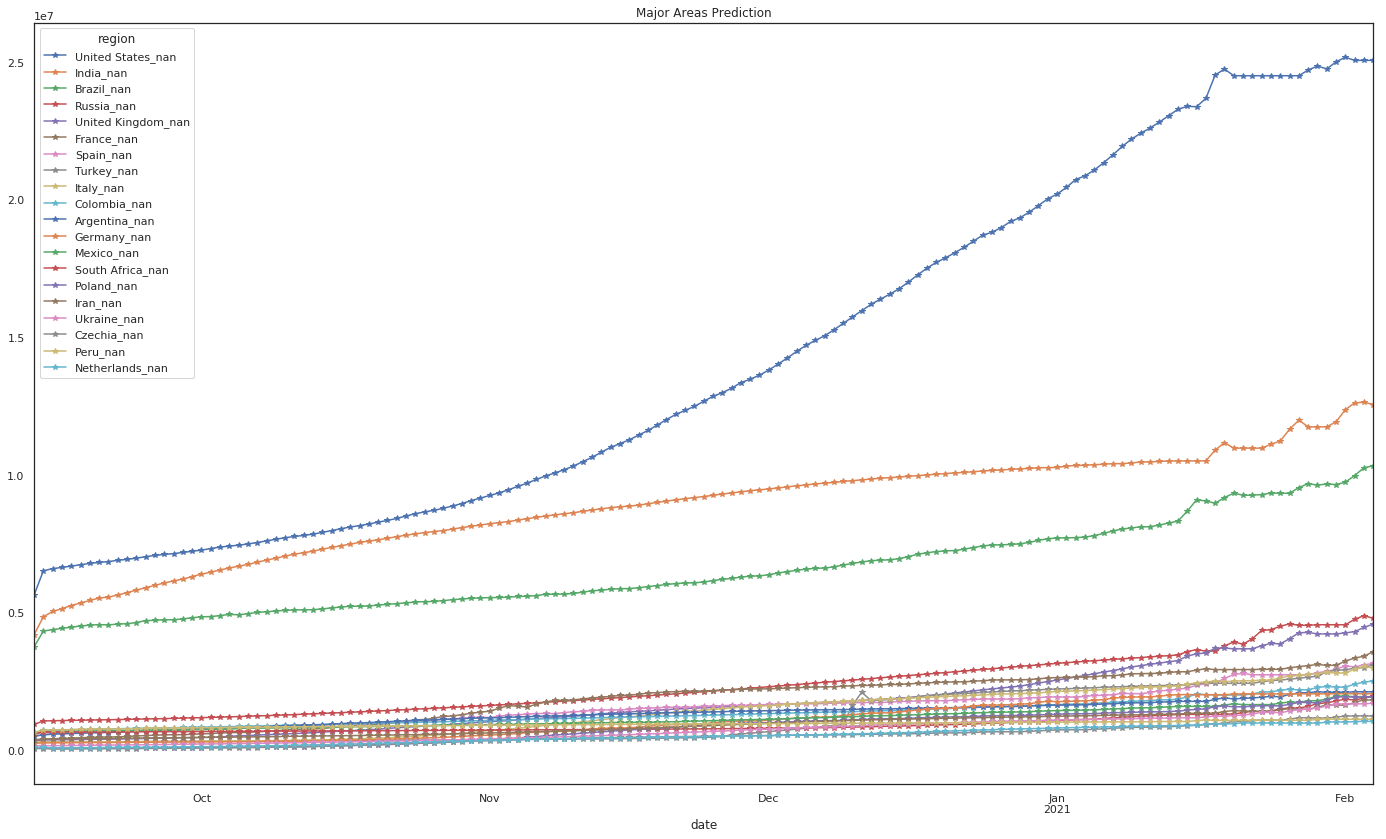

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

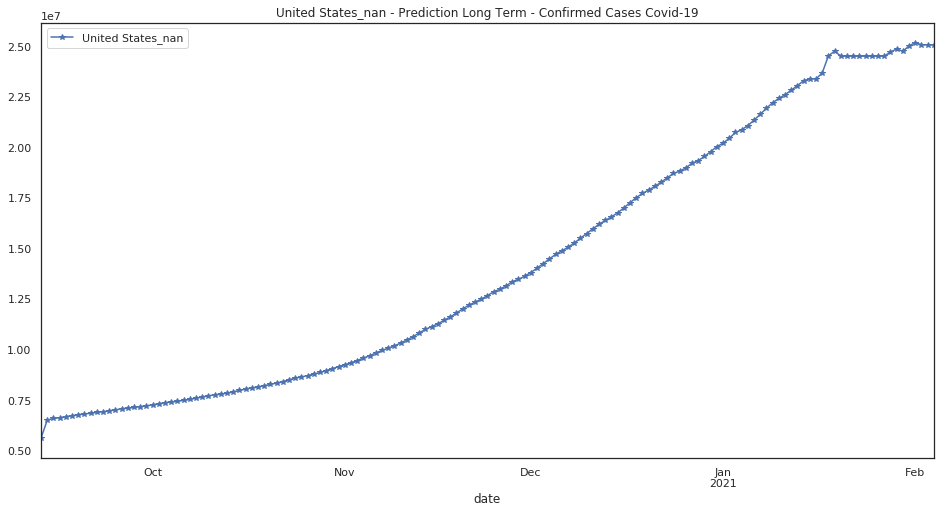

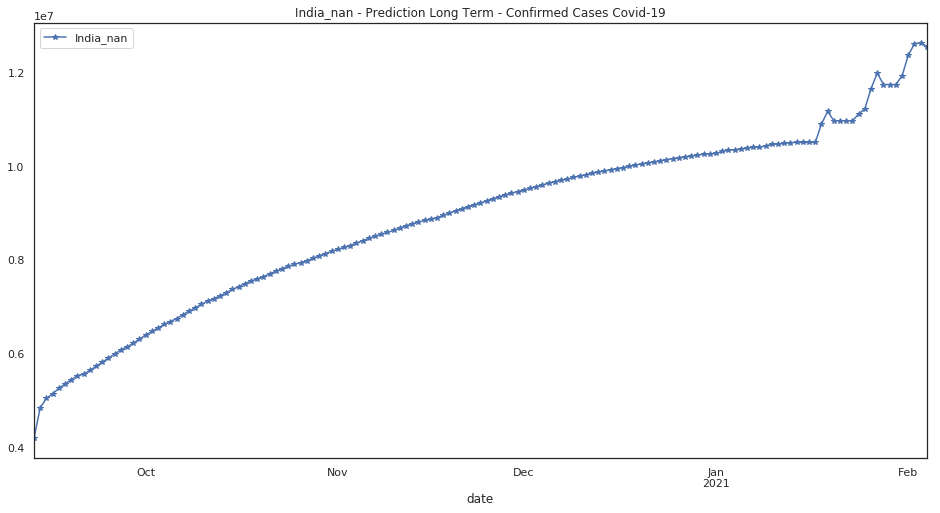

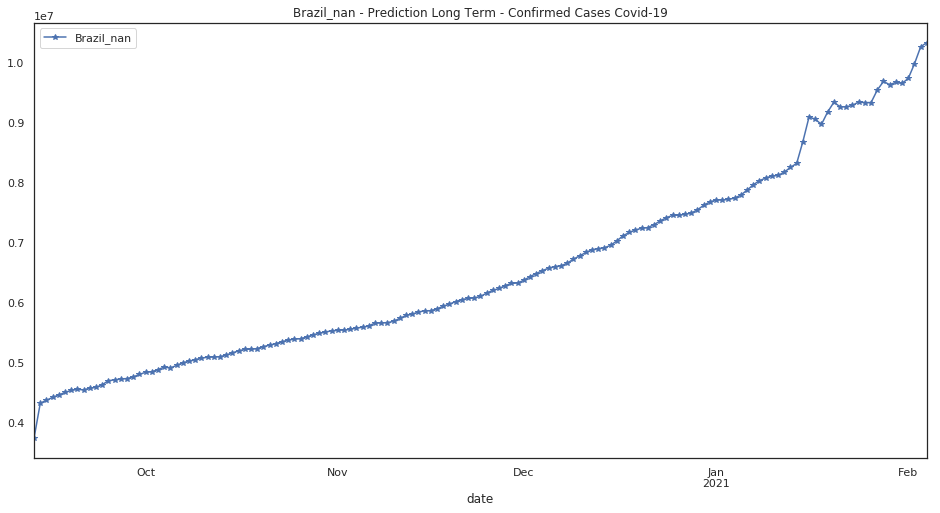

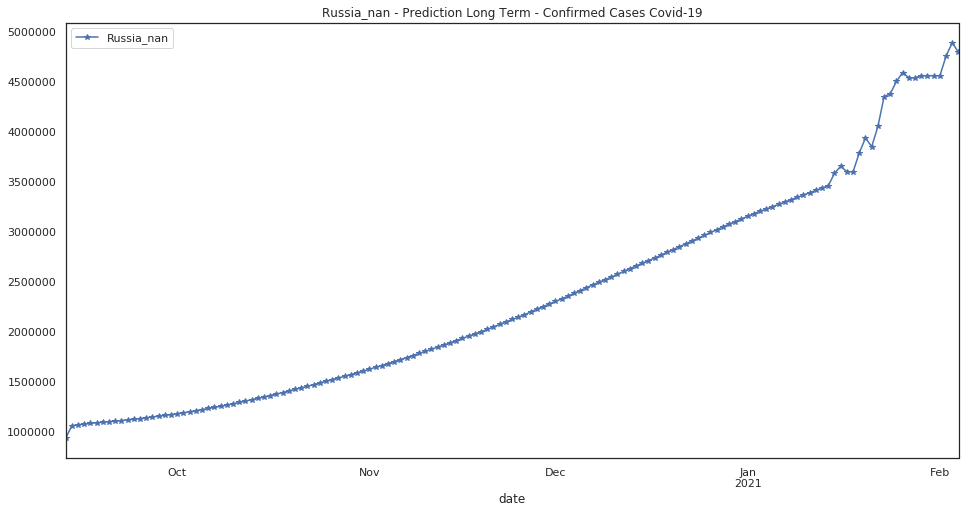

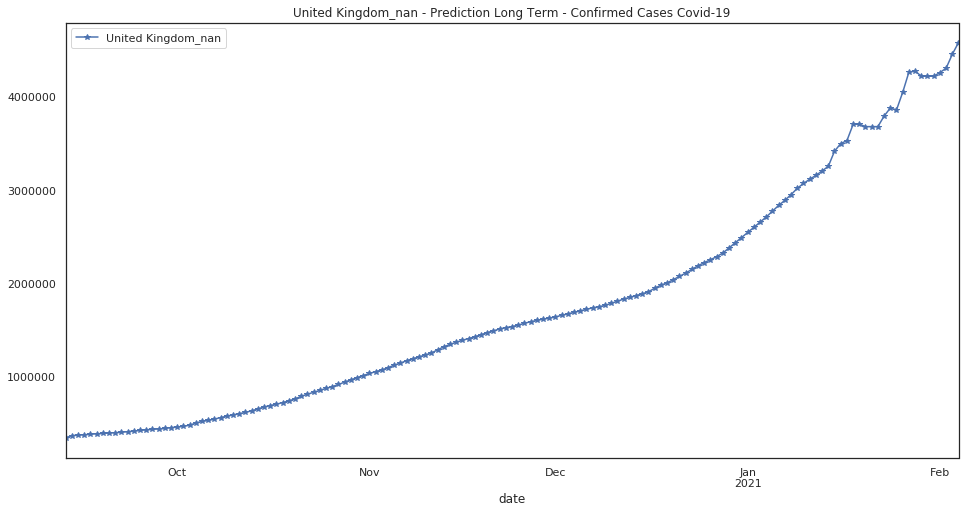

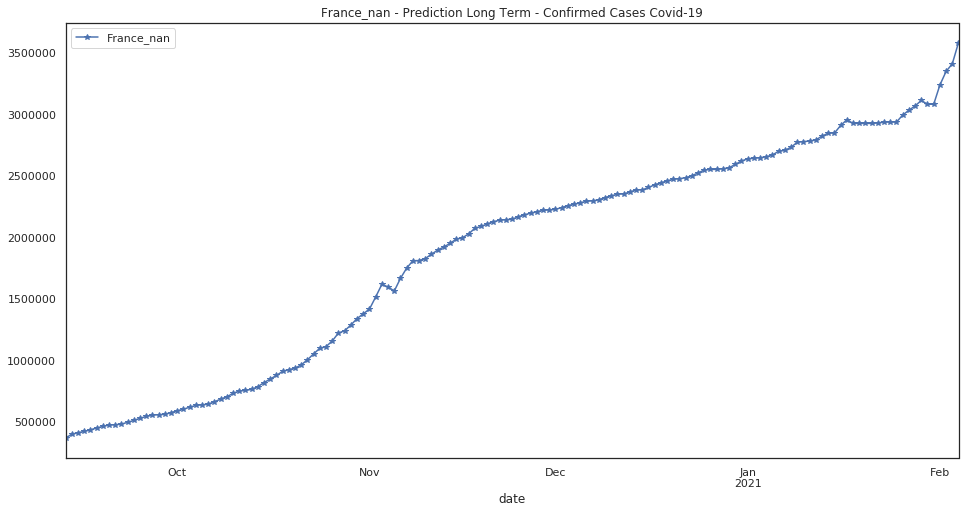

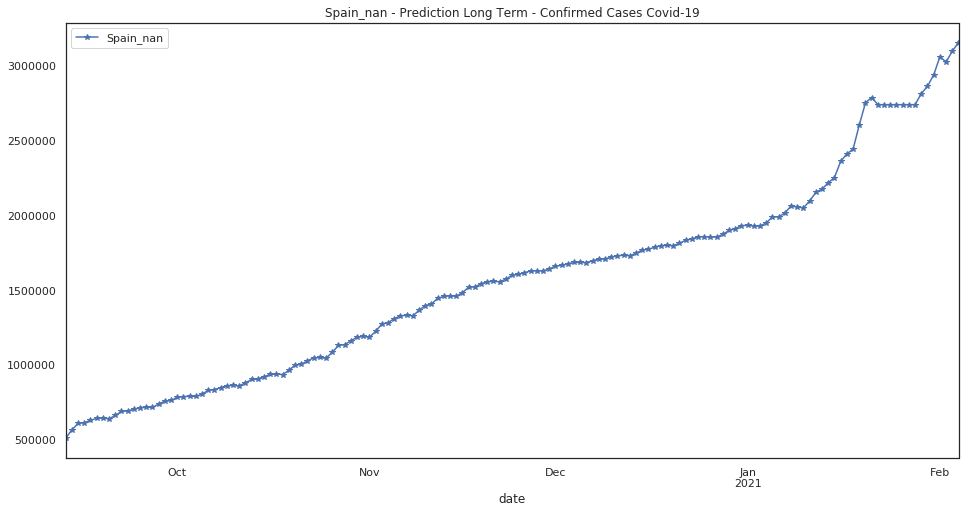

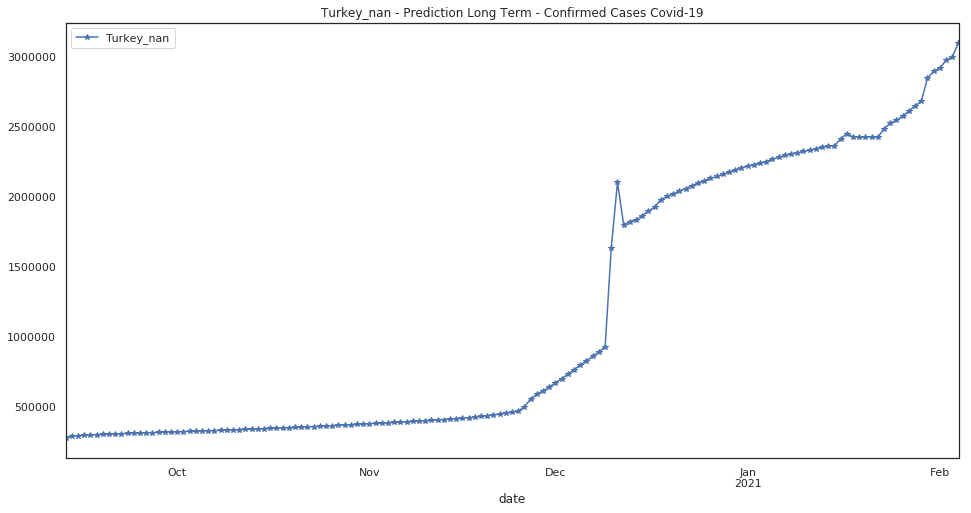

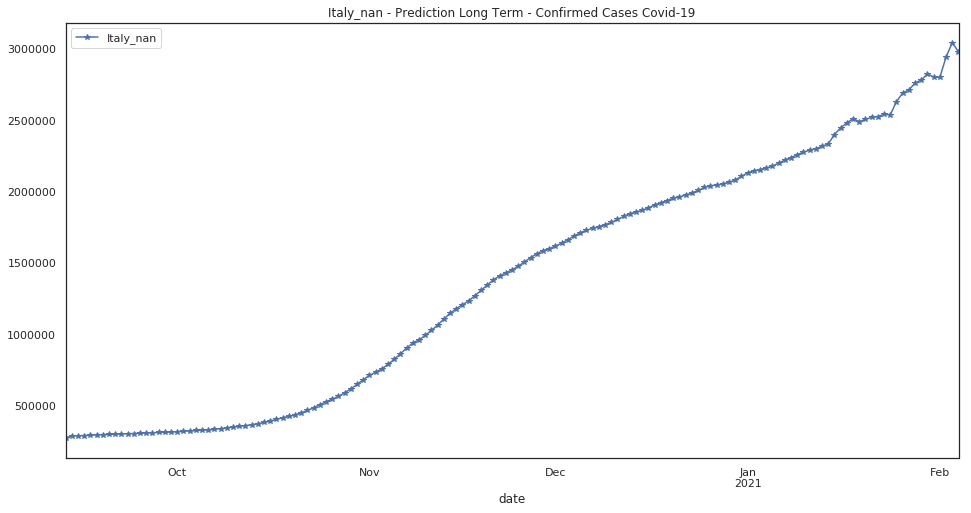

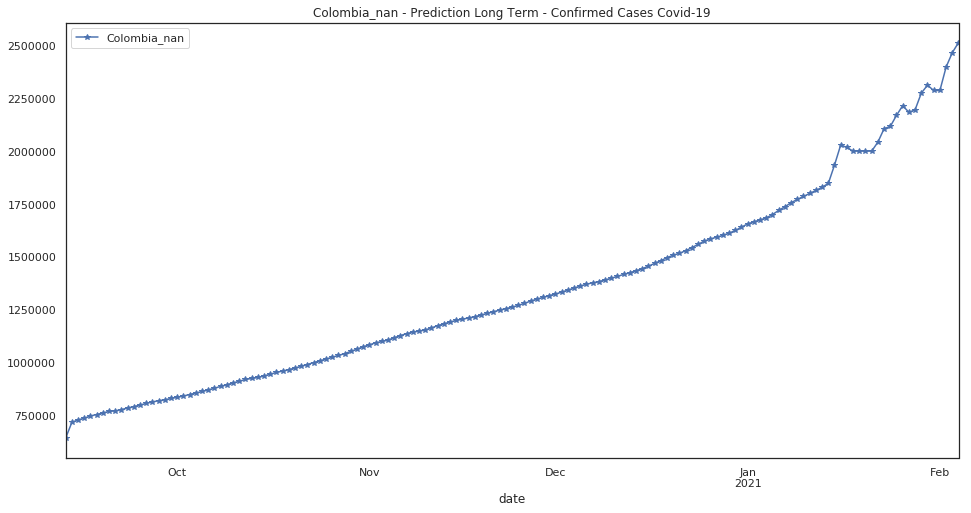

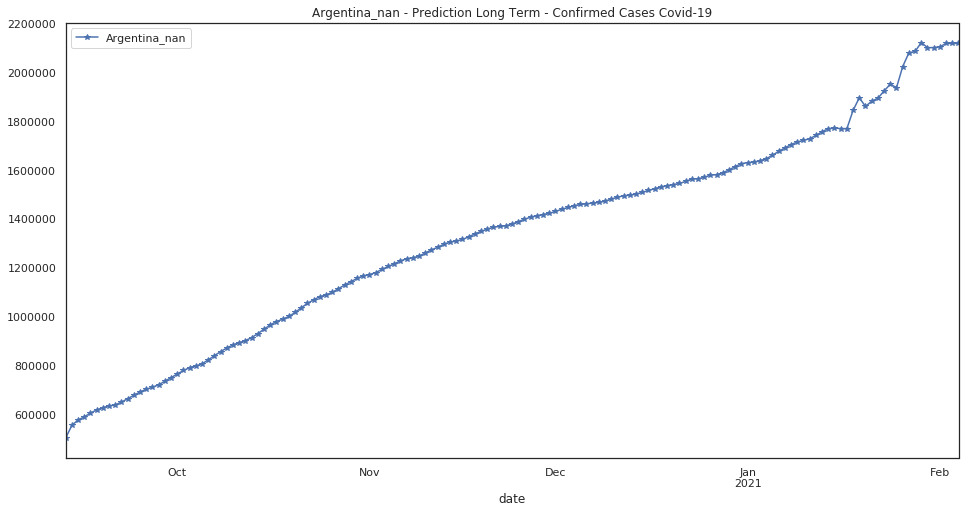

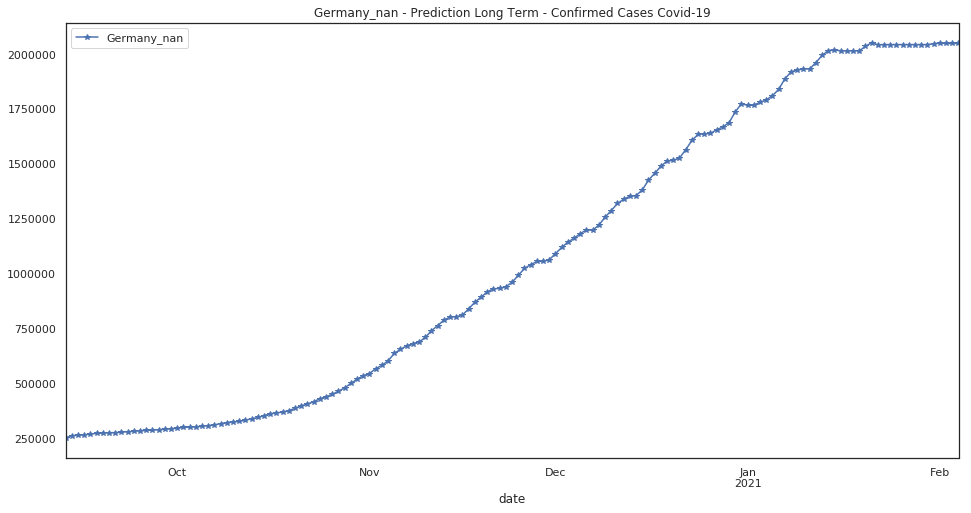

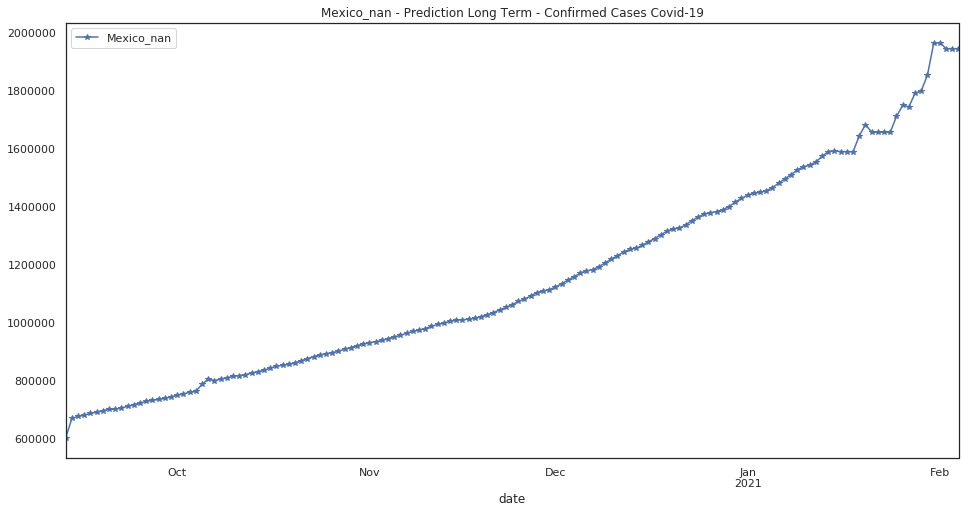

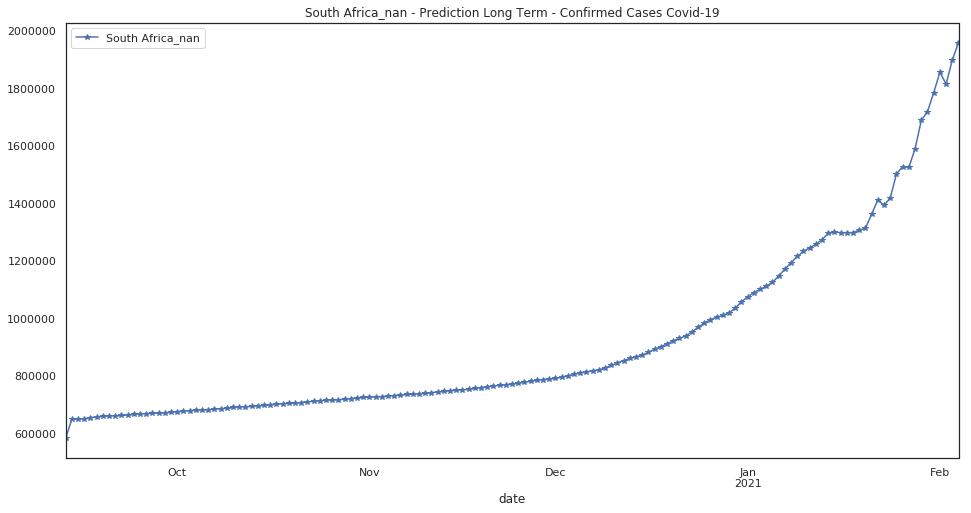

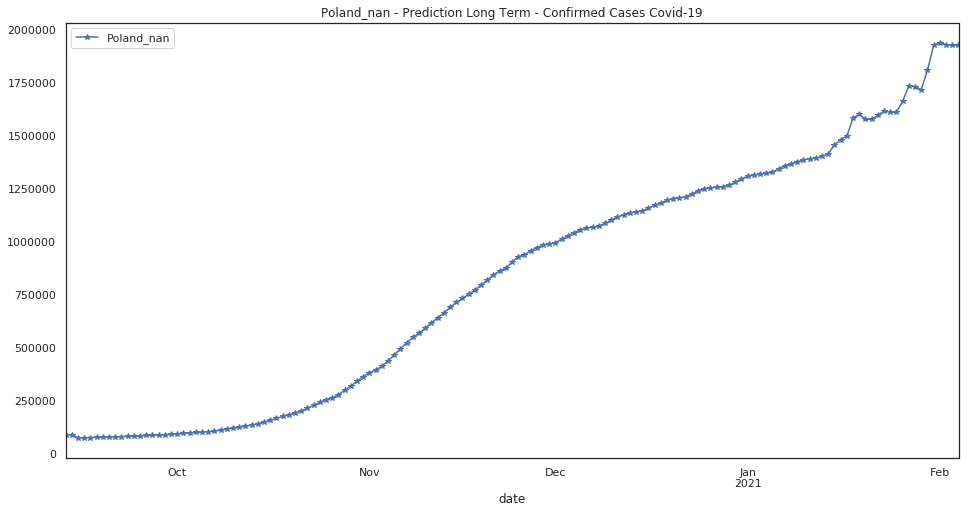

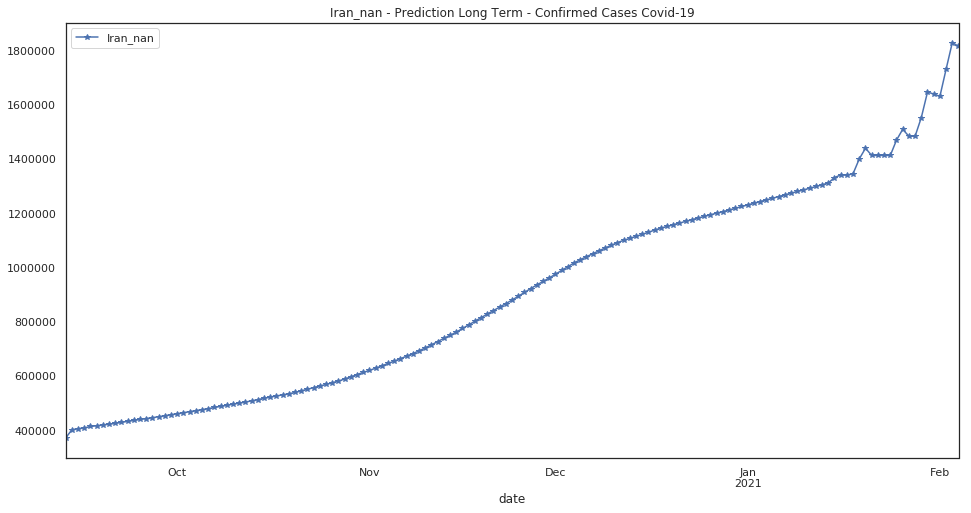

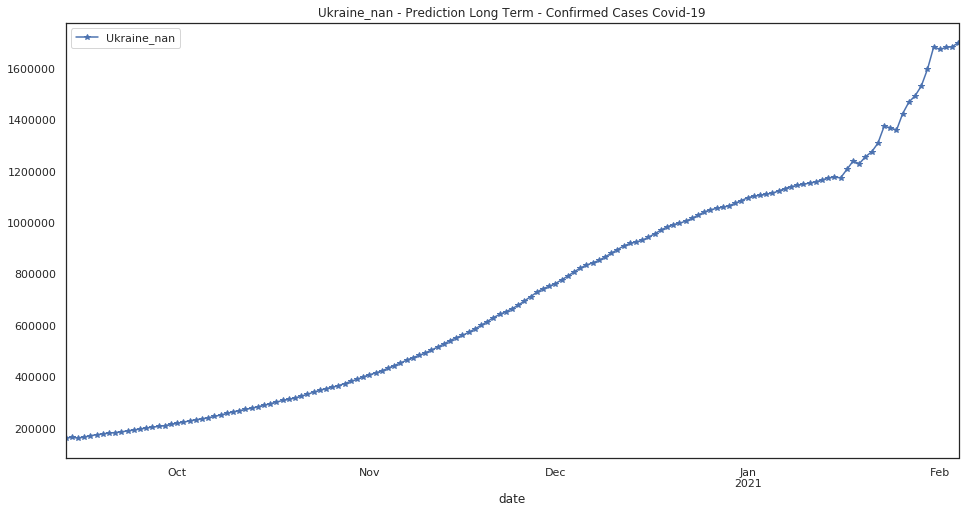

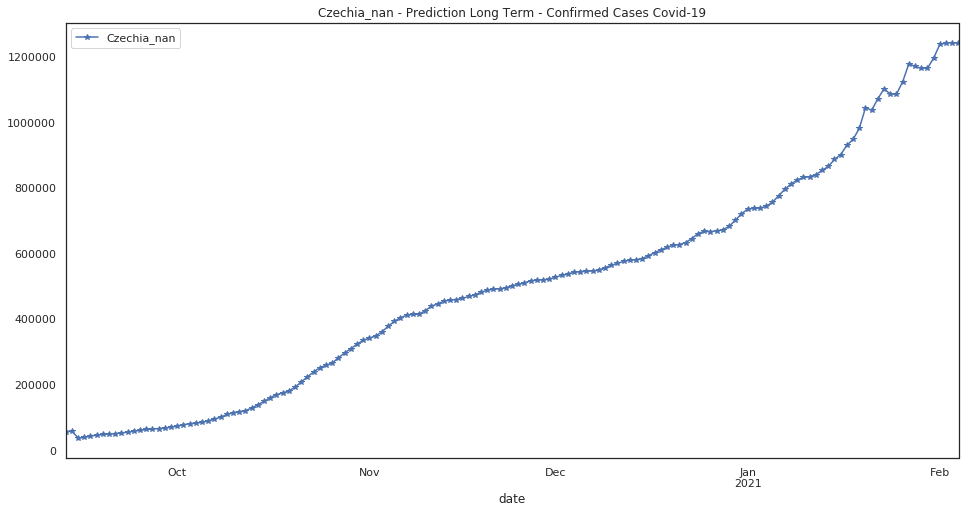

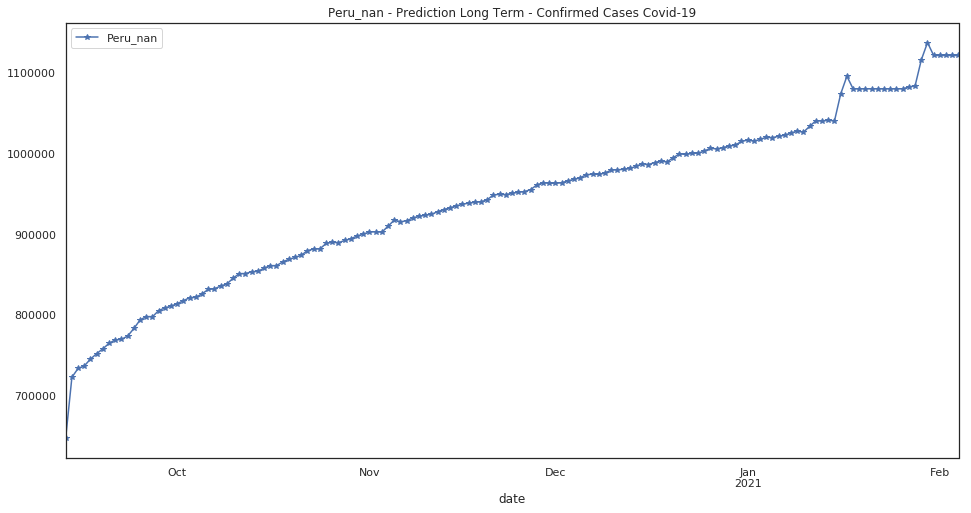

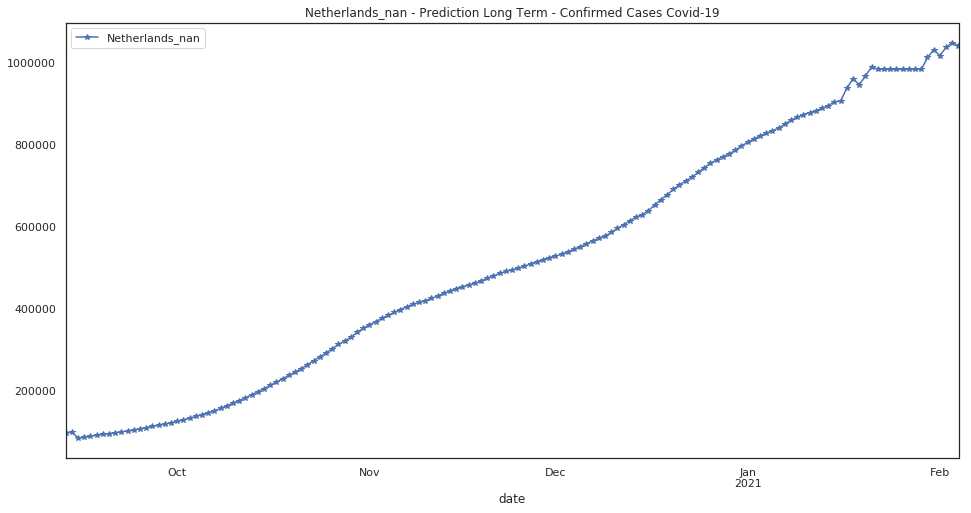

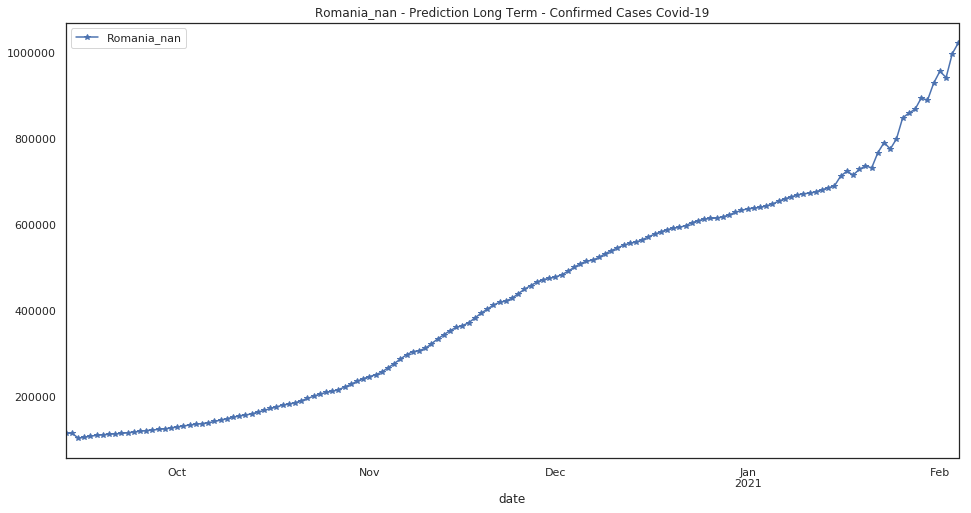

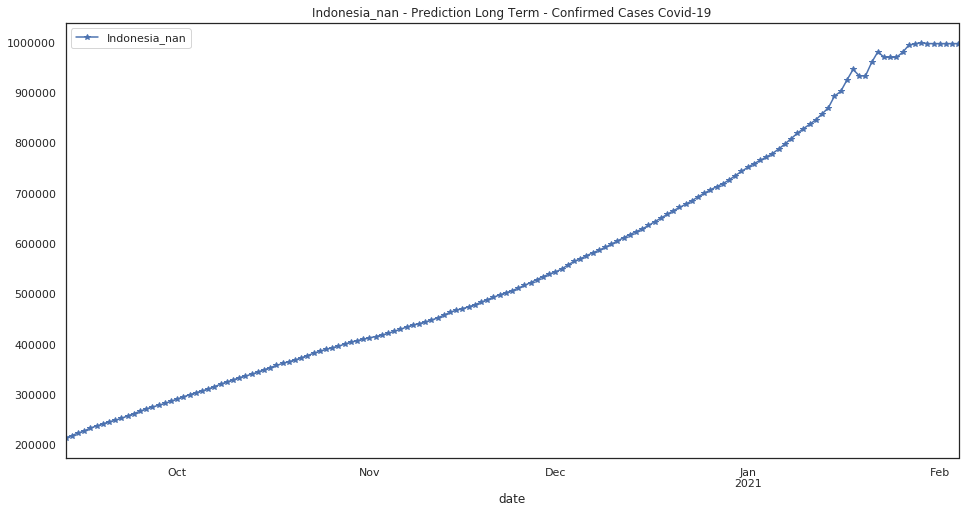

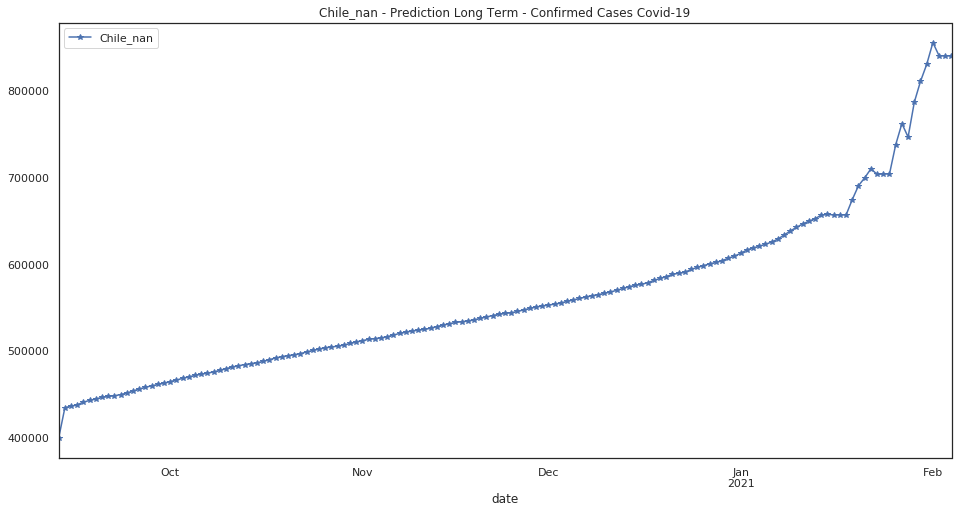

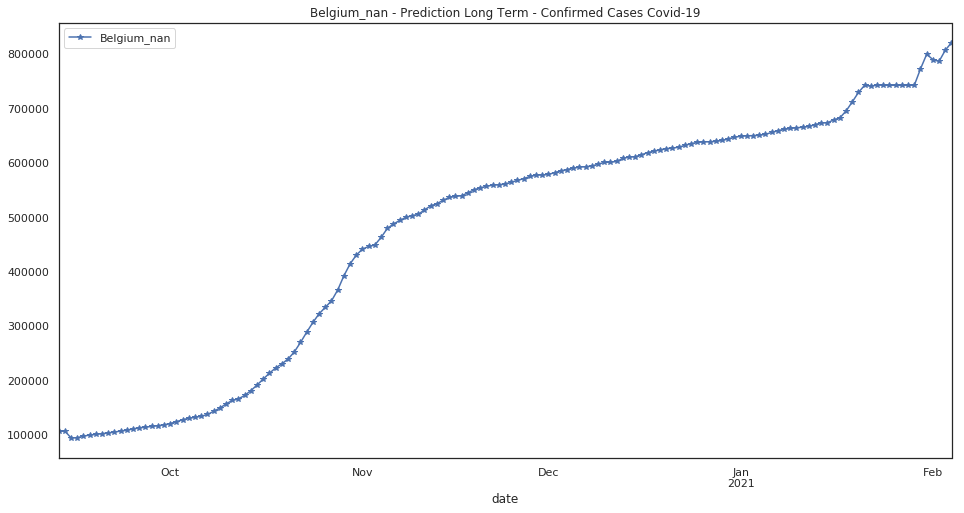

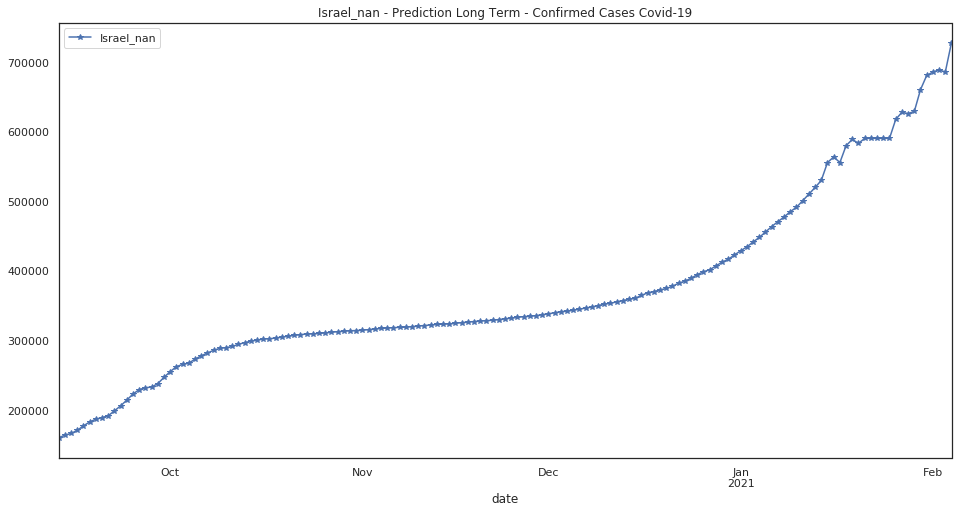

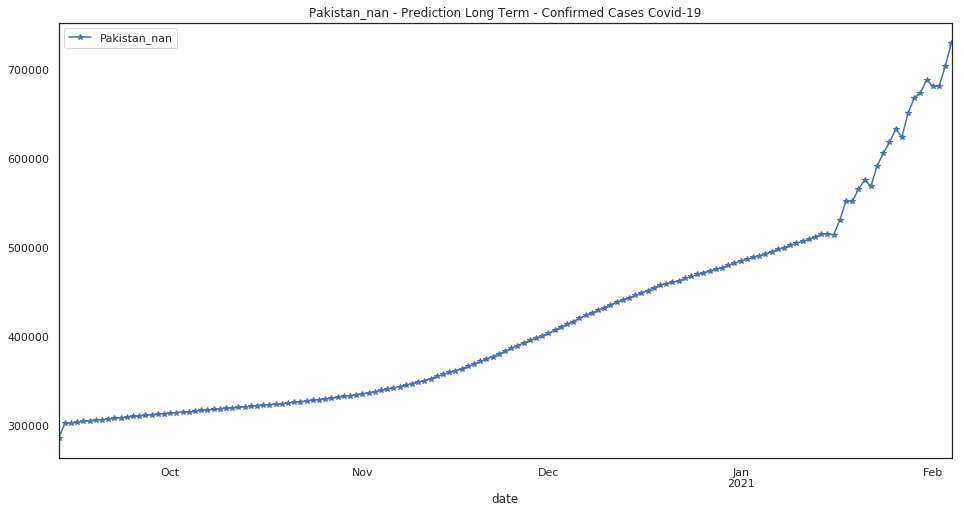

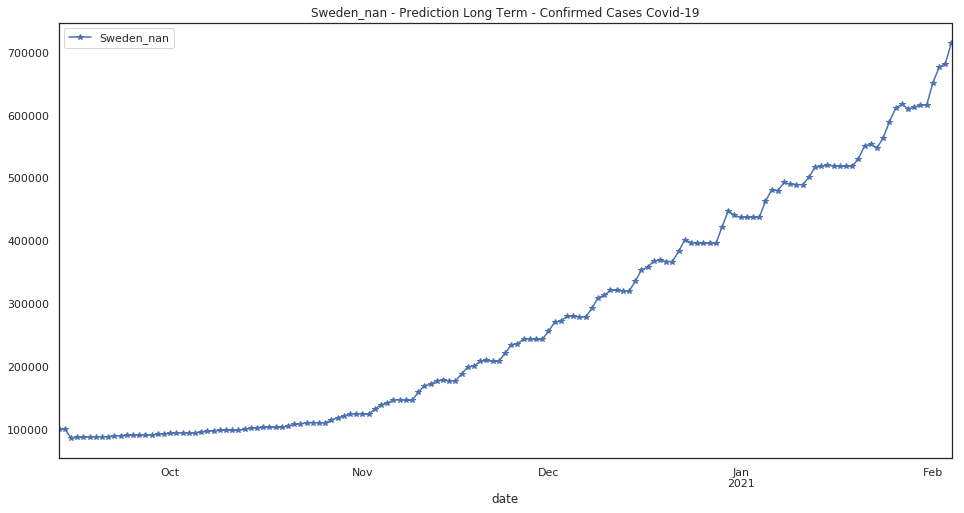

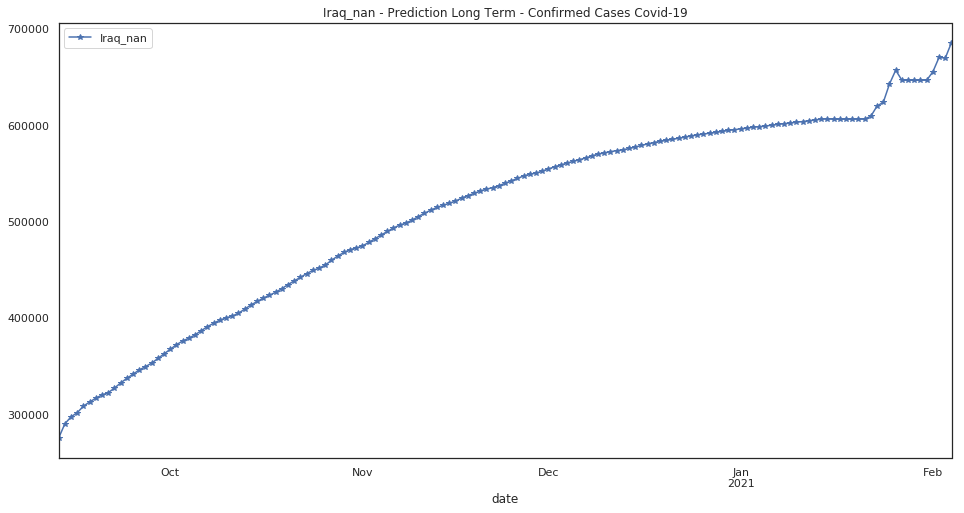

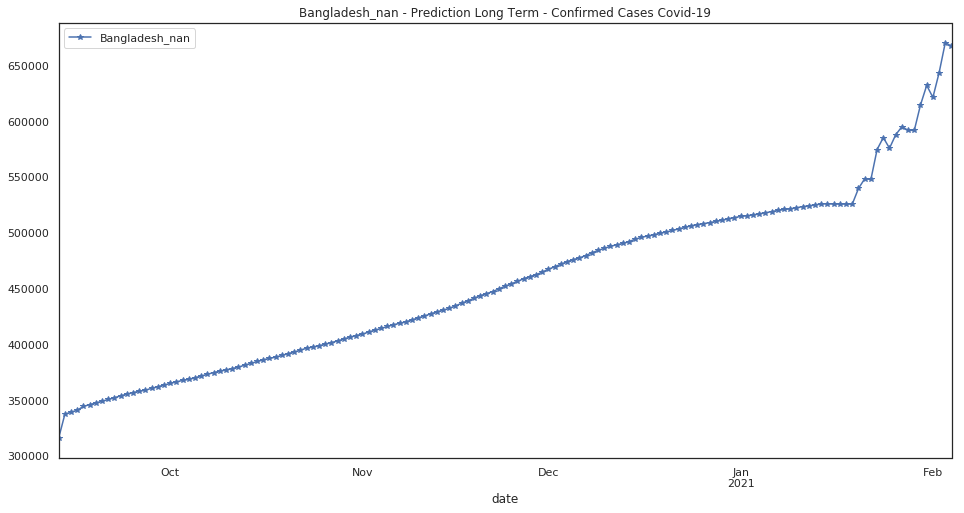

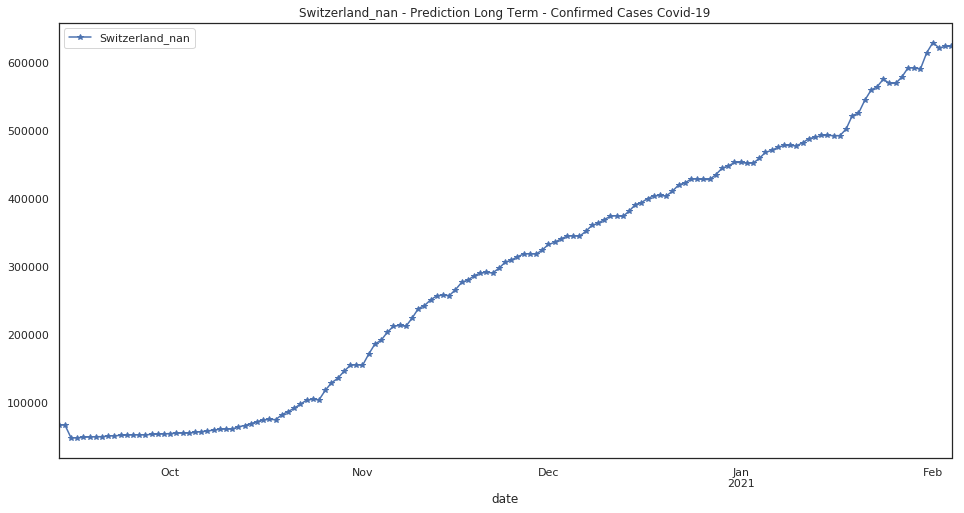

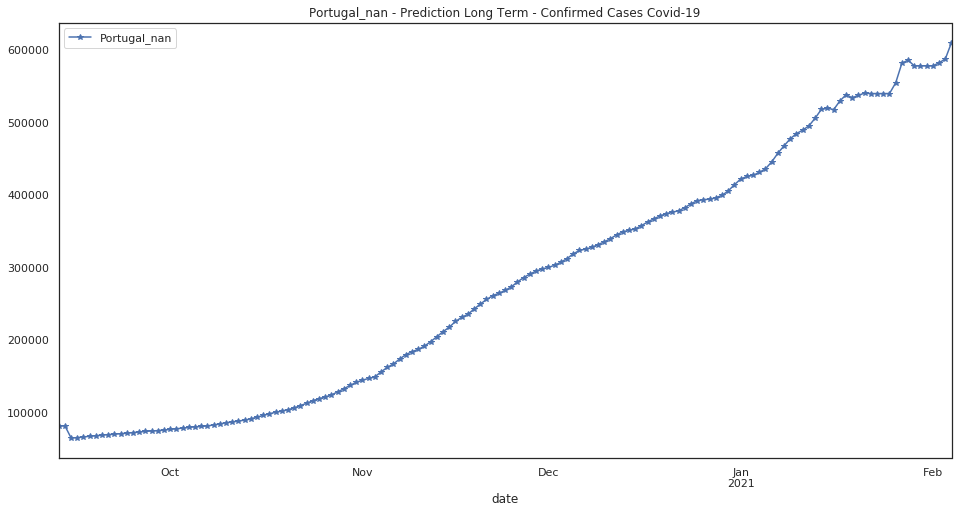

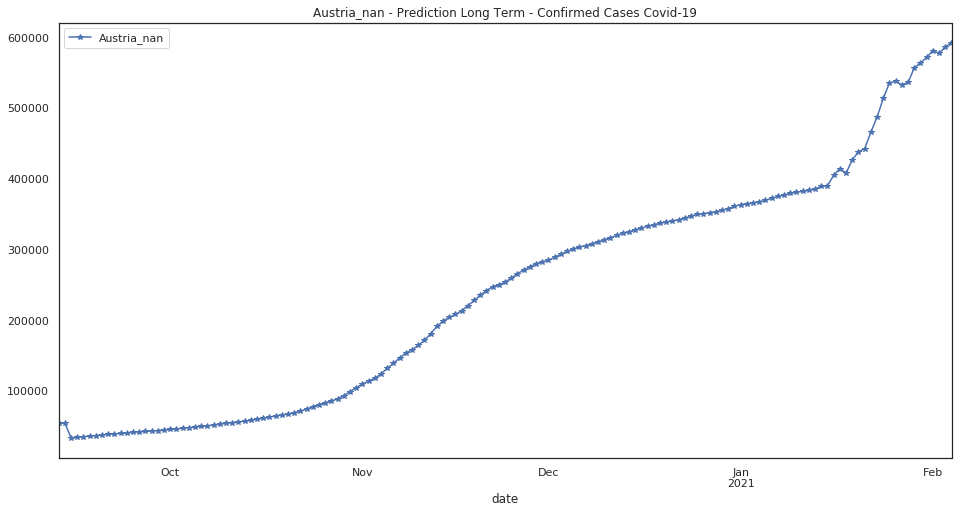

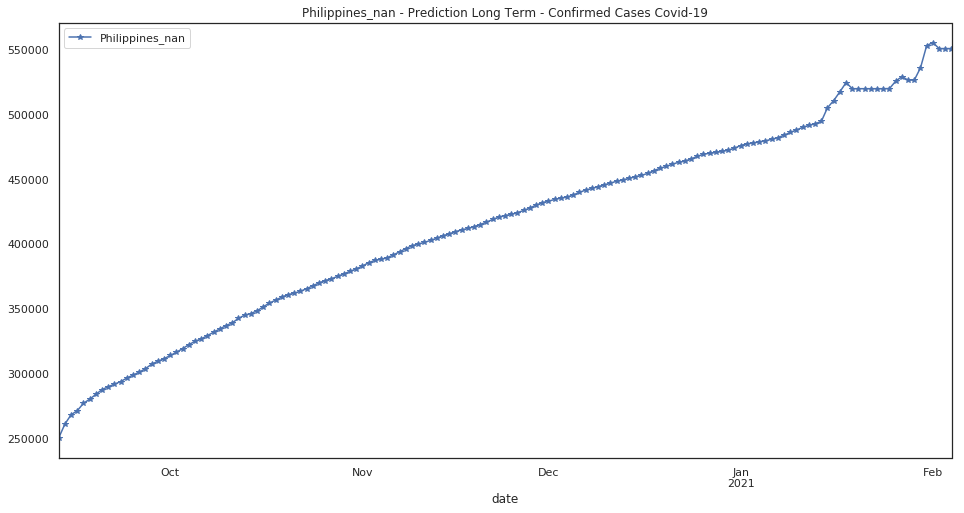

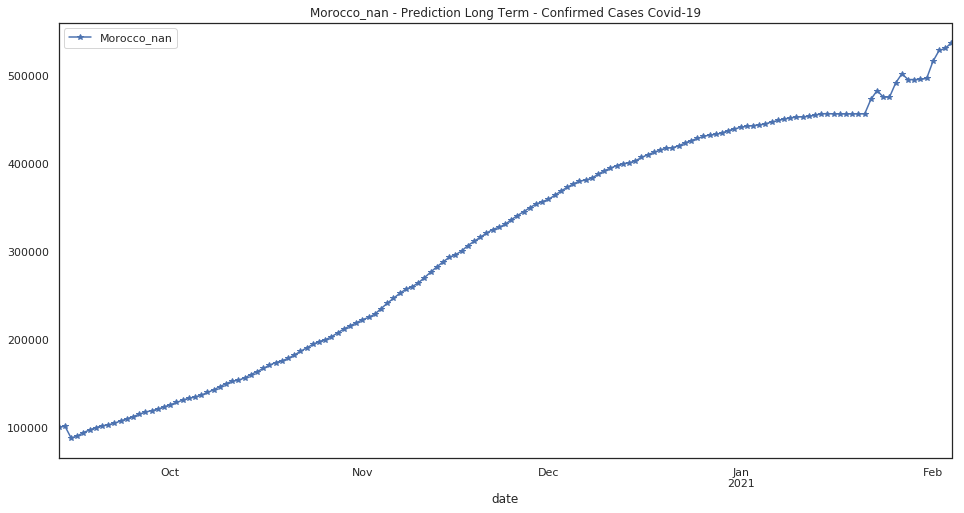

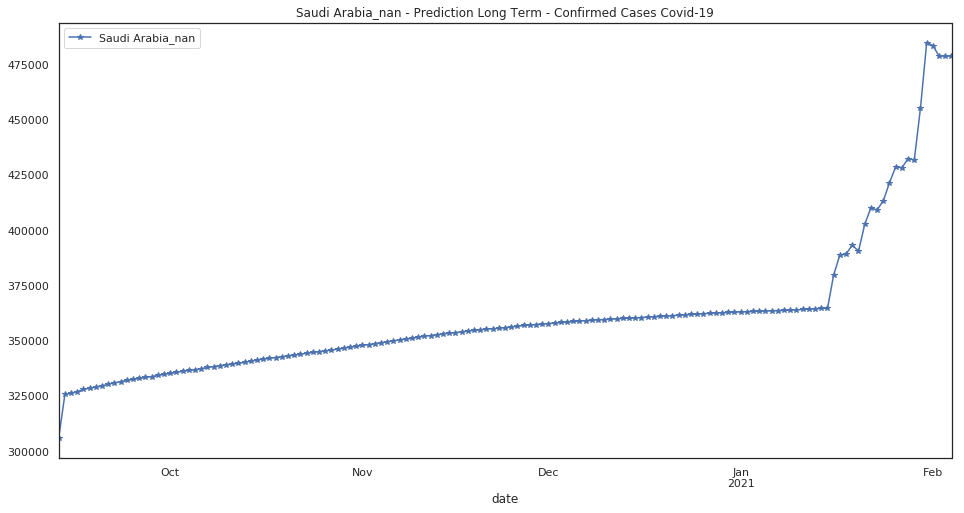

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

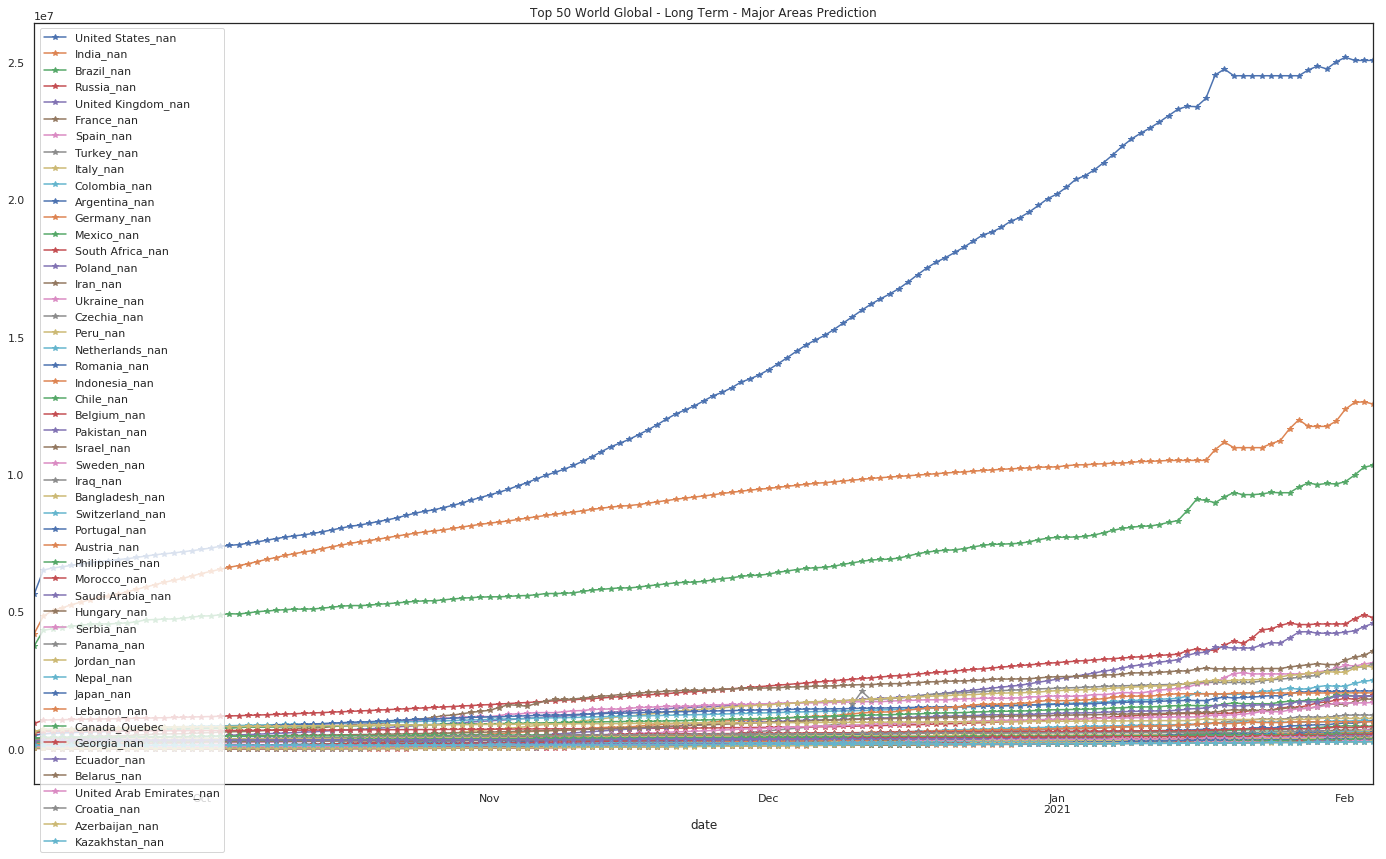

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

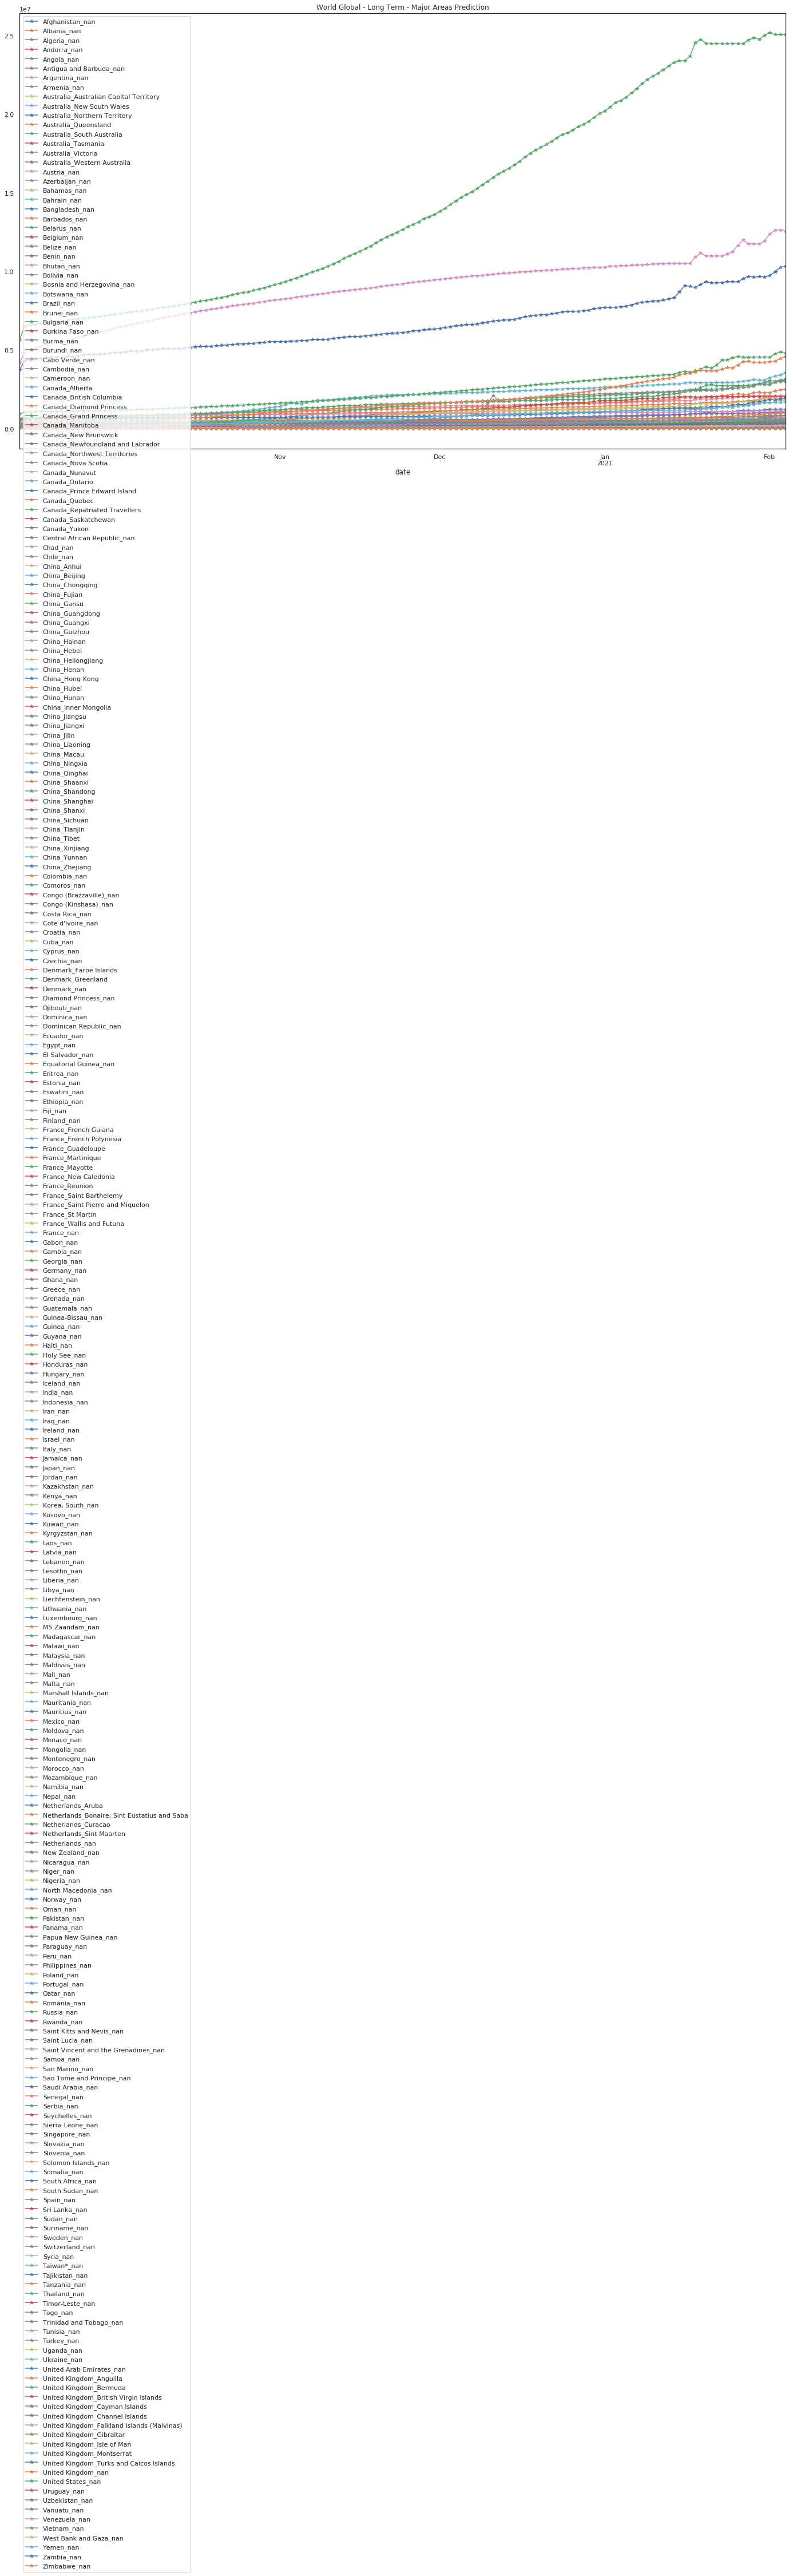

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41338.0      20017.0      57170.0       4447.0   
2020-10-29          41461.0      20276.0      57478.0       4517.0   
2020-10-30          41534.0      20625.0      57797.0       4739.0   
2020-10-31          41632.0      20844.0      58092.0       4665.0   
2020-11-01          41702.0      21226.0      58413.0       4756.0   
2020-11-02          41825.0      21480.0      58717.0       4874.0   
2020-11-03          41917.0      21861.0      59106.0       4896.0   
2020-11-04          42013.0      22224.0      59635.0       5199.0   
2020-11-05          42133.0      22641.0      60267.0       5045.0   
2020-11-06          42177.0      23115.0      60907.0       5135.0   
2020-11-07          42245.0      23571.0      61498.0       5598.0   
2020-11-08          42357.0      24080.0      62145.0       5319.0   
2020-11-09          42478.0      24609.0      62776.0       5435.0   
2020-11-10          42646.0      25156.0      63498.0       5546.0   
2020-11-11          42795.0      25655.0      64299.0       5641.0   
2020-11-12          42978.0      26121.0      65144.0       5567.0   
2020-11-13          43147.0      26653.0      66017.0       5757.0   
2020-11-14          43225.0      27125.0      66863.0       5725.0   
2020-11-15          43424.0      27696.0      67711.0       6105.0   
2020-11-16          43621.0      28284.0      68608.0       5872.0   
2020-11-17          43832.0      28981.0      69591.0       6029.0   
2020-11-18          44084.0      29662.0      70630.0       6126.0   
2020-11-19          44329.0      30445.0      71661.0       6020.0   
2020-11-20          44522.0      31254.0      72754.0       6175.0   
2020-11-21          44678.0      31996.0      73788.0       6142.0   
2020-11-22          44868.0      32635.0      74853.0       6239.0   
2020-11-23          45124.0      33455.0      75871.0       6348.0   
2020-11-24          45316.0      34107.0      76970.0       6391.0   
2020-11-25          45544.0      34793.0      78025.0       6462.0   
2020-11-26          45758.0      35501.0      79091.0       6456.0   
...                     ...          ...          ...          ...   
2021-01-06          53366.0      61045.0     101286.0       8356.0   
2021-01-07          53463.0      61761.0     101554.0       8420.0   
2021-01-08          53471.0      62472.0     101833.0       8641.0   
2021-01-09          53541.0      63097.0     102098.0       8489.0   
2021-01-10          53633.0      63669.0     102330.0       8586.0   
2021-01-11          53680.0      64055.0     102550.0       8790.0   
2021-01-12          53799.0      64637.0     102812.0       8836.0   
2021-01-13          53806.0      65344.0     103046.0       8698.0   
2021-01-14          53966.0      66025.0     103297.0       8818.0   
2021-01-15          53988.0      66140.0     107650.0       9007.0   
2021-01-16          54002.0      67678.0     110685.0       8946.0   
2021-01-17          54006.0      68507.0     111286.0       9117.0   
2021-01-18          55767.0      68610.0     111343.0       9085.0   
2021-01-19          55986.0      68620.0     110921.0       9091.0   
2021-01-20          56107.0      68521.0     113805.0       9376.0   
2021-01-21          58698.0      68520.0     117904.0       9283.0   
2021-01-22          60658.0      68550.0     118381.0       9465.0   
2021-01-23          61075.0      68550.0     119651.0       9522.0   
2021-01-24          61211.0      68651.0     124642.0       9444.0   
2021-01-25          61000.0      68682.0     125933.0       9438.0   
2021-01-26          61977.0      70787.0     130965.0       9438.0   
2021-01-27          62175.0      71447.0     133576.0       9438.0   
2021-01-28          62981.0      71358.0     132551.0       9437.0   
2021-01-29          63303.0      71345.0     133085.0       9437.0   
2021-01-30

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                               Afghanistan_nan  33.939110   67.709953   
1                                   Albania_nan  41.153300   20.168300   
2                                   Algeria_nan  28.033900    1.659600   
3                                   Andorra_nan  42.506300    1.521800   
4                                    Angola_nan -11.202700   17.873900   
5                       Antigua and Barbuda_nan  17.060800  -61.796400   
6                                 Argentina_nan -38.416100  -63.616700   
7                                   Armenia_nan  40.069100   45.038200   
8        Australia_Australian Capital Territory -35.473500  149.012400   
9                     Australia_New South Wales -33.868800  151.209300   
10                 Australia_Northern Territory -12.463400  130.845600   
11                         Australia_Queensland -27.469800  153.025100   
12                    Australia_South Australia -34.928500  138.600700   
13                           Australia_Tasmania -42.882100  147.327200   
14                           Australia_Victoria -37.813600  144.963100   
15                  Australia_Western Australia -31.950500  115.860500   
16                                  Austria_nan  47.516200   14.550100   
17                               Azerbaijan_nan  40.143100   47.576900   
18                                  Bahamas_nan  25.025885  -78.035889   
19                                  Bahrain_nan  26.027500   50.550000   
20                               Bangladesh_nan  23.685000   90.356300   
21                                 Barbados_nan  13.193900  -59.543200   
22                                  Belarus_nan  53.709800   27.953400   
23                                  Belgium_nan  50.833300    4.469936   
24                                   Belize_nan  17.189900  -88.497600   
25                                    Benin_nan   9.307700    2.315800   
26                                   Bhutan_nan  27.514200   90.433600   
27                                  Bolivia_nan -16.290200  -63.588700   
28                   Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                 Botswana_nan -22.328500   24.684900   
..                                          ...        ...         ...   
248                                Thailand_nan  15.870032  100.992541   
249                             Timor-Leste_nan  -8.874217  125.727539   
250                                    Togo_nan   8.619500    0.824800   
251                     Trinidad and Tobago_nan  10.691800  -61.222500   
252                                 Tunisia_nan  33.886917    9.537499   
253                                  Turkey_nan  38.963700   35.243300   
254                           United States_nan  40.000000 -100.000000   
255                                  Uganda_nan   1.373333   32.290275   
256                                 Ukraine_nan  48.379400   31.165600   
257                    United Arab Emirates_nan  23.424076   53.847818   
258                     United Kingdom_Anguilla  18.220600  -63.068600   
259                      United Kingdom_Bermuda  32.307800  -64.750500   
260       United Kingdom_British Virgin Islands  18.420700  -64.640000   
261               United Kingdom_Cayman Islands  19.313300  -81.254600   
262              United Kingdom_Channel Islands  49.372300   -2.364400   
263  United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
264                    United Kingdom_Gibraltar  36.140800   -5.353600   
265                  United Kingdom_Isle of Man  54.236100   -4.548100   
266                   United Kingdom_Montserrat  16.742498  -62.187366   
267     United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
268                          United Kingdom_nan  55.378100   -3.436000   
269                                 Uruguay_nan -32.522800  -55.765800   
270                              Uzbekistan_n

In [87]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat,lng,num,totpred,ldaygrowth in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]],  (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg ):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred))+' Roling7DayAVG='+str(round(ldaygrowth))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

ValueError: Location values cannot contain NaNs.

In [88]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      17            Azerbaijan_nan  40.143100   47.576900   
3      20            Bangladesh_nan  23.685000   90.356300   
4      22               Belarus_nan  53.709800   27.953400   
5      23               Belgium_nan  50.833300    4.469936   
6      30                Brazil_nan -14.235000  -51.925300   
7      53             Canada_Quebec  52.939900  -73.549100   
8      59                 Chile_nan -35.675100  -71.543000   
9      93              Colombia_nan   4.570900  -74.297300   
10     99               Croatia_nan  45.100000   15.200000   
11    102               Czechia_nan  49.817500   15.473000   
12    110               Ecuador_nan  -1.831200  -78.183400   
13    131                France_nan  46.227600    2.213700   
14    134               Georgia_nan  42.315400   43.356900   
15    135               Georgia_nan  42.315400   43.356900   
16    136               Germany_nan  51.165691   10.451526   
17    148               Hungary_nan  47.162500   19.503300   
18    150                 India_nan  20.593684   78.962880   
19    151             Indonesia_nan  -0.789300  113.921300   
20    152                  Iran_nan  32.427908   53.688046   
21    153                  Iraq_nan  33.223191   43.679291   
22    155                Israel_nan  31.046051   34.851612   
23    156                Israel_nan  31.046051   34.851612   
24    157                 Italy_nan  41.871940   12.567380   
25    159                 Japan_nan  36.204824  138.252924   
26    160                Jordan_nan  31.240000   36.510000   
27    161            Kazakhstan_nan  48.019600   66.923700   
28    169               Lebanon_nan  33.854700   35.862300   
29    170               Lebanon_nan  33.854700   35.862300   
30    187                Mexico_nan  23.634500 -102.552800   
31    192               Morocco_nan  31.791700   -7.092600   
32    195                 Nepal_nan  28.166700   84.250000   
33    200           Netherlands_nan  52.132600    5.291300   
34    208              Pakistan_nan  30.375300   69.345100   
35    209                Panama_nan   8.538000  -80.782100   
36    212                  Peru_nan  -9.190000  -75.015200   
37    213           Philippines_nan  12.879721  121.774017   
38    214                Poland_nan  51.919400   19.145100   
39    215              Portugal_nan  39.399900   -8.224500   
40    217               Romania_nan  45.943200   24.966800   
41    218                Russia_nan  61.524010  105.318756   
42    226          Saudi Arabia_nan  23.885942   45.079162   
43    228                Serbia_nan  44.016500   21.005900   
44    236          South Africa_nan -30.559500   22.937500   
45    238                 Spain_nan  40.463667   -3.749220   
46    242                Sweden_nan  60.128161   18.643501   
47    243           Switzerland_nan  46.818200    8.227500   
48    253                Turkey_nan  38.963700   35.243300   
49    254         United States_nan  40.000000 -100.000000   
50    256               Ukraine_nan  48.379400   31.165600   
51    257  United Arab Emirates_nan  23.424076   53.847818   
52    268        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              503811.0             555537.0             577501.0   
1               54248.0              54577.0              33541.0   
2               58696.0              58761.0              38403.0   
3              316184.0             337520.0             339332.0   
4               89545.0              89706.0              74360.0   
5              106139.0             106872.0              94306.0   
6             3752536.0            4330455.0            4380895.0   
7               81639.0              81876.0              65262.0   
8              399859.0           

In [89]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction

for lat2,lng2,num2,totpred2,ldaygrowth2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg ):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' ConfirmedPred='+str(round(totpred2))+' Roling7DayAVG='+str(round(ldaygrowth2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [90]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [91]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [92]:
exit()